In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load data about clubs and their country of belonging
country_clubs_df = pd.read_json("../parsing/parsedData/sorted_teams.json")
country_clubs_df.head()

,TeamID,Team_name,Country_Name,Link_to_team,Page
0,418,Реал Мадрид,Испания,/real-madrid/startseite/verein/418,1
1,281,Манчестер Сити,Англия,/manchester-city/startseite/verein/281,1
2,27,Бавария,Германия,/fc-bayern-munchen/startseite/verein/27,1
3,31,Ливерпуль,Англия,/fc-liverpool/startseite/verein/31,1
4,583,ПСЖ,Франция,/fc-paris-saint-germain/startseite/verein/583,1


In [3]:
# Check shape
country_clubs_df.shape

(536, 5)

In [4]:
# Check data types
country_clubs_df.dtypes

TeamID           int64
Team_name       object
Country_Name    object
Link_to_team    object
Page             int64
dtype: object

In [5]:
# Check axes
country_clubs_df.axes

[RangeIndex(start=0, stop=536, step=1),
 Index(['TeamID', 'Team_name', 'Country_Name', 'Link_to_team', 'Page'], dtype='object')]

In [6]:
# Drop "Link_to_team" and "Page" column, we will not need them
country_clubs_df.drop(["Link_to_team", "Page"], axis=1, inplace=True)
country_clubs_df.head()

,TeamID,Team_name,Country_Name
0,418,Реал Мадрид,Испания
1,281,Манчестер Сити,Англия
2,27,Бавария,Германия
3,31,Ливерпуль,Англия
4,583,ПСЖ,Франция


**Hypothesis: is Germany the most "football" country because of the highest match attendance in at least Europe? Let us investigate that via number of indexed football clubs**

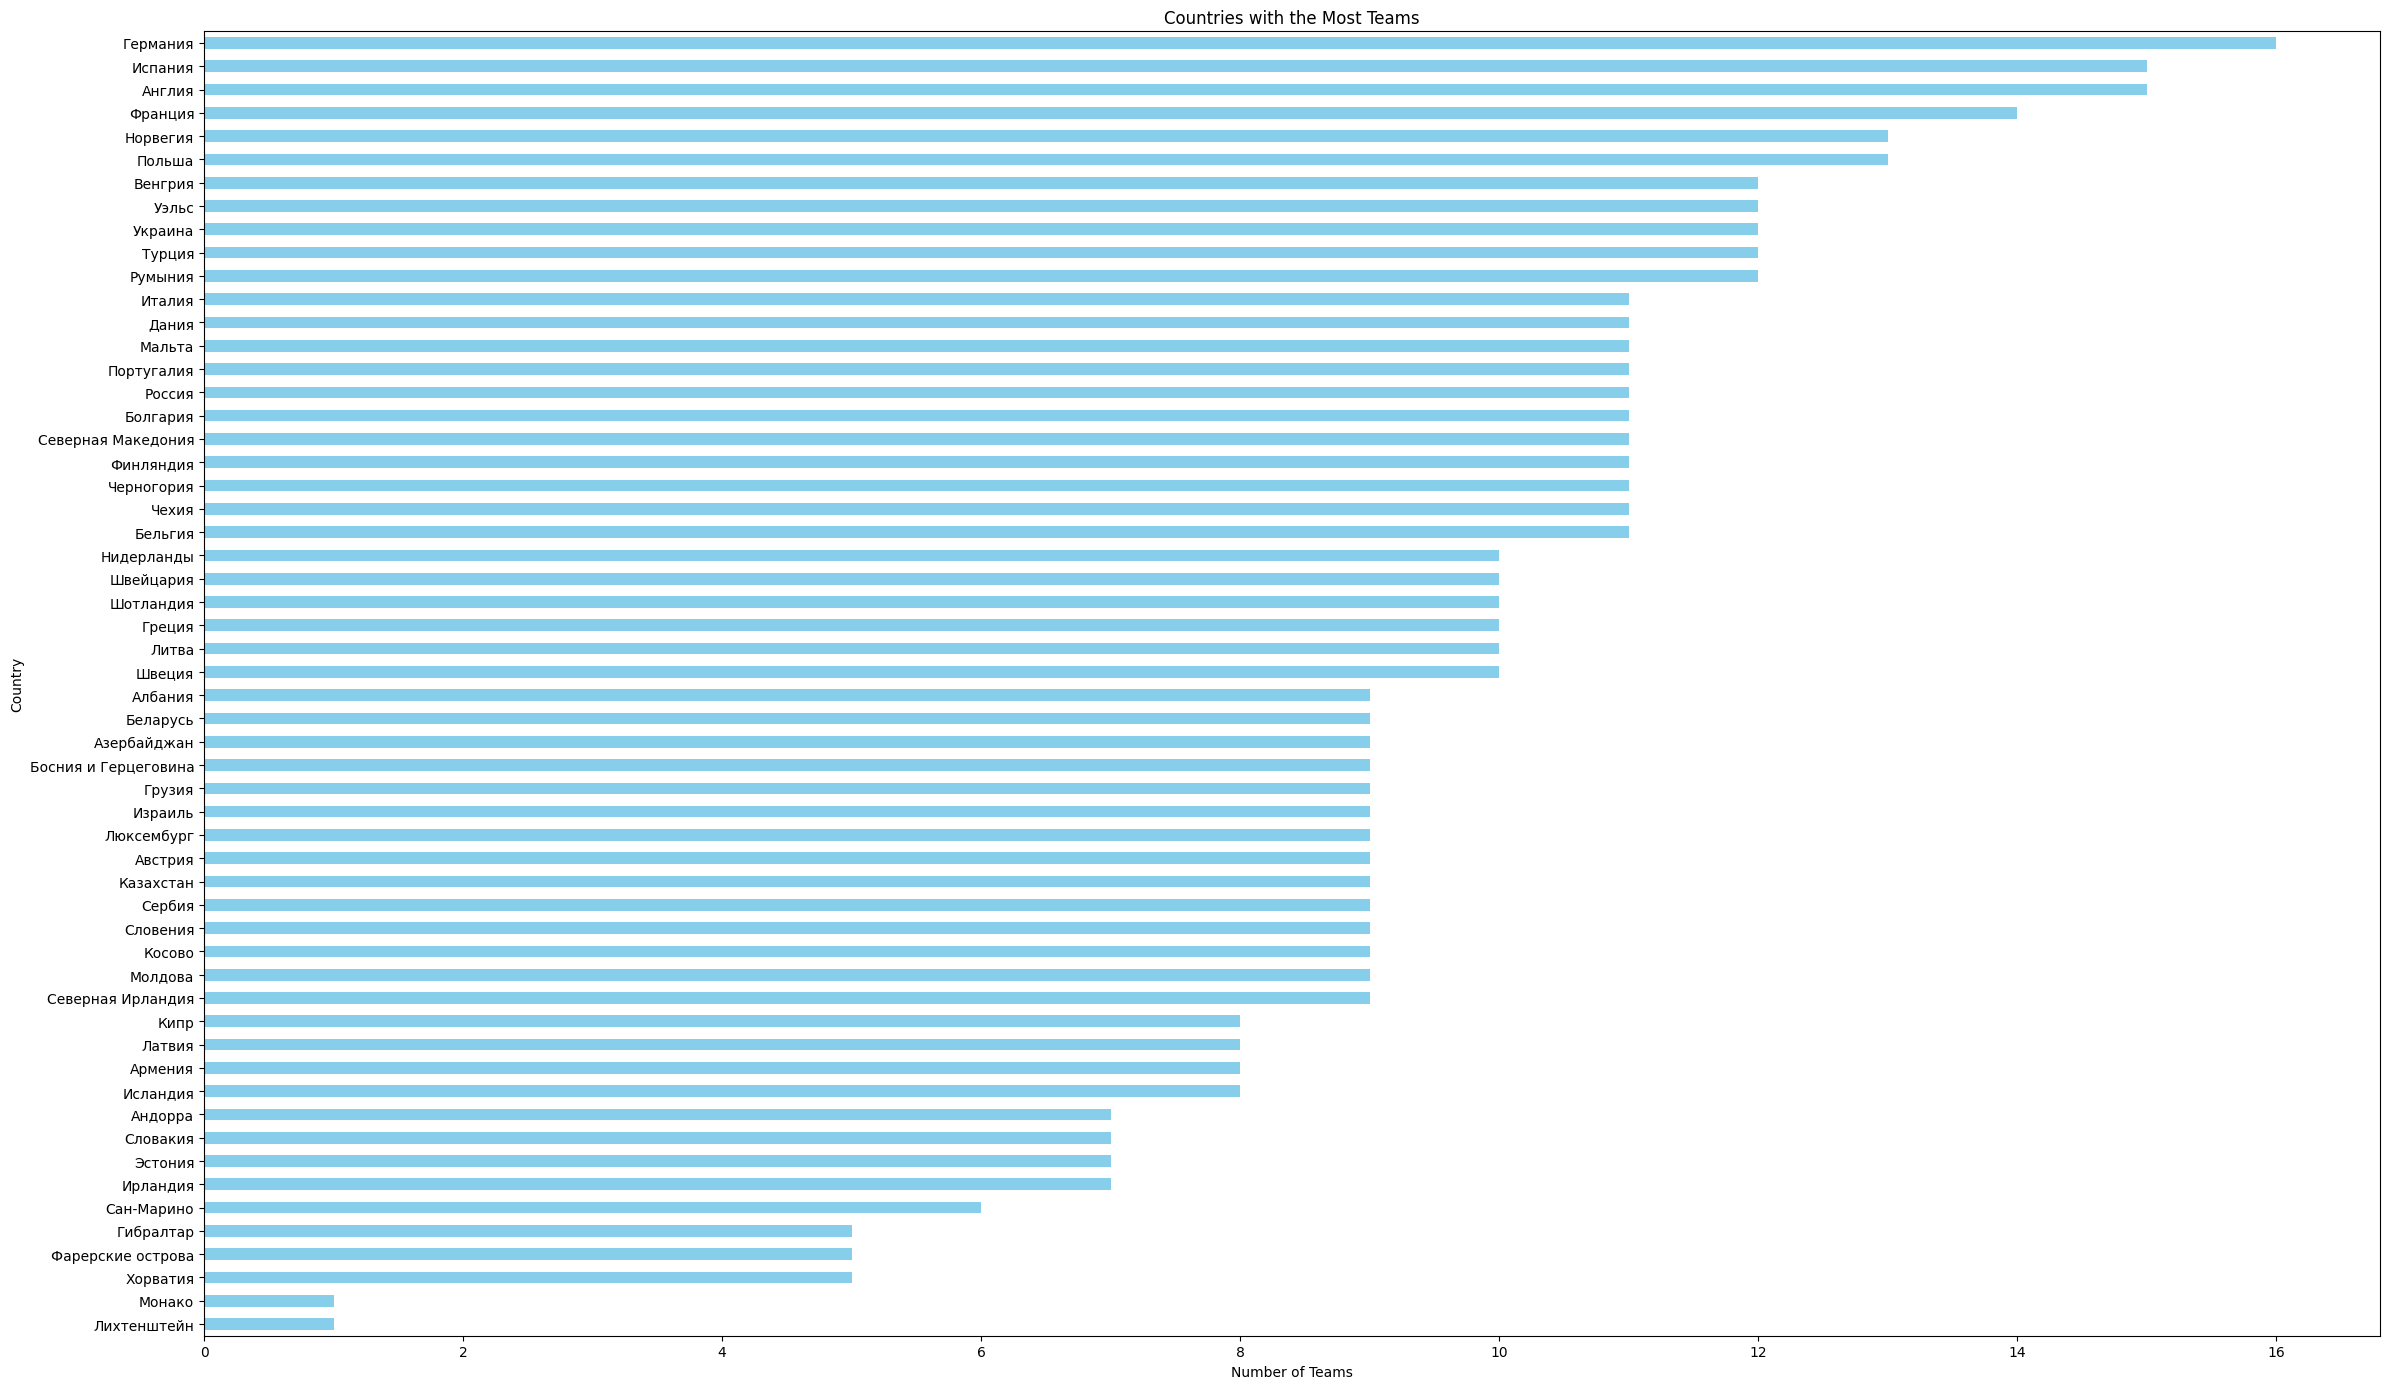

In [7]:
# Find countries with the most teams
plt.figure(figsize=(24, 14))
country_clubs_df.groupby("Country_Name") \
                .agg({"TeamID": "count"}) \
                .sort_values("TeamID", ascending=True) \
                .plot(kind="barh", color="skyblue", legend=False, ax=plt.gca())
plt.title("Countries with the Most Teams")
plt.xlabel("Number of Teams")
plt.ylabel("Country")
plt.tight_layout()
None

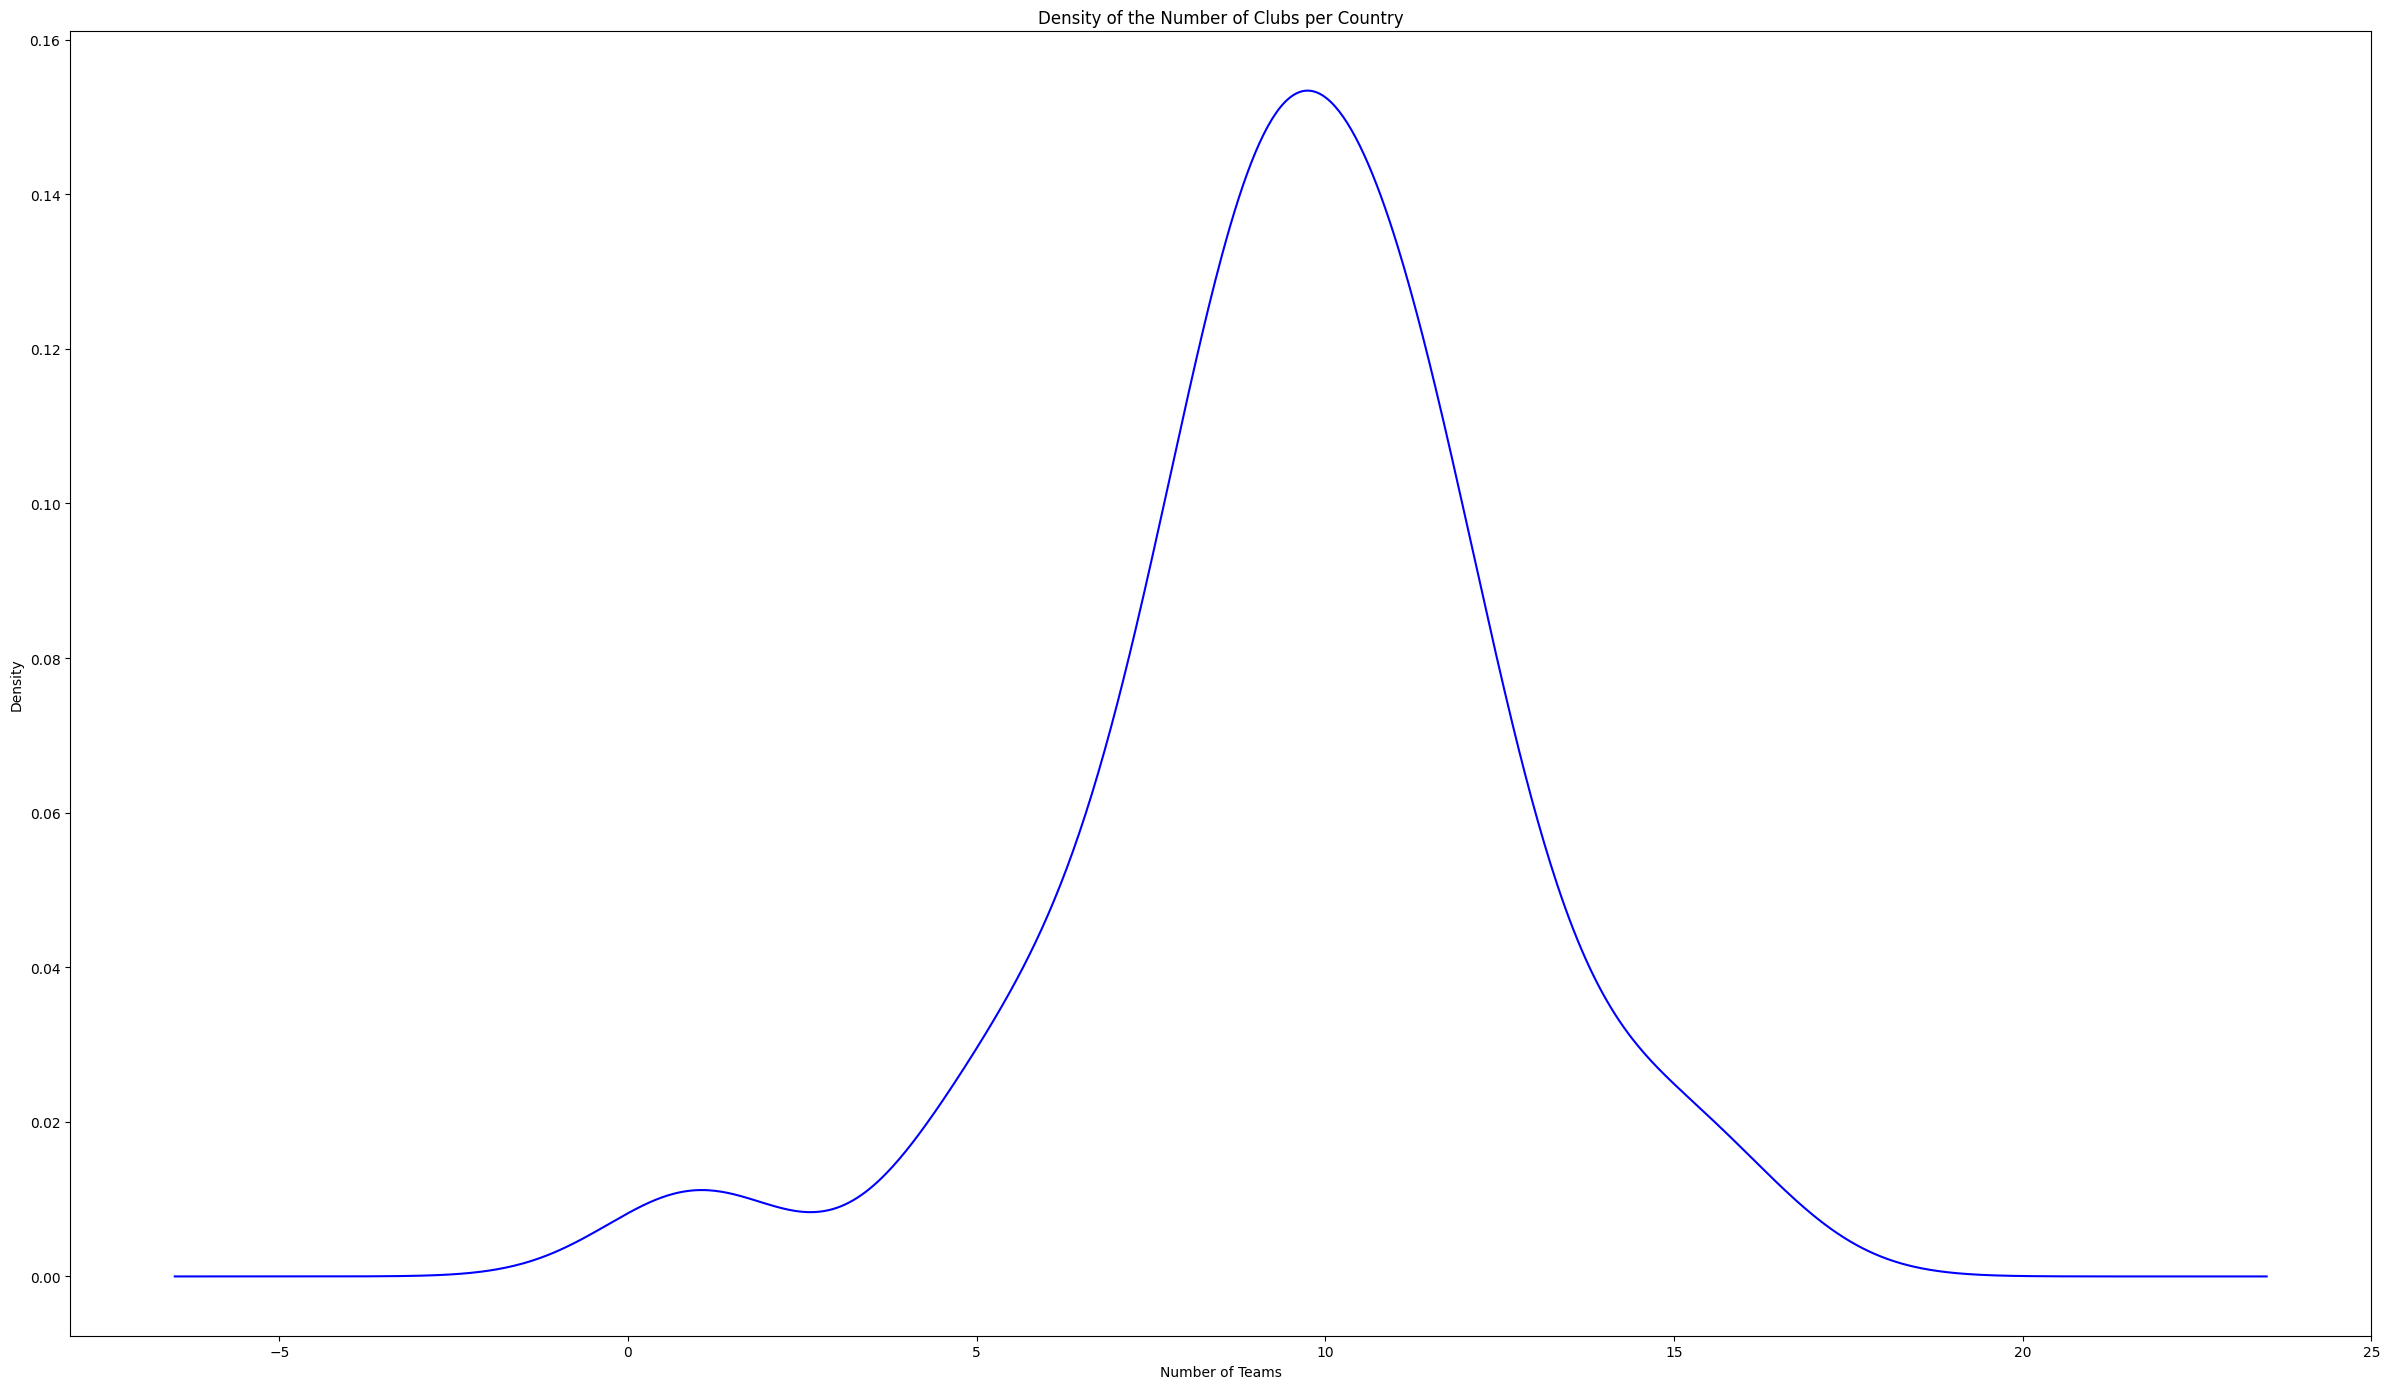

In [8]:
# Find the most popular number of clubs
plt.figure(figsize=(24, 14))
country_clubs_df.groupby("Country_Name") \
                .agg({"TeamID": "count"}) \
                .sort_values("TeamID", ascending=True) \
                .plot(kind="density", color='blue', legend=False, ax=plt.gca())
plt.title("Density of the Number of Clubs per Country")
plt.xlabel("Number of Teams")
plt.ylabel("Density")
plt.tight_layout()
None

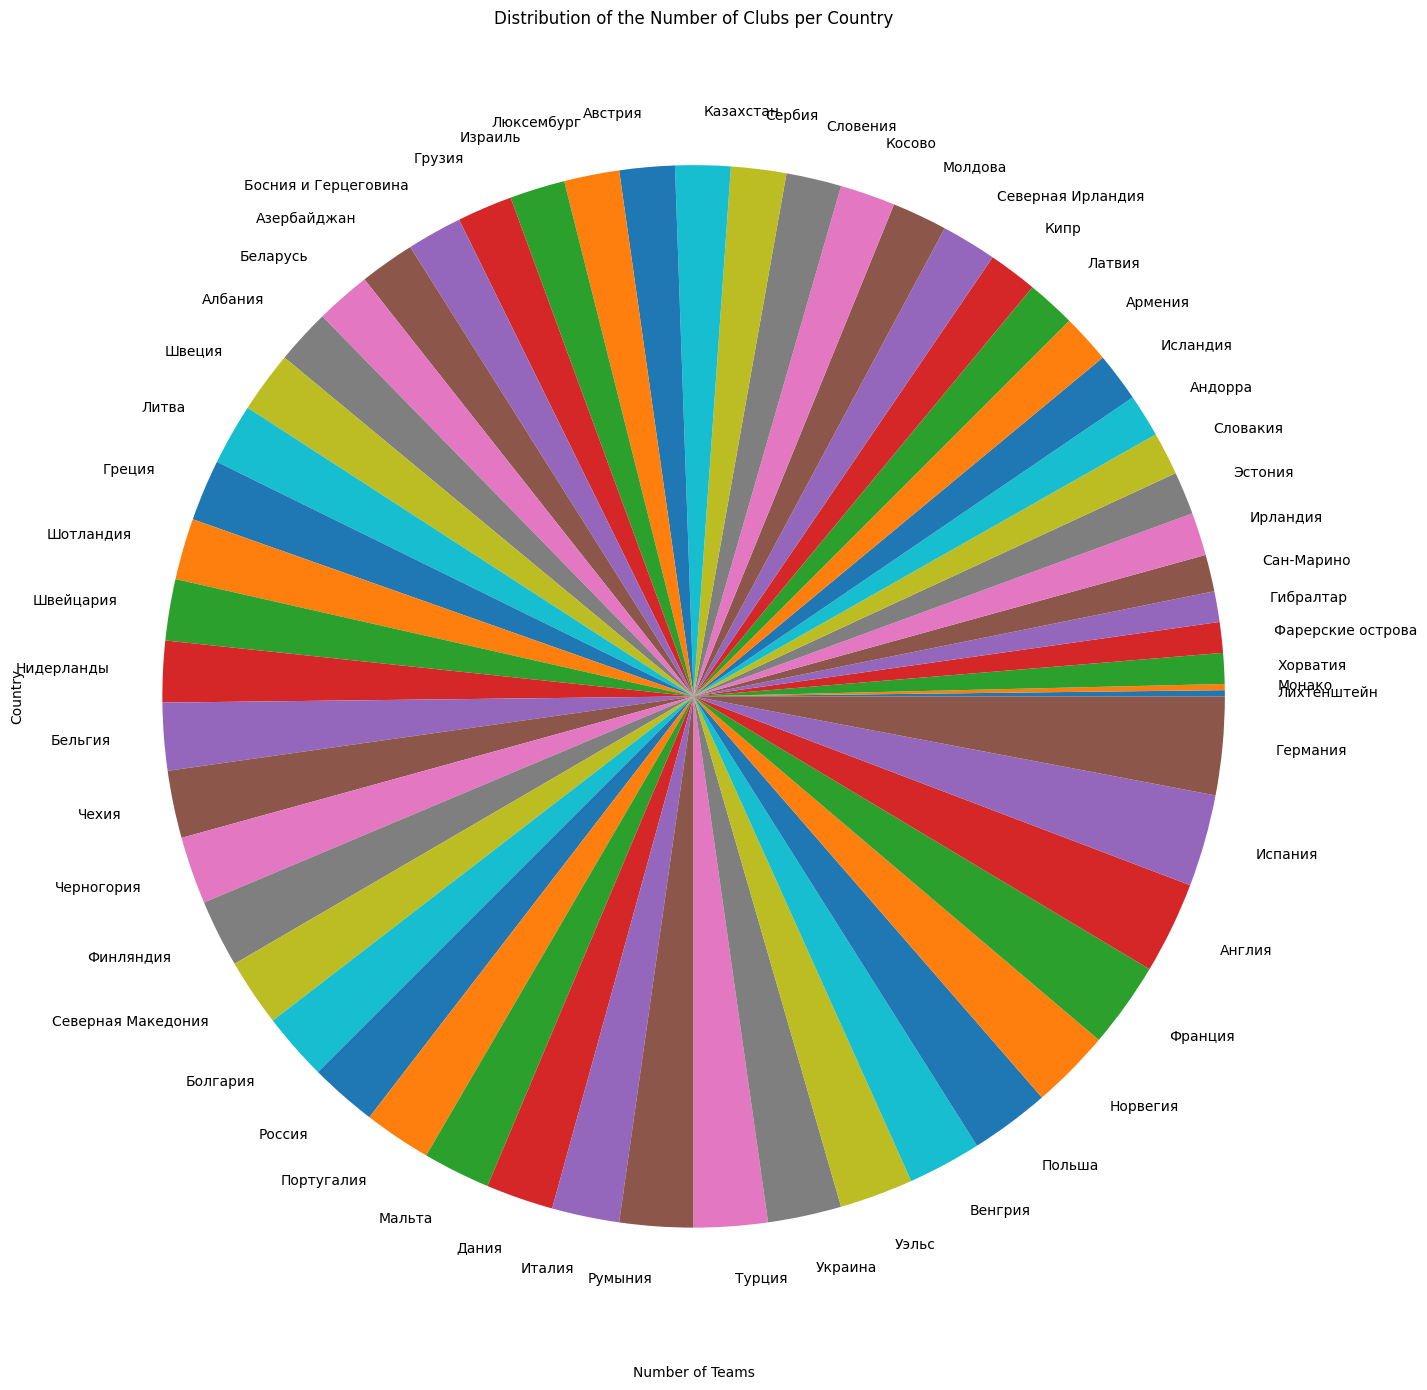

In [9]:
# Find distributions of the number of clubs per country
plt.figure(figsize=(24, 14))
country_clubs_df.groupby("Country_Name") \
                .agg({"TeamID": "count"}) \
                .sort_values("TeamID", ascending=True) \
                .plot(kind="pie", y="TeamID", color='blue', legend=False, ax=plt.gca())
plt.title("Distribution of the Number of Clubs per Country")
plt.xlabel("Number of Teams")
plt.ylabel("Country")
plt.tight_layout()
None

**Notably, Germany is the most footbal country in a sense of number of teams indexed by Transfermarkt.com website: https://www.transfermarkt.com/ \
Additionally (not inferenced from these data frames), average attendance among European countries is the highest in Germany, which is another argument for Germany. \
However, provided website is German, which makes obtained findings a bit biased**

In [10]:
# Load data about clubs and their average points by years
average_points_clubs_df = pd.read_json("../parsing/parsedData/average_points.json")
average_points_clubs_df.head()

,TeamID,Year,AveragePoints
0,418,2016,"2,38"
1,418,2019,"2,16"
2,418,2020,"2,02"
3,418,2017,"2,11"
4,418,2022,"2,15"


In [11]:
# Check shape
average_points_clubs_df.shape

(5563, 3)

In [12]:
# Check data types
average_points_clubs_df.dtypes

TeamID            int64
Year              int64
AveragePoints    object
dtype: object

In [13]:
# Check axes
average_points_clubs_df.axes

[RangeIndex(start=0, stop=5563, step=1),
 Index(['TeamID', 'Year', 'AveragePoints'], dtype='object')]

In [14]:
# Replace comma with dot in "AveragePoints" column, and convert it to float
average_points_clubs_df["AveragePoints"] = average_points_clubs_df["AveragePoints"].str.replace(",", ".").astype(float)
average_points_clubs_df.head()

,TeamID,Year,AveragePoints
0,418,2016,2.38
1,418,2019,2.16
2,418,2020,2.02
3,418,2017,2.11
4,418,2022,2.15


In [15]:
# Show new data types
average_points_clubs_df.dtypes

TeamID             int64
Year               int64
AveragePoints    float64
dtype: object

In [16]:
# Obtain considered years
sorted(average_points_clubs_df["Year"].unique())

[np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024)]

In [17]:
# Merge "country_clubs_df" and "average_points_clubs_df" Data Frames to obtain club names
average_points_clubs_df = average_points_clubs_df.merge(country_clubs_df, on="TeamID")
average_points_clubs_df.head()

,TeamID,Year,AveragePoints,Team_name,Country_Name
0,418,2016,2.38,Реал Мадрид,Испания
1,418,2019,2.16,Реал Мадрид,Испания
2,418,2020,2.02,Реал Мадрид,Испания
3,418,2017,2.11,Реал Мадрид,Испания
4,418,2022,2.15,Реал Мадрид,Испания


**Hypothesis: are there really football grand clubs characterized with their stable and high results, such as average points obtained by them during the considered decade?**

<Figure size 2400x1400 with 0 Axes>

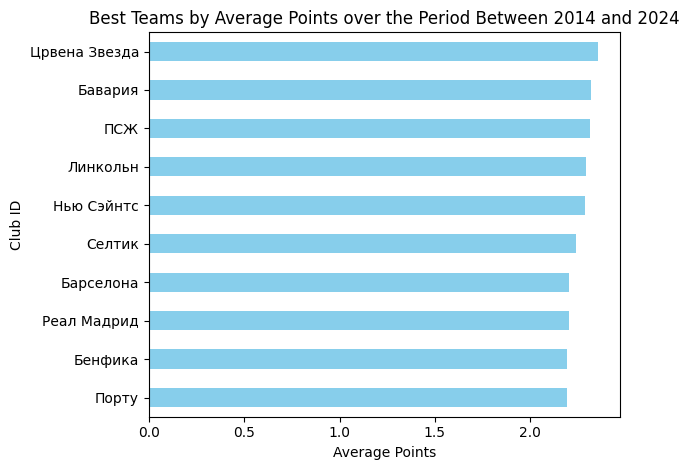

In [18]:
# Visualize best teams over the period between 2014 and 2024
plt.figure(figsize=(24, 14))
average_points_clubs_df.groupby("Team_name") \
                .agg({"AveragePoints": "mean"}) \
                .sort_values("AveragePoints", ascending=True) \
                .tail(10) \
                .plot(kind="barh", color="skyblue", legend=False)
plt.title("Best Teams by Average Points over the Period Between 2014 and 2024")
plt.xlabel("Average Points")
plt.ylabel("Club ID")
plt.tight_layout()
None

**As we can see, we may classify Bayern, PSG, Barcelona, and Real Madrid as grands because they perform stable, has highest numbers of fans, highest team costs, etc.**

In [19]:
# Load almost complete data about clubs
complete_clubs_df = pd.read_json("../parsing/parsedData/complete_clubs.json")
complete_clubs_df.head()

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio
0,1002,2014,"4,25 млн €","21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN
1,1002,2015,"3,60 млн €","21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82
2,1002,2016,"3,48 млн €","21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19
3,1002,2017,"3,55 млн €","21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97
4,1002,2018,"5,80 млн €","22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05


In [20]:
# Check shape
complete_clubs_df.shape

(5896, 9)

In [21]:
# Check data types
complete_clubs_df.dtypes

TeamID                    int64
Year                      int64
TeamCost                 object
AverageAge               object
Legioners                 int64
TeamSize                  int64
PlayerIDS                object
NationalPlayersCount      int64
TeamSizeRatio           float64
dtype: object

In [22]:
# Check axes
complete_clubs_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'TeamCost', 'AverageAge', 'Legioners', 'TeamSize',
        'PlayerIDS', 'NationalPlayersCount', 'TeamSizeRatio'],
       dtype='object')]

In [23]:
# Remove redundant symbols from column names
complete_clubs_df.columns = complete_clubs_df.columns.str.strip()
complete_clubs_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID', 'Year', 'TeamCost', 'AverageAge', 'Legioners', 'TeamSize',
        'PlayerIDS', 'NationalPlayersCount', 'TeamSizeRatio'],
       dtype='object')]

In [24]:
# Remove digits from "TeamCost" column to see which unique values we have
complete_clubs_df["TeamCost"].str.replace(r"[\d]", "", regex=True).unique()

array([', млн €', ' тыс €', '-', ', Млрд. €'], dtype=object)

In [25]:
# Now we need to remove teams with missing values ("-")
teams_to_remove = complete_clubs_df.query("TeamCost == '-'")["TeamID"].unique()

complete_clubs_df.drop(complete_clubs_df[complete_clubs_df["TeamID"].isin(teams_to_remove)].index, inplace=True)

# Verify the reslt
complete_clubs_df.query("TeamCost == '-'")

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio


In [26]:
# Remove commas from string in "TeamCost" column, remove "тыс" (thousand), replace "млн" (million) with one zero because numbers that represent millions have exactly 2 float digits, and replace "Млрд." (billion) with 0 zeros, so that every number will represent amount of thousands in cost
complete_clubs_df.TeamCost = complete_clubs_df.TeamCost. \
    str.replace(",", "") \
    .str.replace("тыс", "") \
    .str.replace("млн", "0") \
    .str.replace("Млрд.", "0000") \
    .str.replace("€", "") \
    .str.replace(" ", "")
    
# Convert "TeamCost" column to float
complete_clubs_df["TeamCost"] = complete_clubs_df["TeamCost"].astype(int)
complete_clubs_df.head()

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio
0,1002,2014,4250,"21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN
1,1002,2015,3600,"21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82
2,1002,2016,3480,"21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19
3,1002,2017,3550,"21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97
4,1002,2018,5800,"22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05


In [27]:
# Merge complete_clubs and country_clubs data frames to add country information to the complete_clubs data frame
complete_clubs_df = complete_clubs_df.merge(country_clubs_df, left_on="TeamID", right_on="TeamID", how="inner")
complete_clubs_df.head()

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio,Team_name,Country_Name
0,1002,2014,4250,"21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN,Флора,Эстония
1,1002,2015,3600,"21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82,Флора,Эстония
2,1002,2016,3480,"21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19,Флора,Эстония
3,1002,2017,3550,"21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97,Флора,Эстония
4,1002,2018,5800,"22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05,Флора,Эстония


**Hypothesis: is England the most expensive country in terms of club costs?**

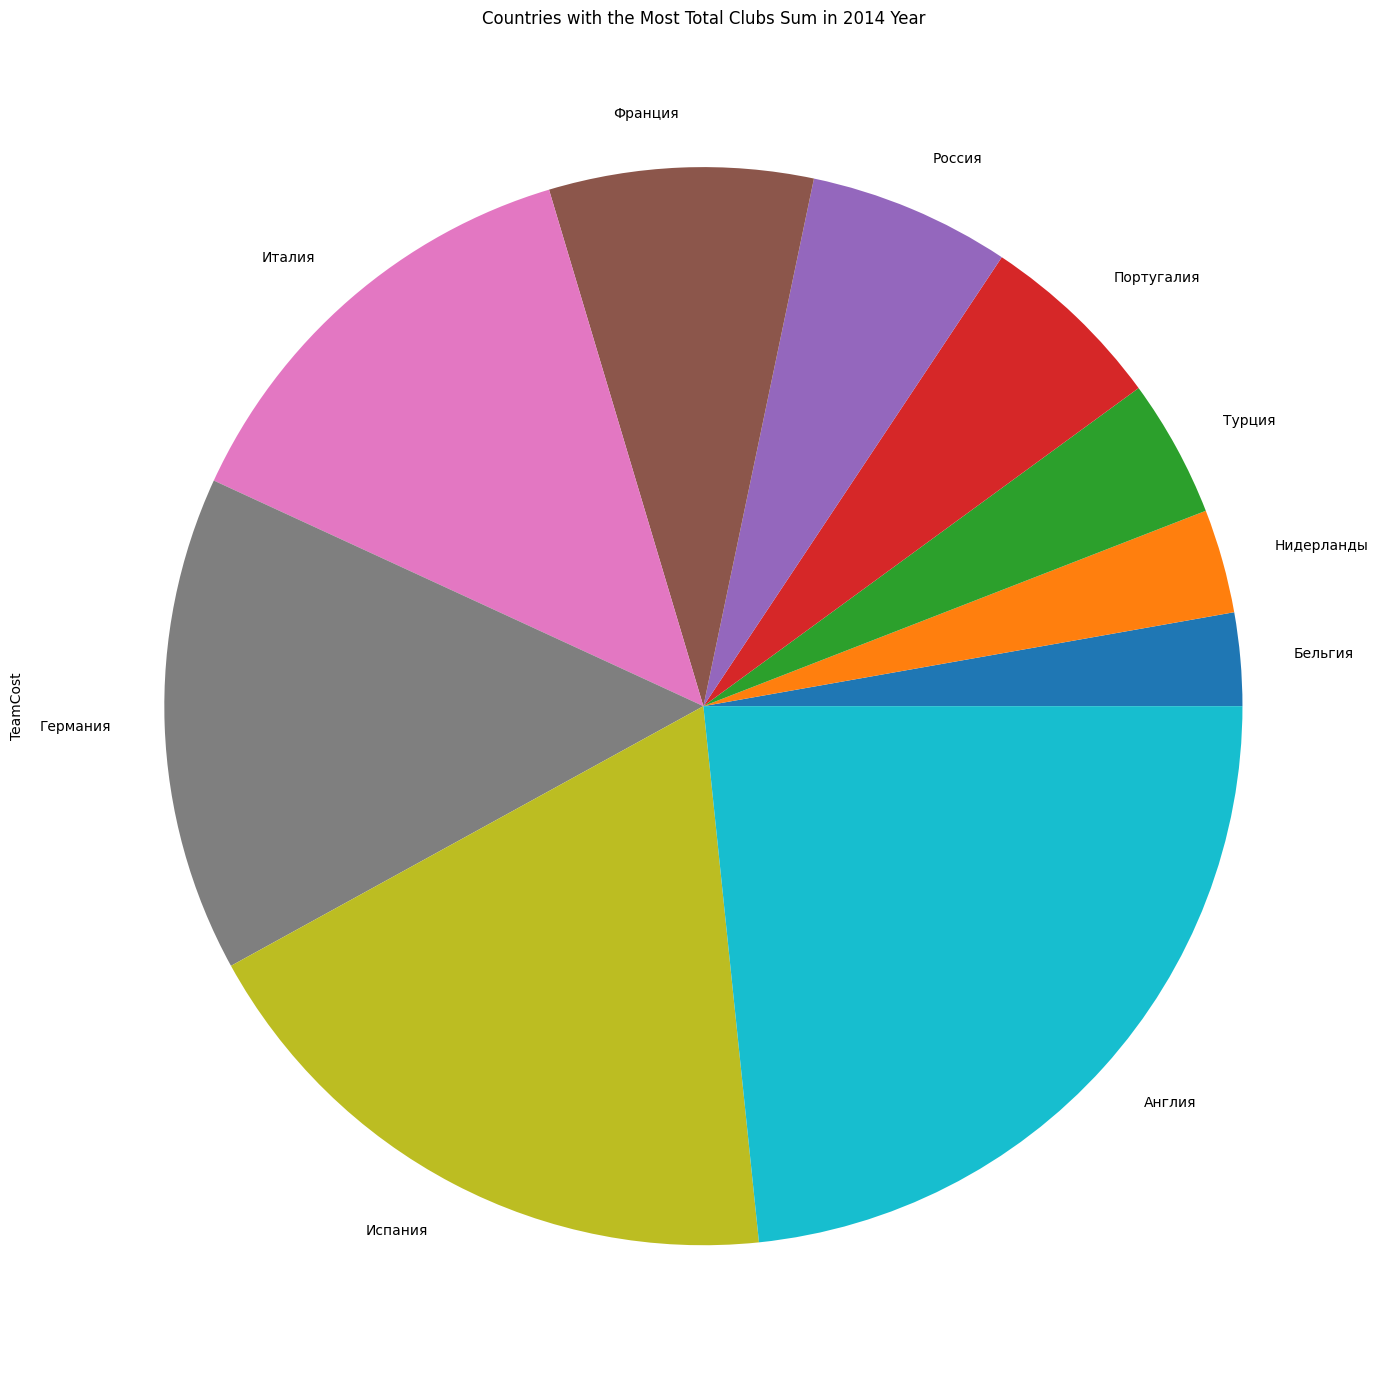

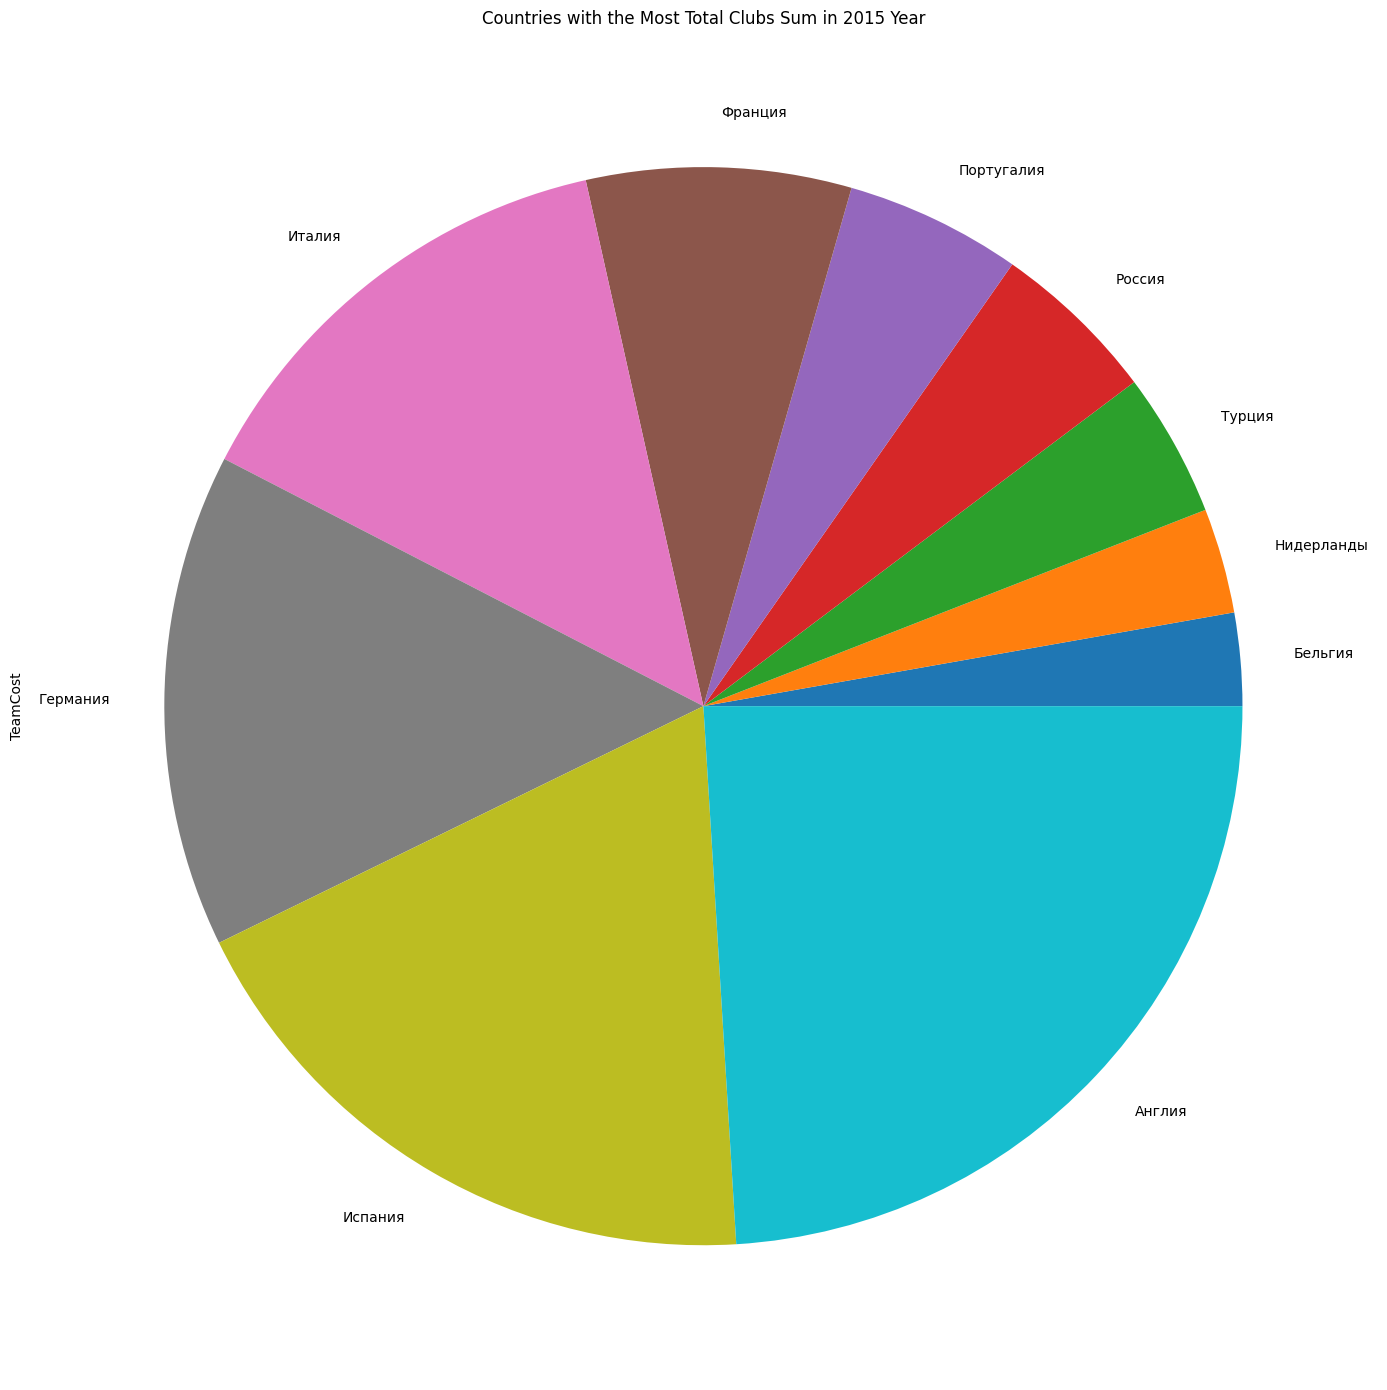

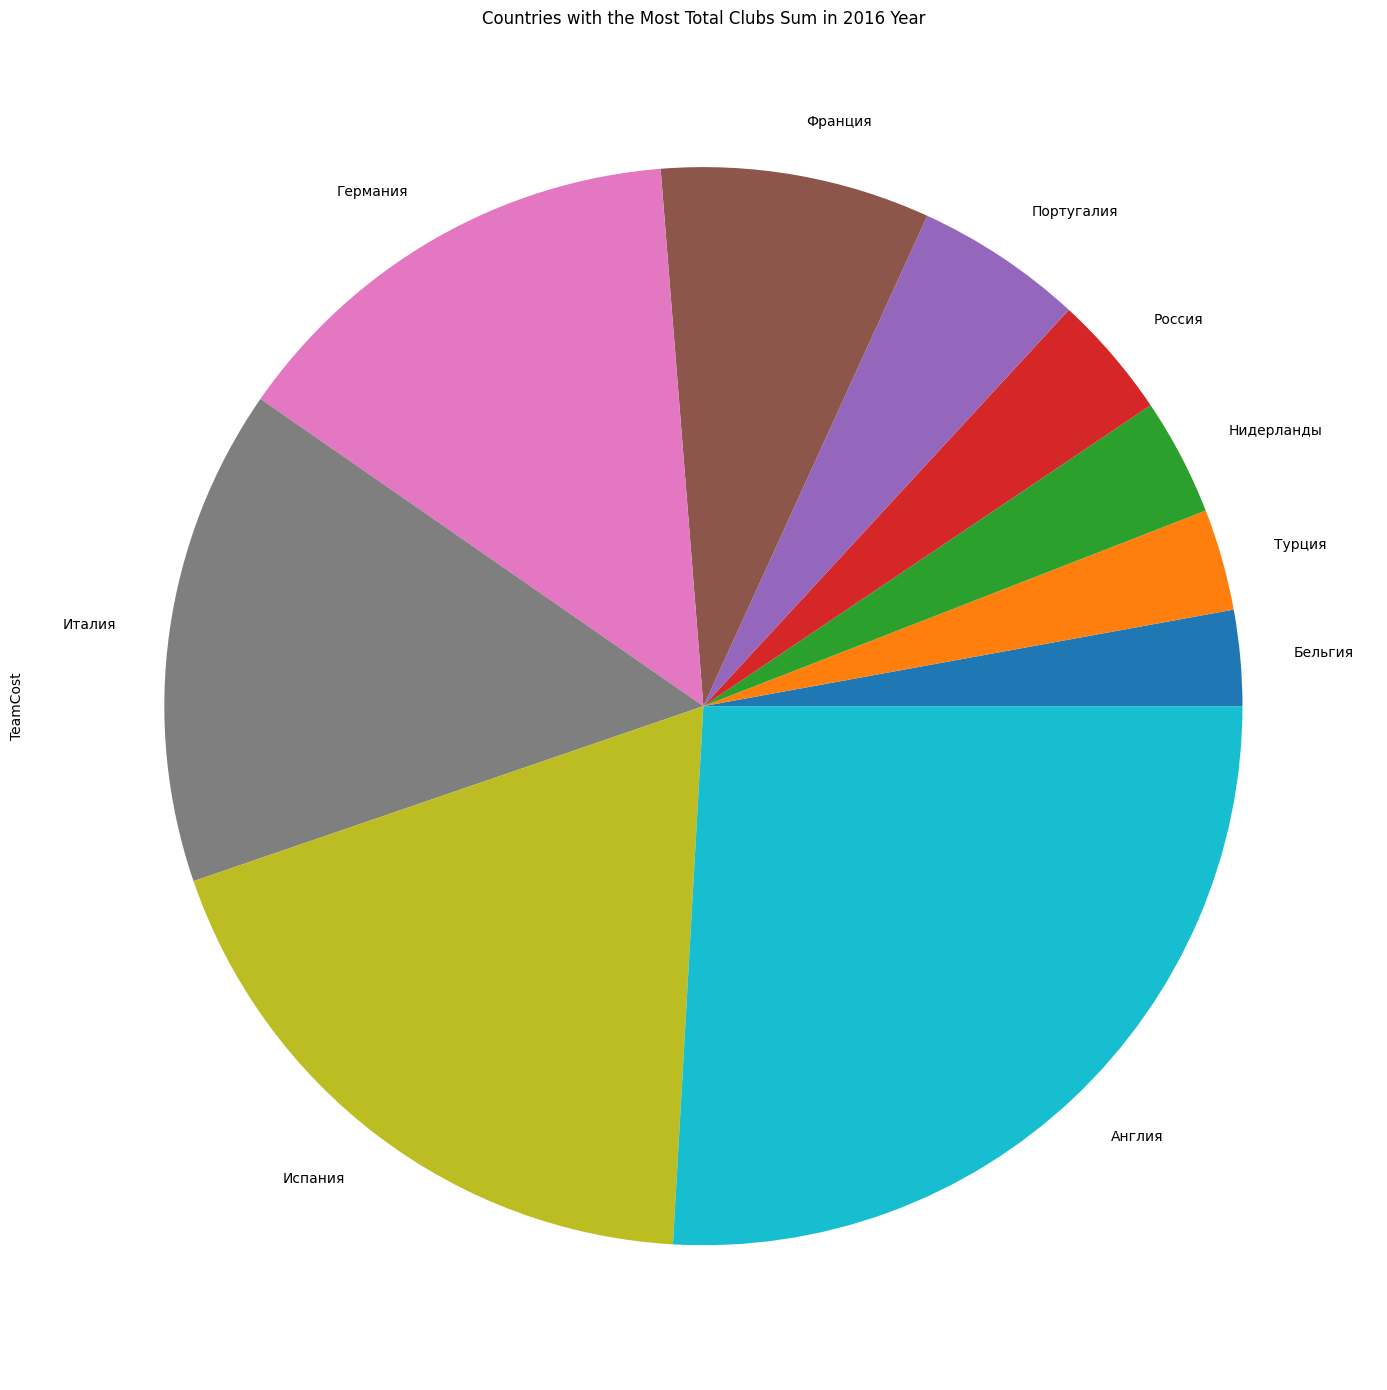

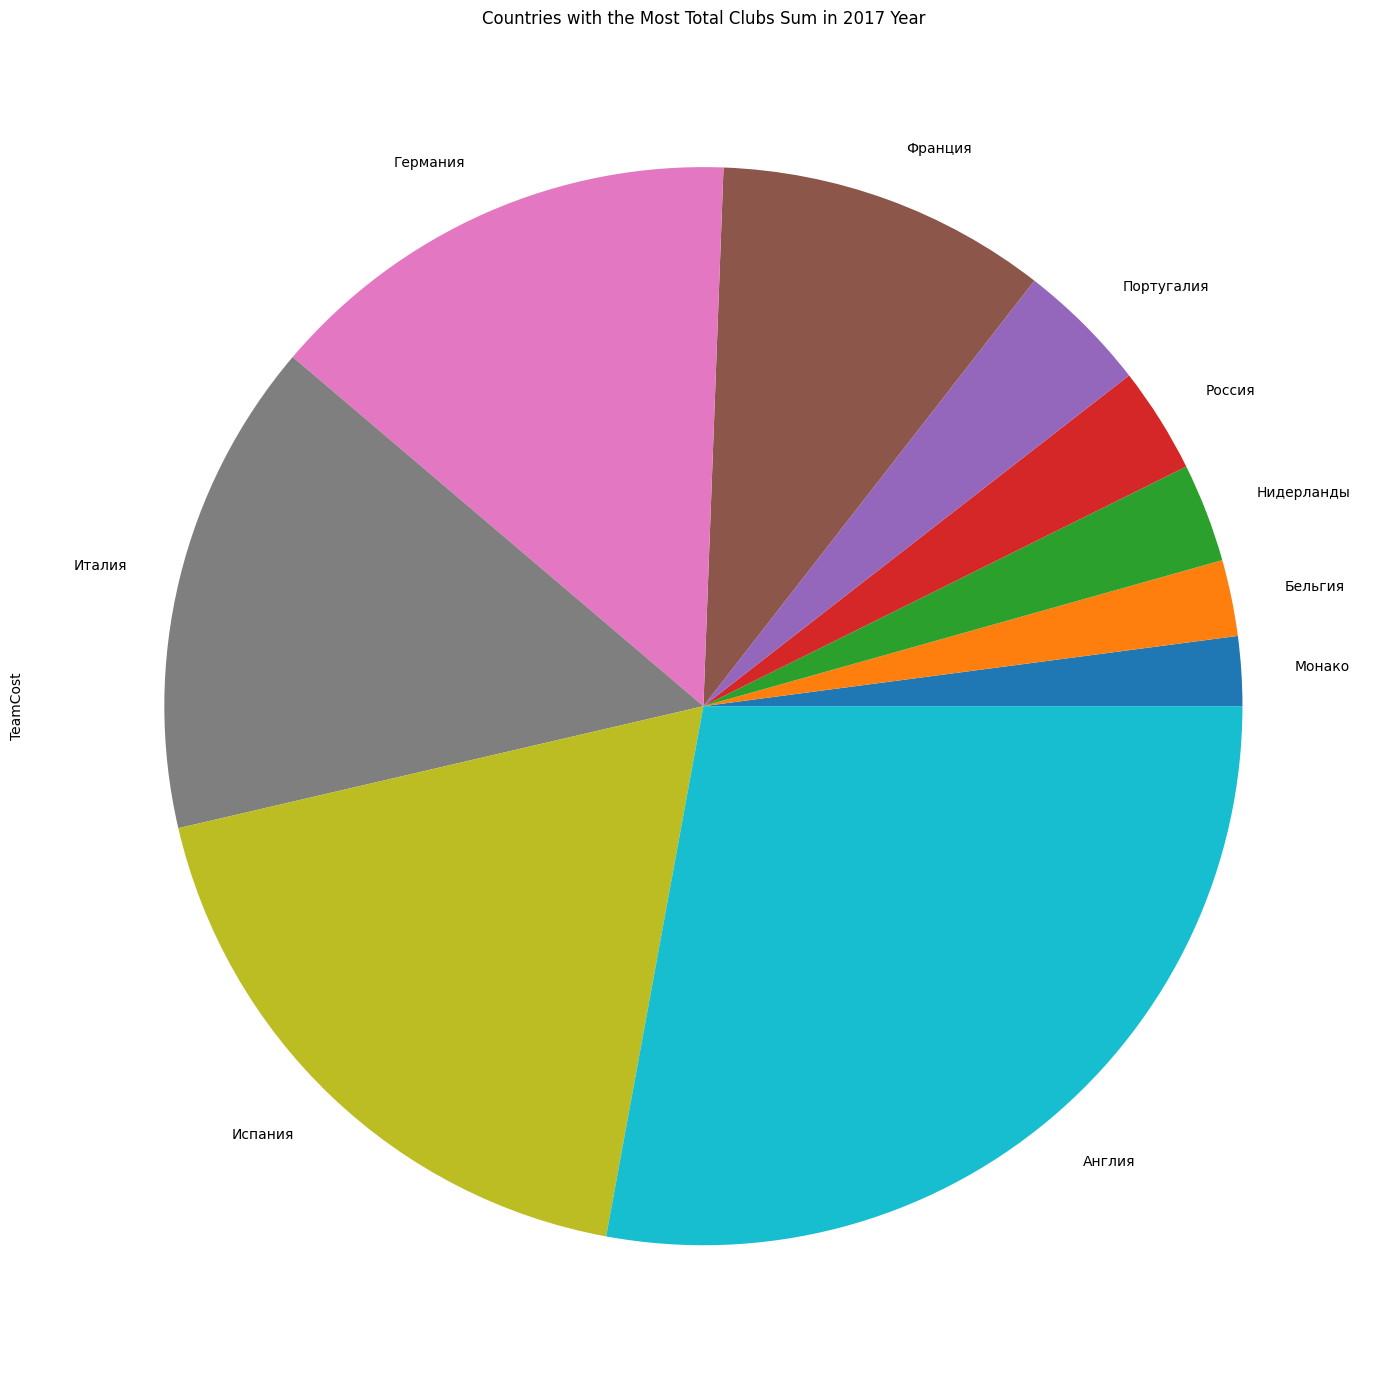

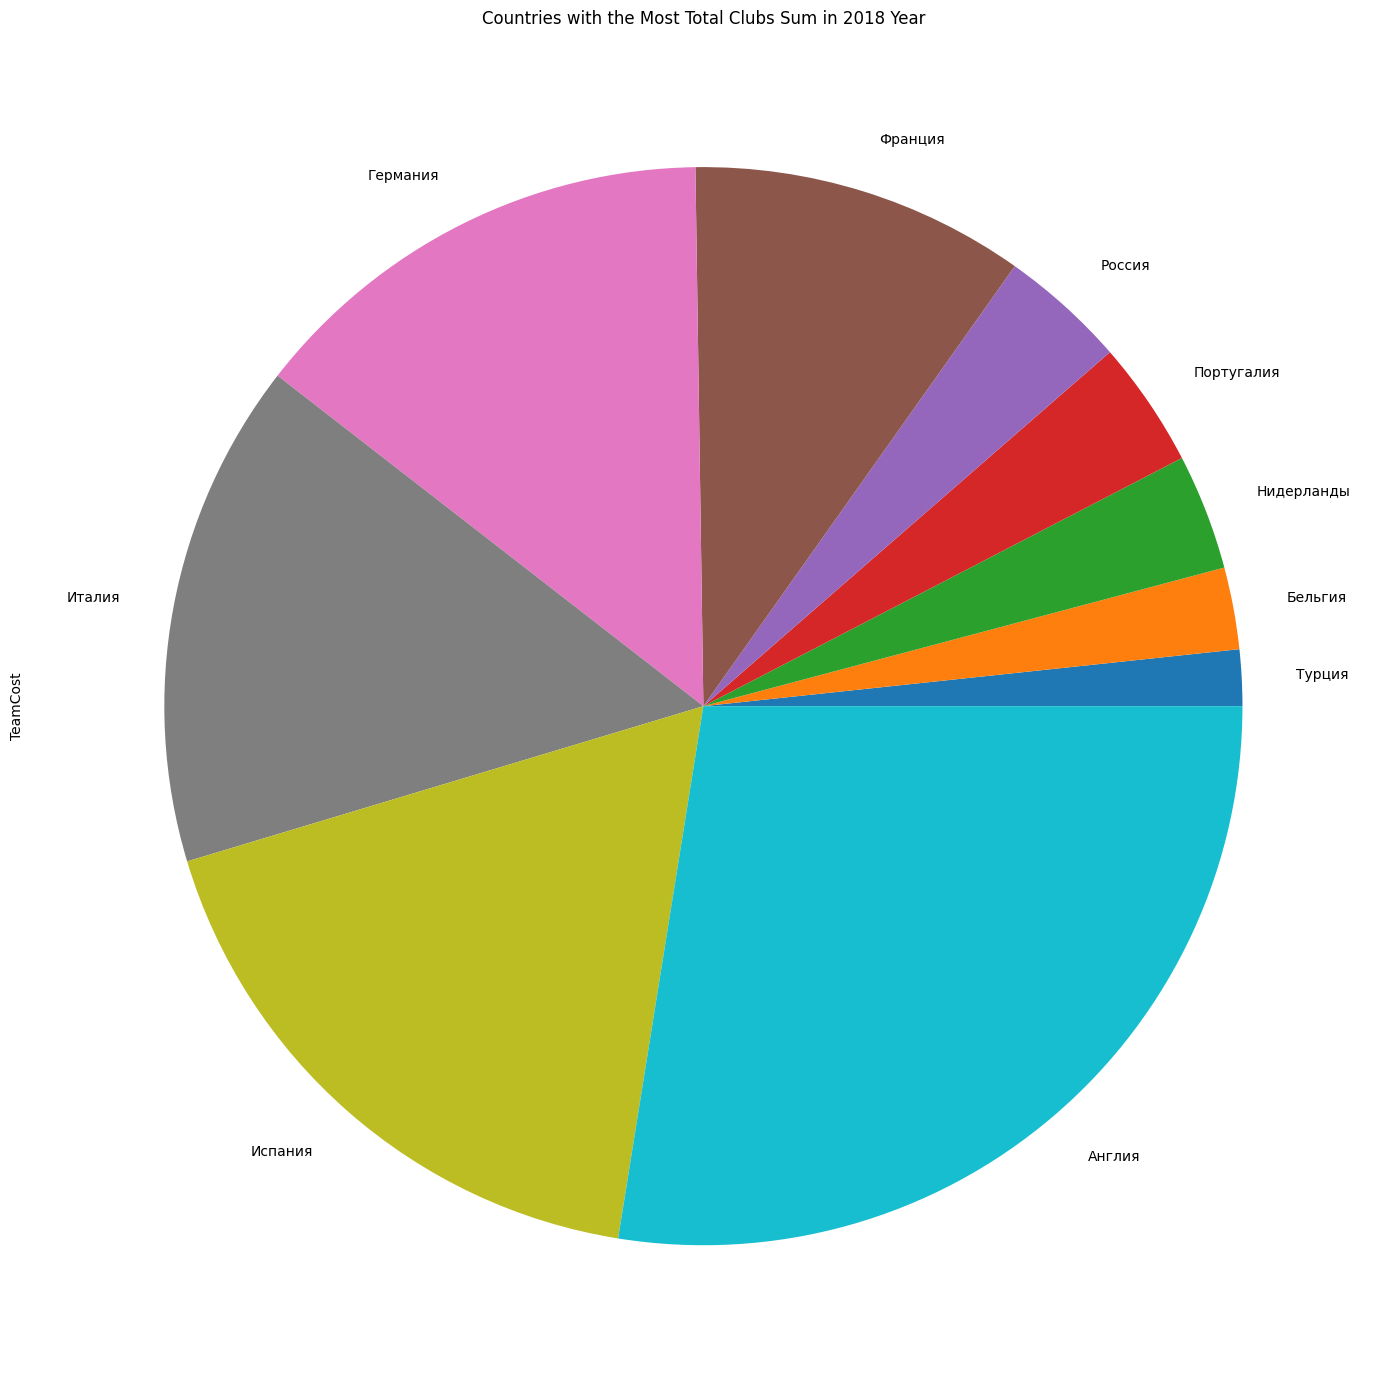

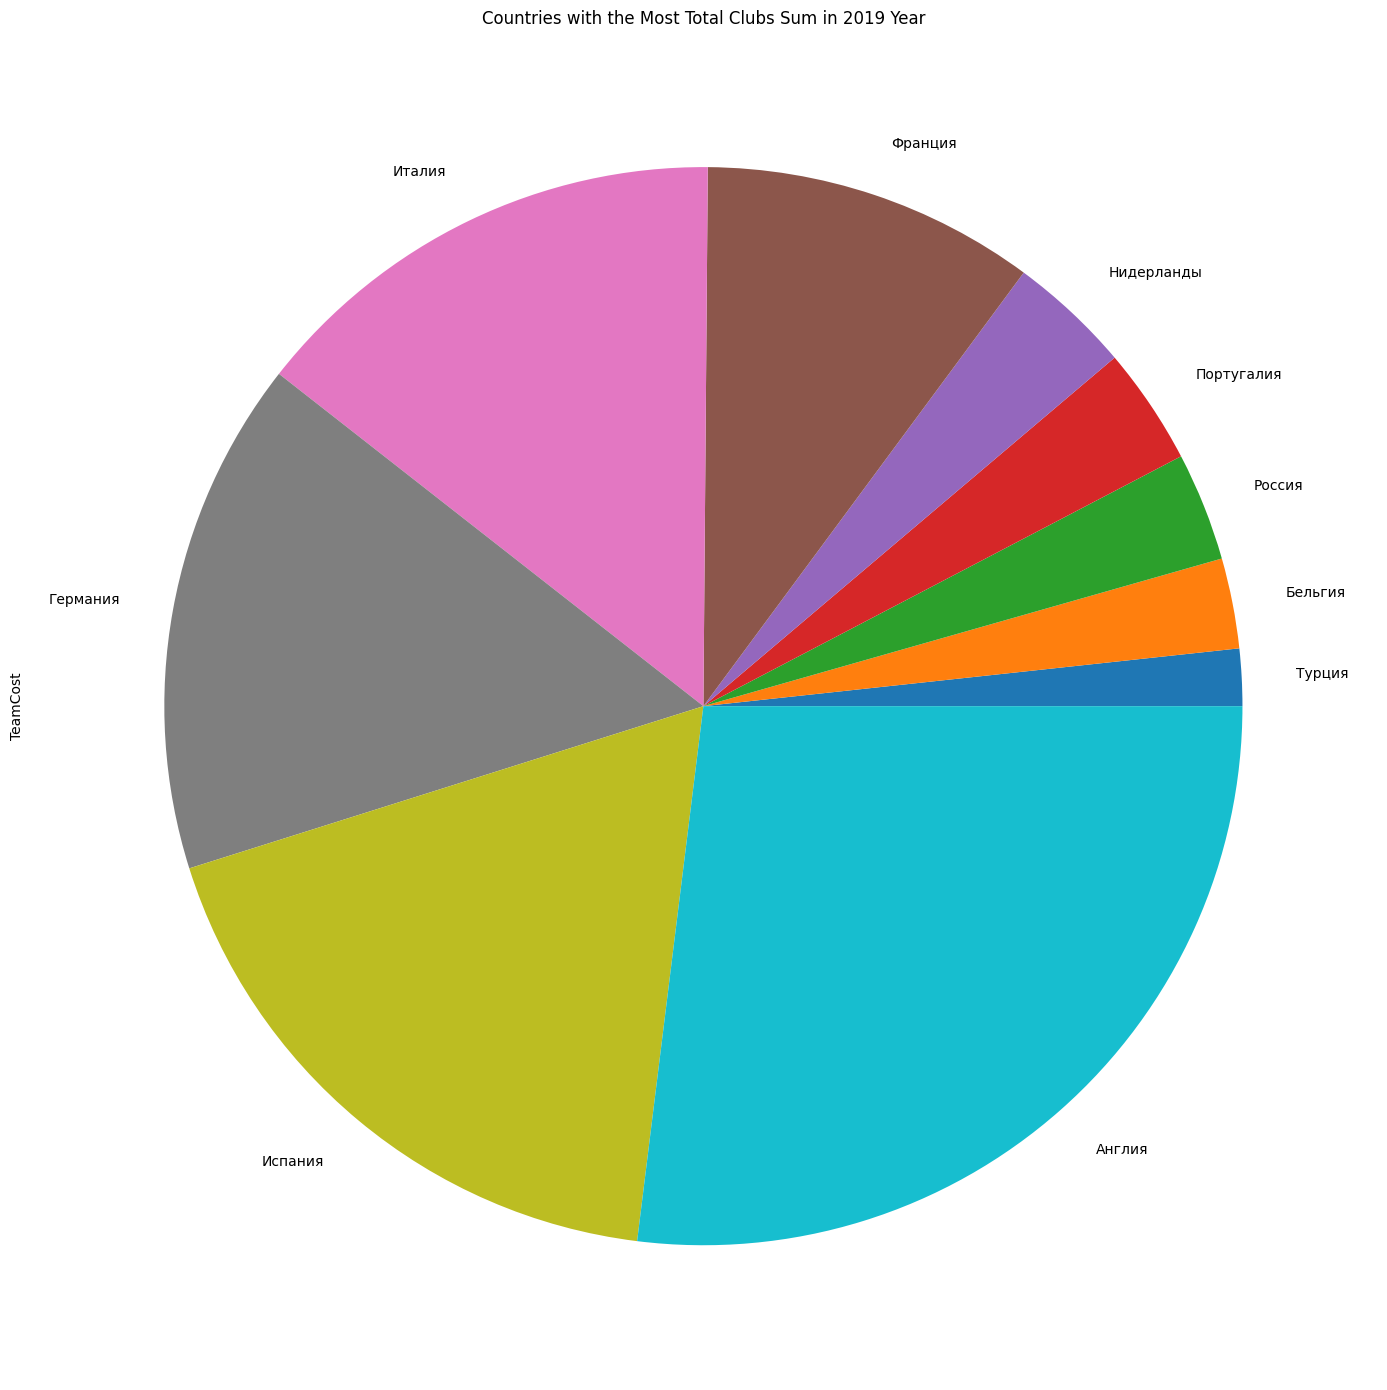

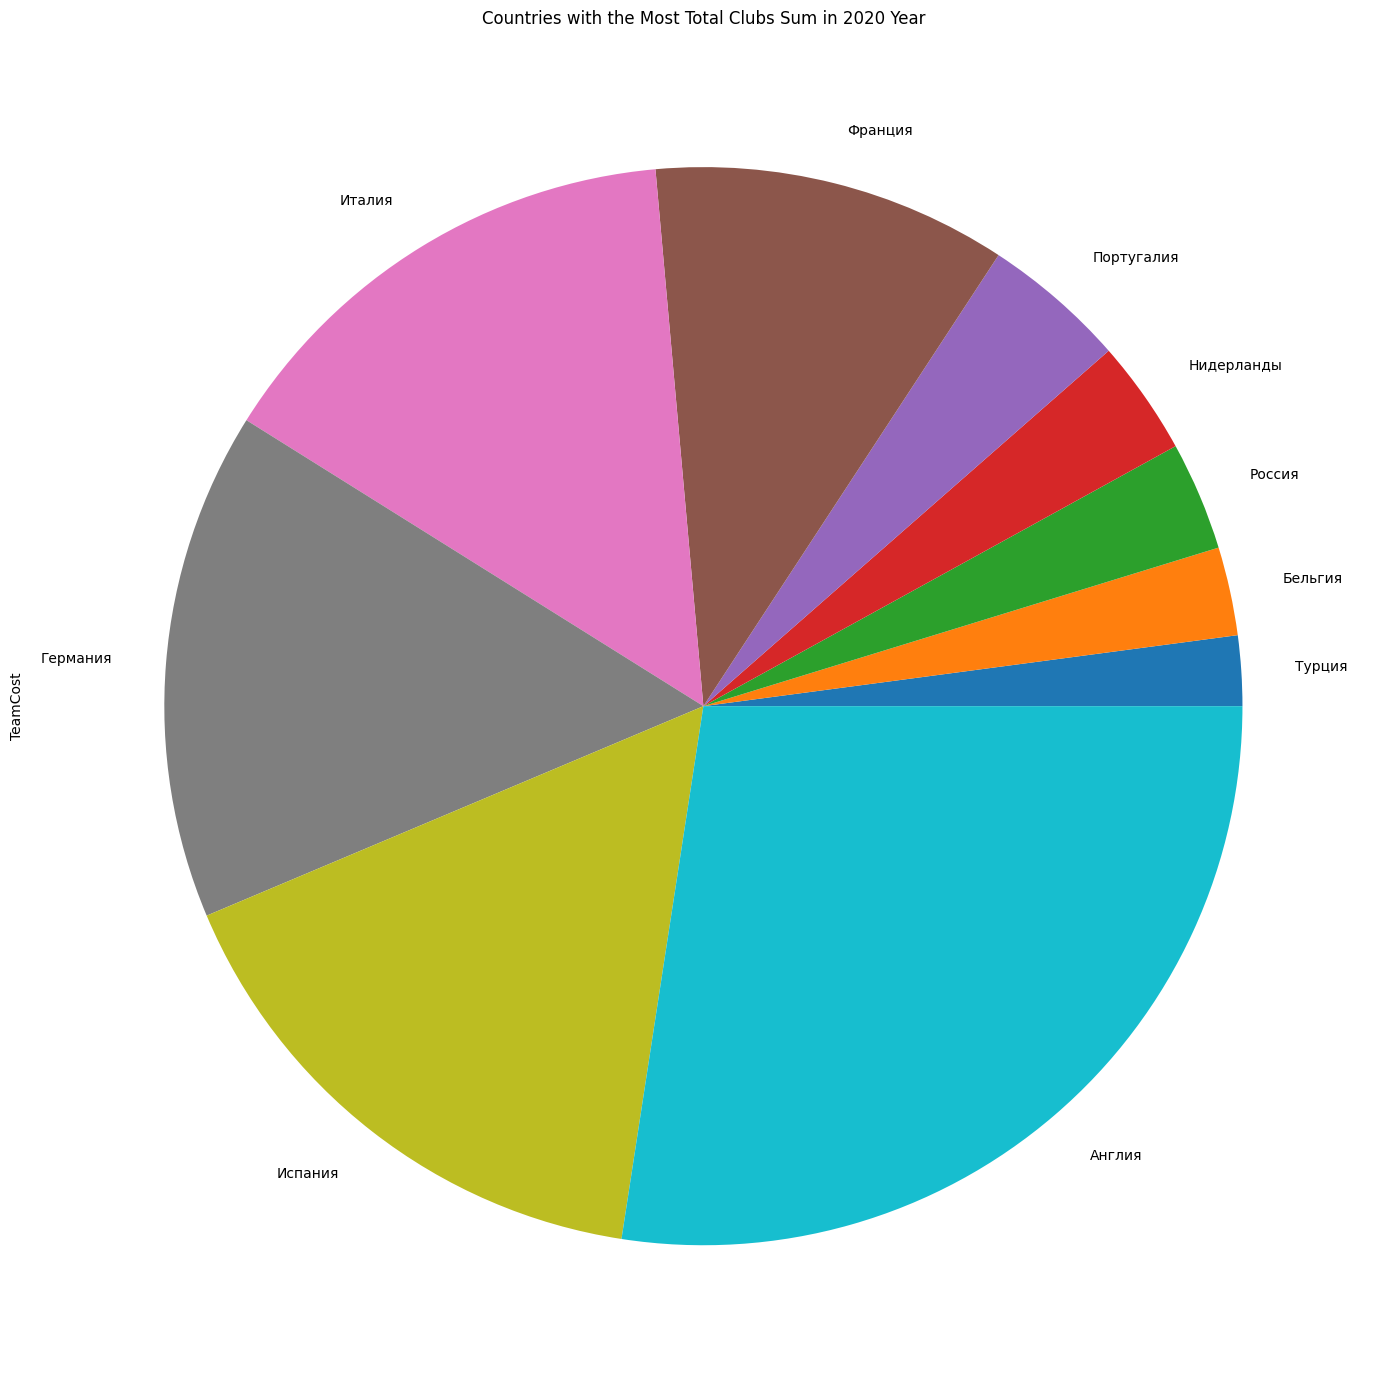

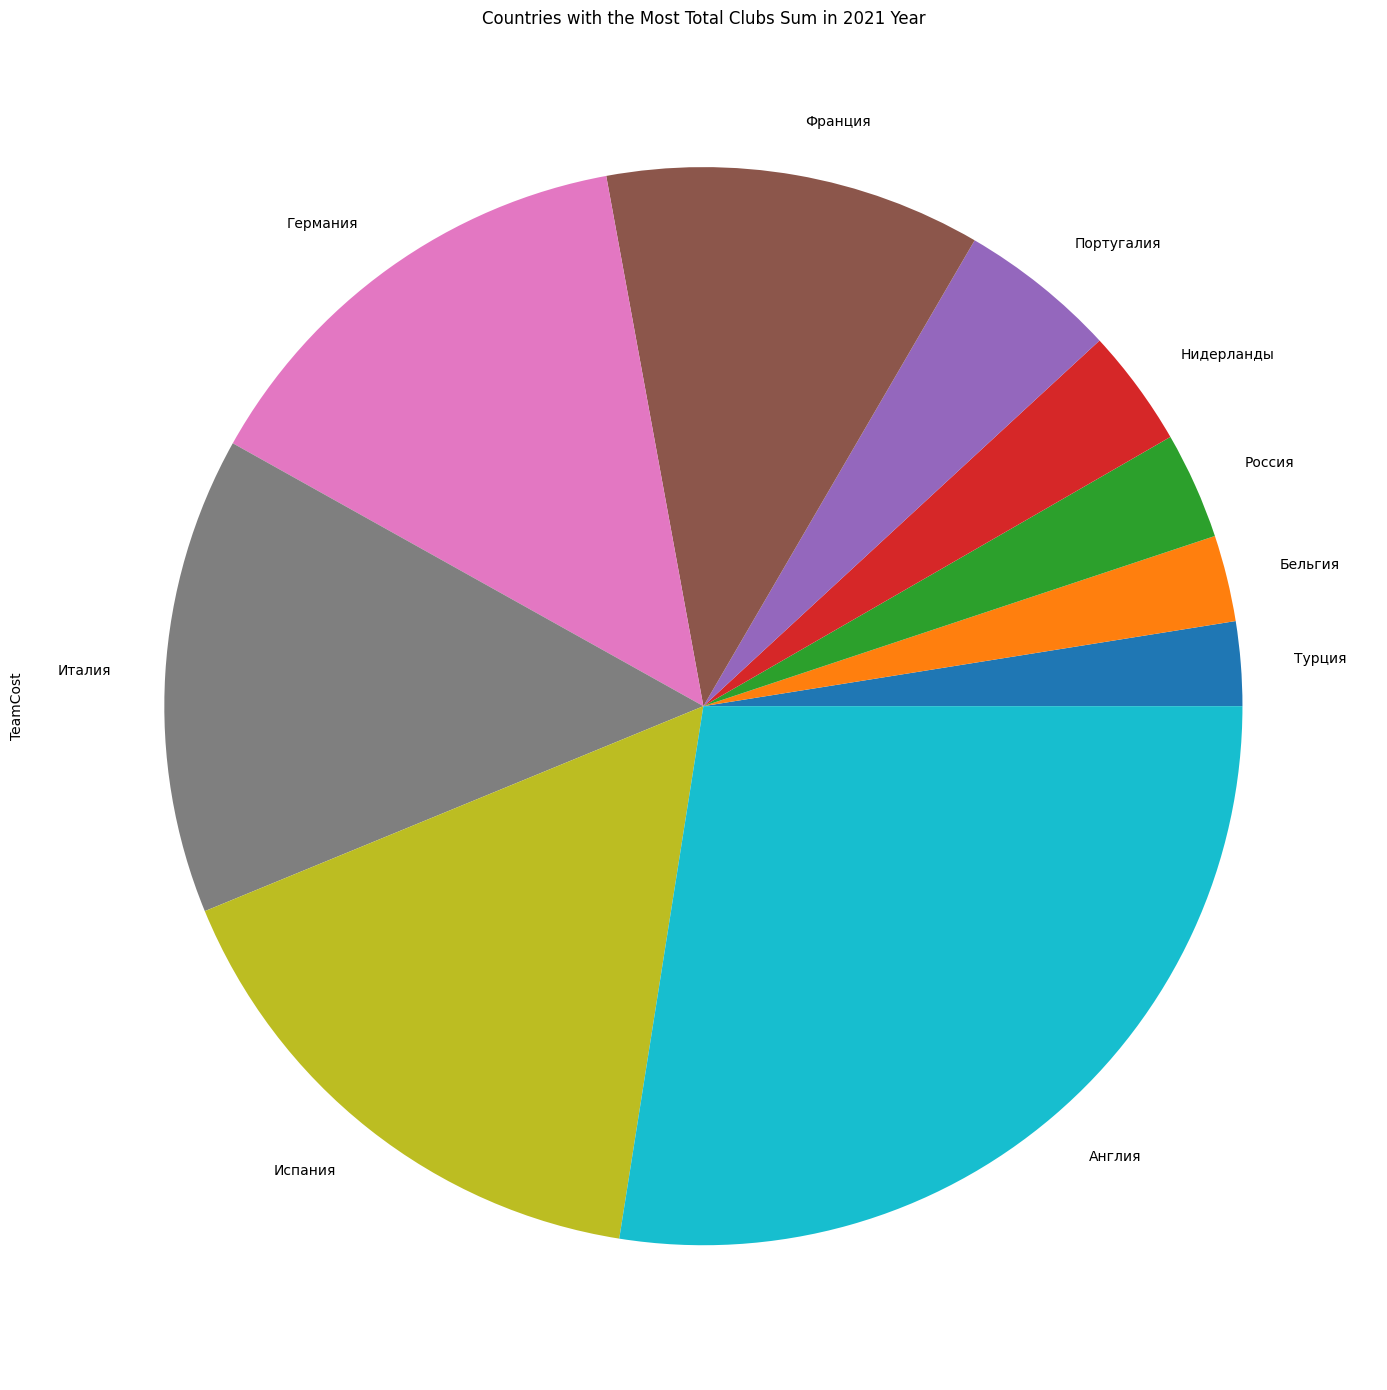

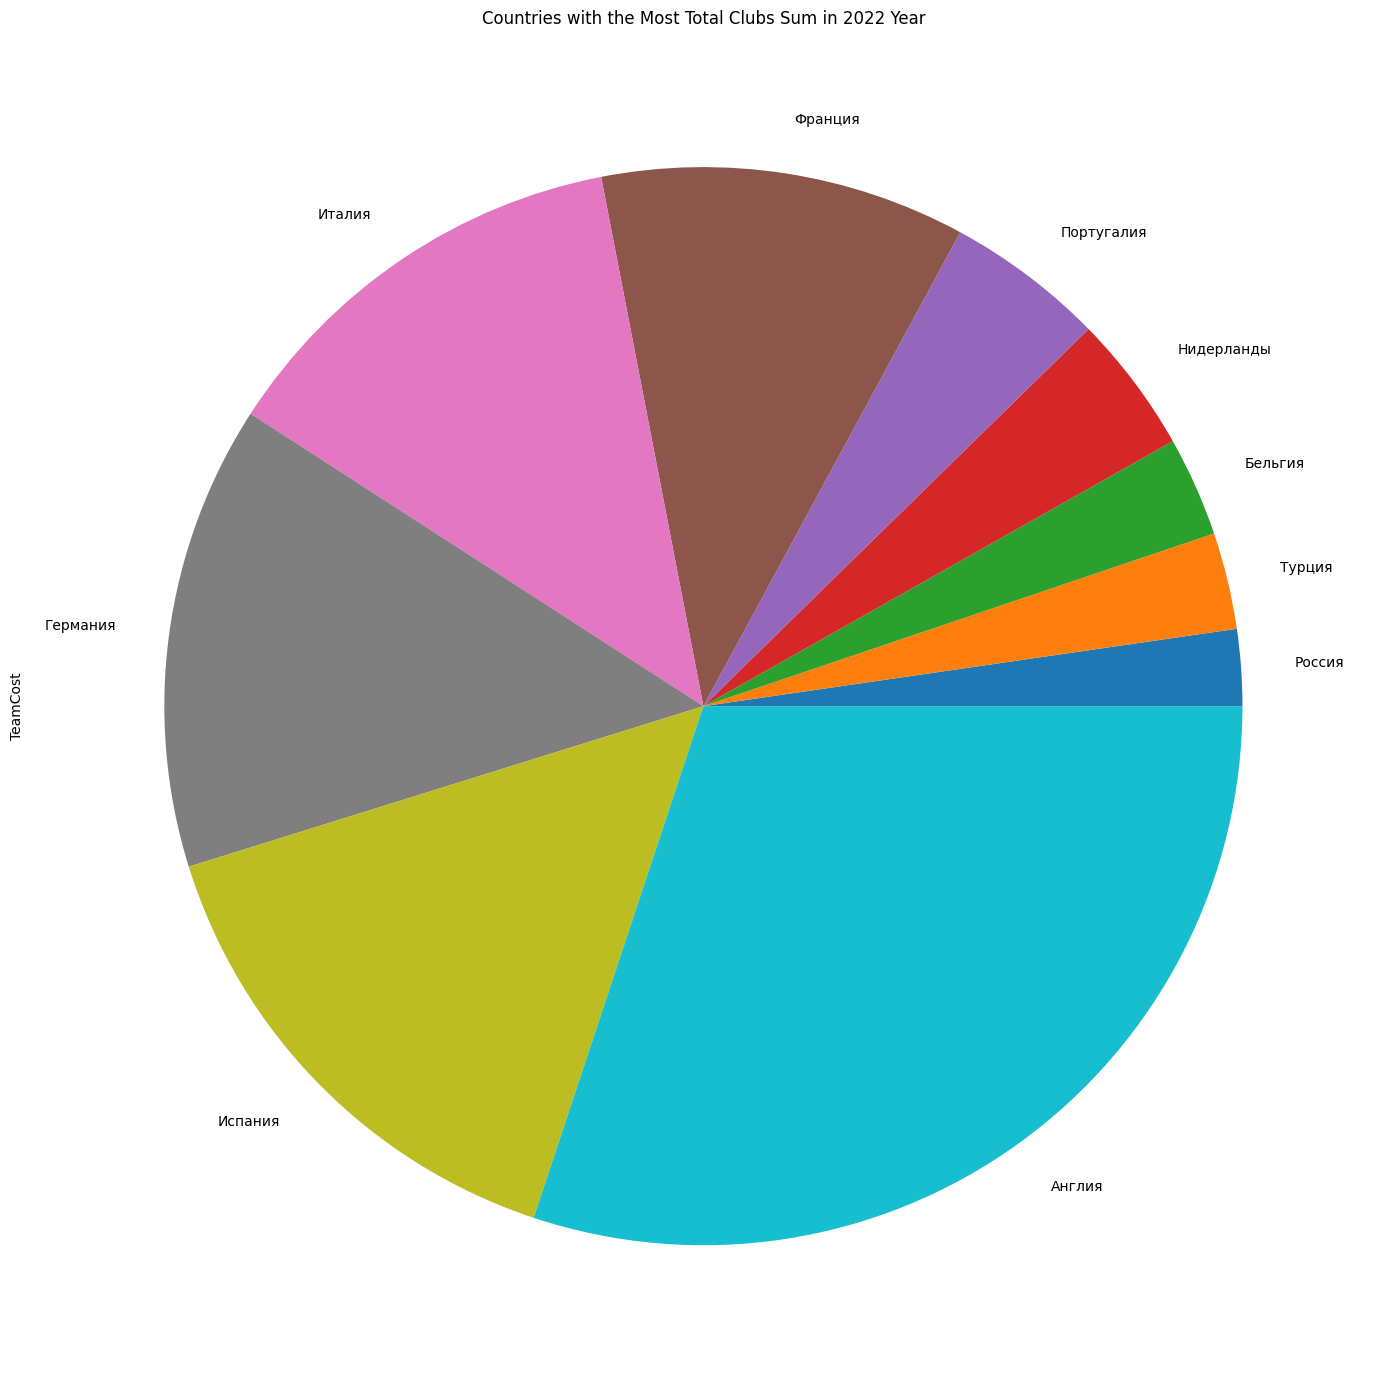

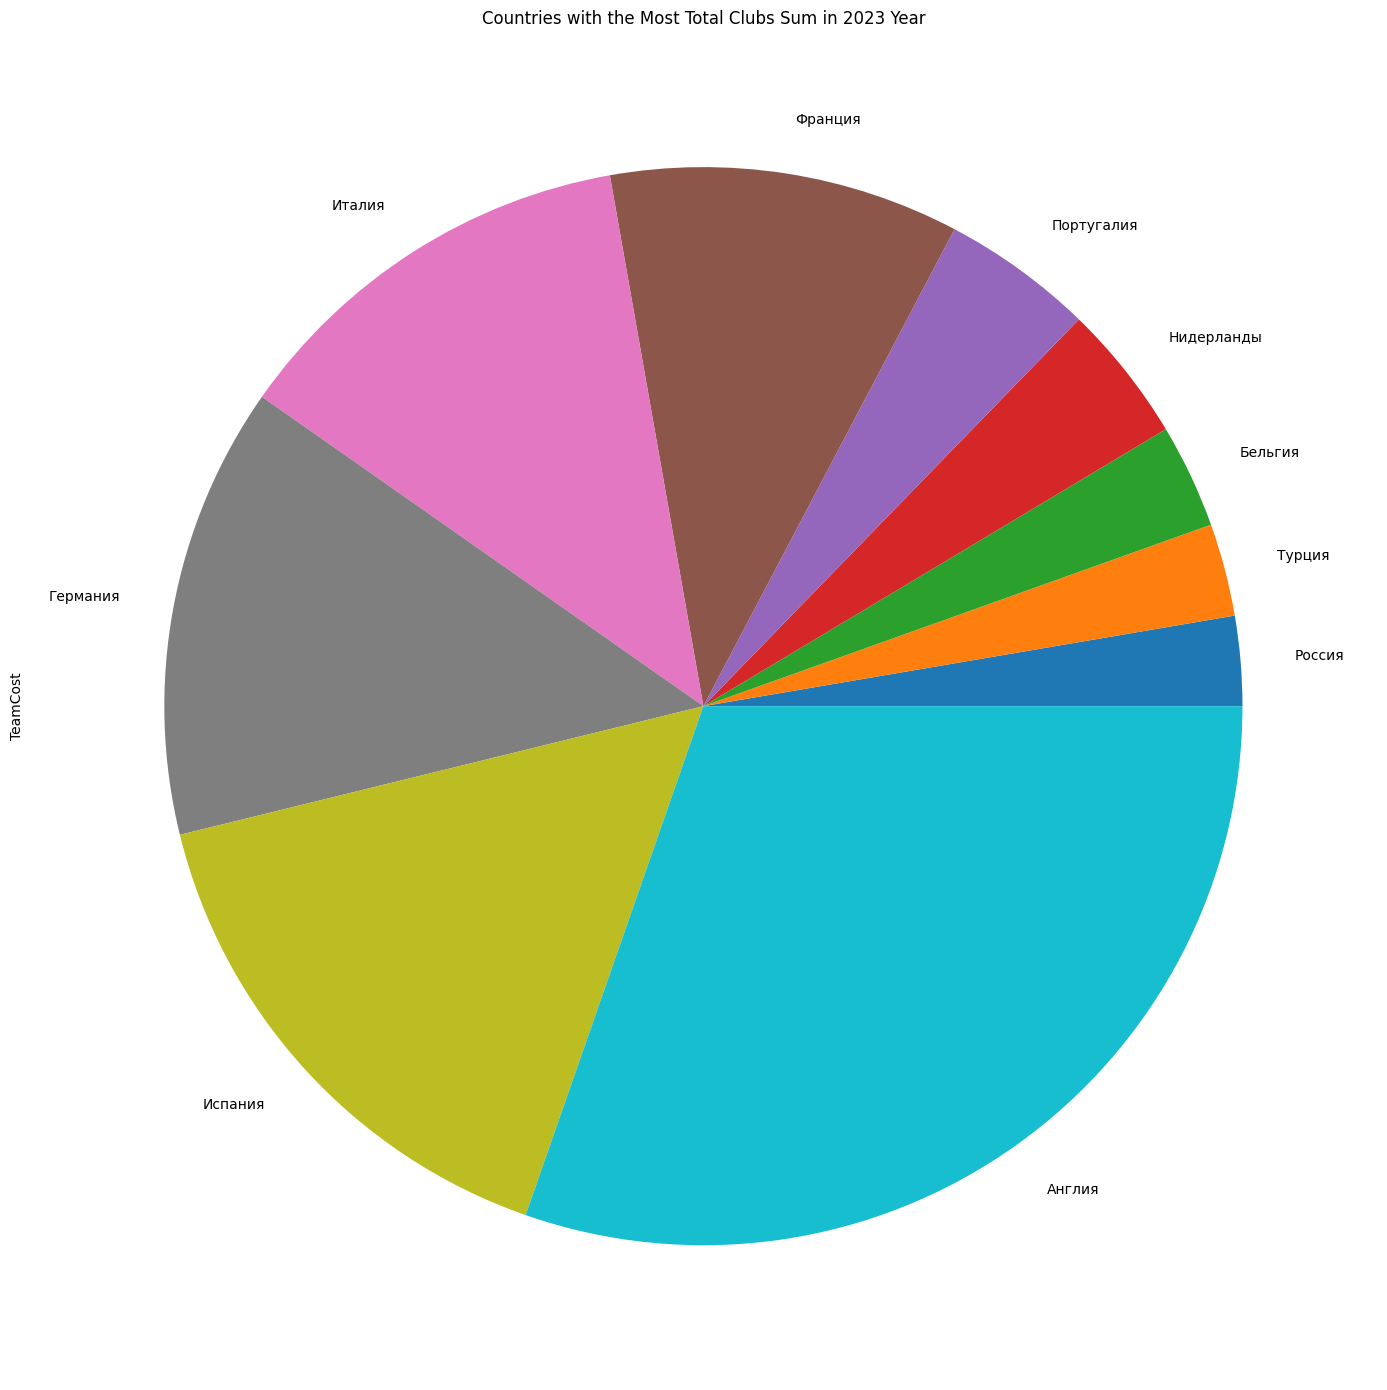

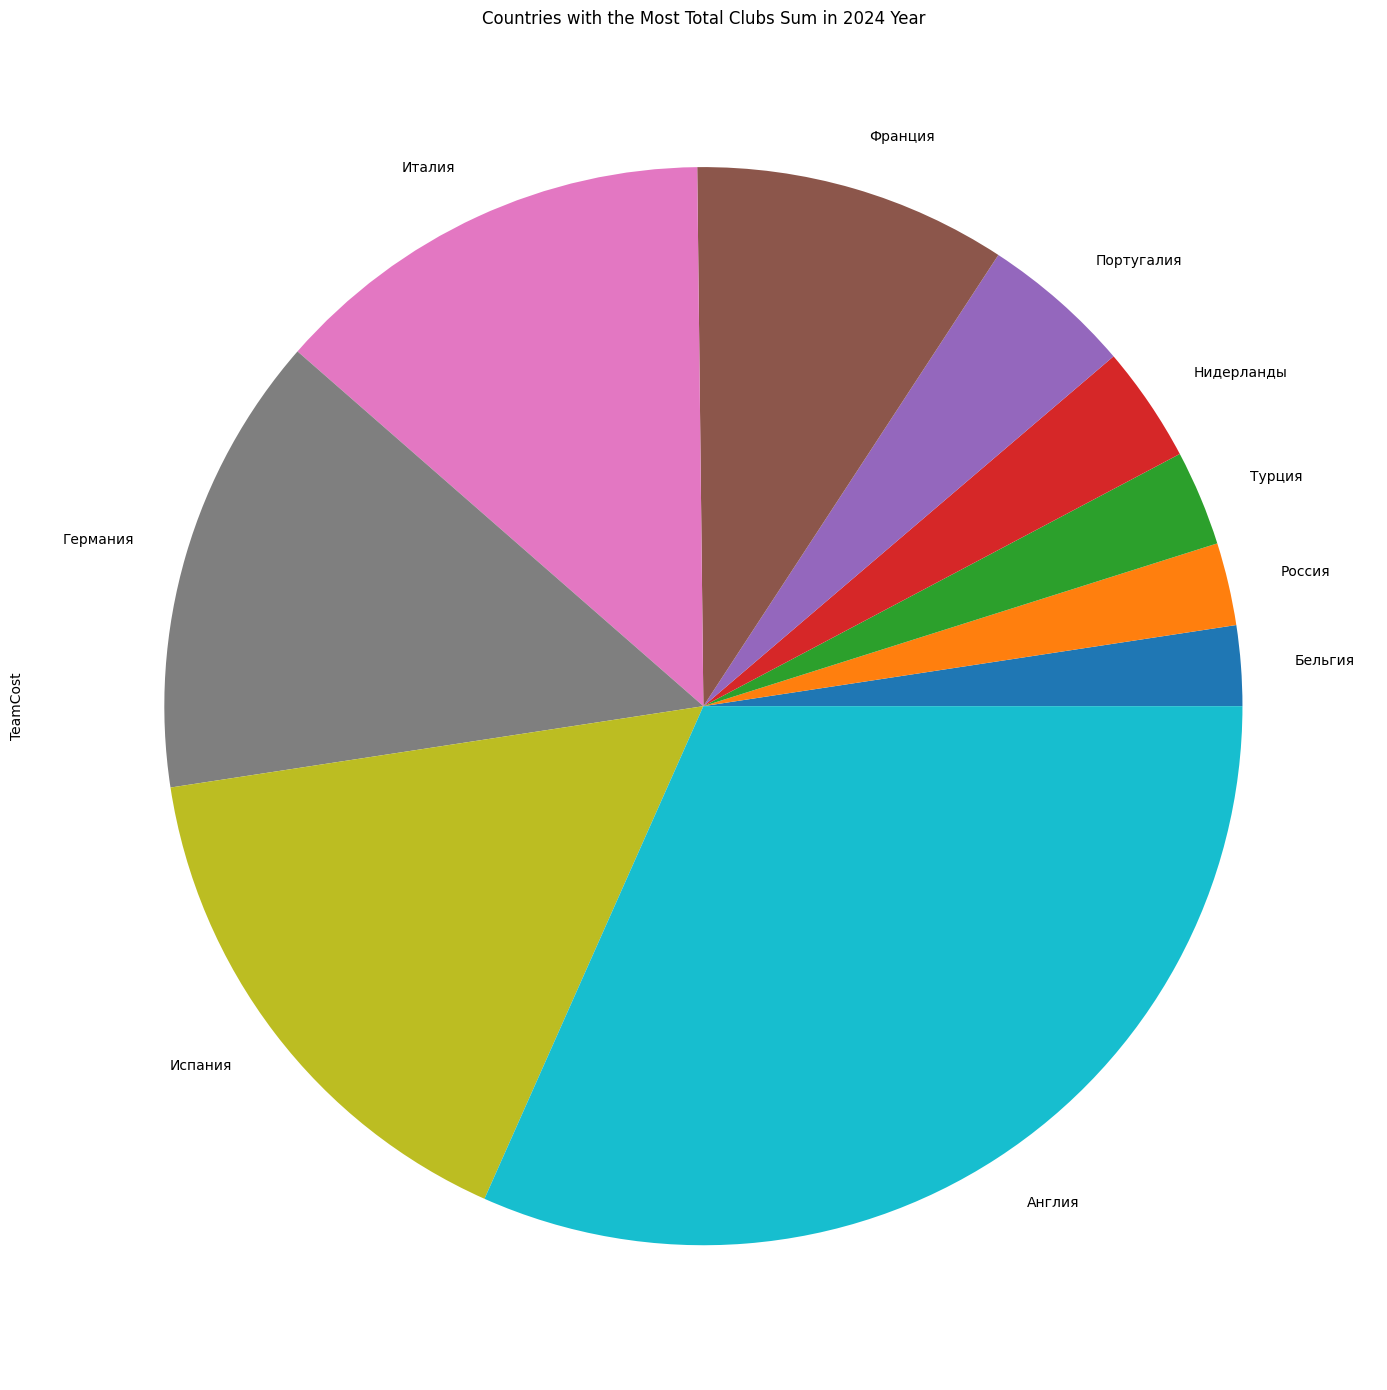

In [28]:
# Find countries with the most total clubs sum in every year
for year in complete_clubs_df["Year"].unique():
    plt.figure(figsize=(24, 14))
    complete_clubs_df.query(f"Year == {year}") \
                .groupby("Country_Name") \
                .agg({"TeamCost": "sum"}) \
                .sort_values("TeamCost", ascending=True) \
                .tail(10) \
                .plot(kind="pie", y="TeamCost", color="skyblue", legend=False, ax=plt.gca())
    plt.title(f"Countries with the Most Total Clubs Sum in {year} Year")
    plt.tight_layout()
    None

Pie chart do not really show numbers, so let us visualize the same data with horizontal bar plots

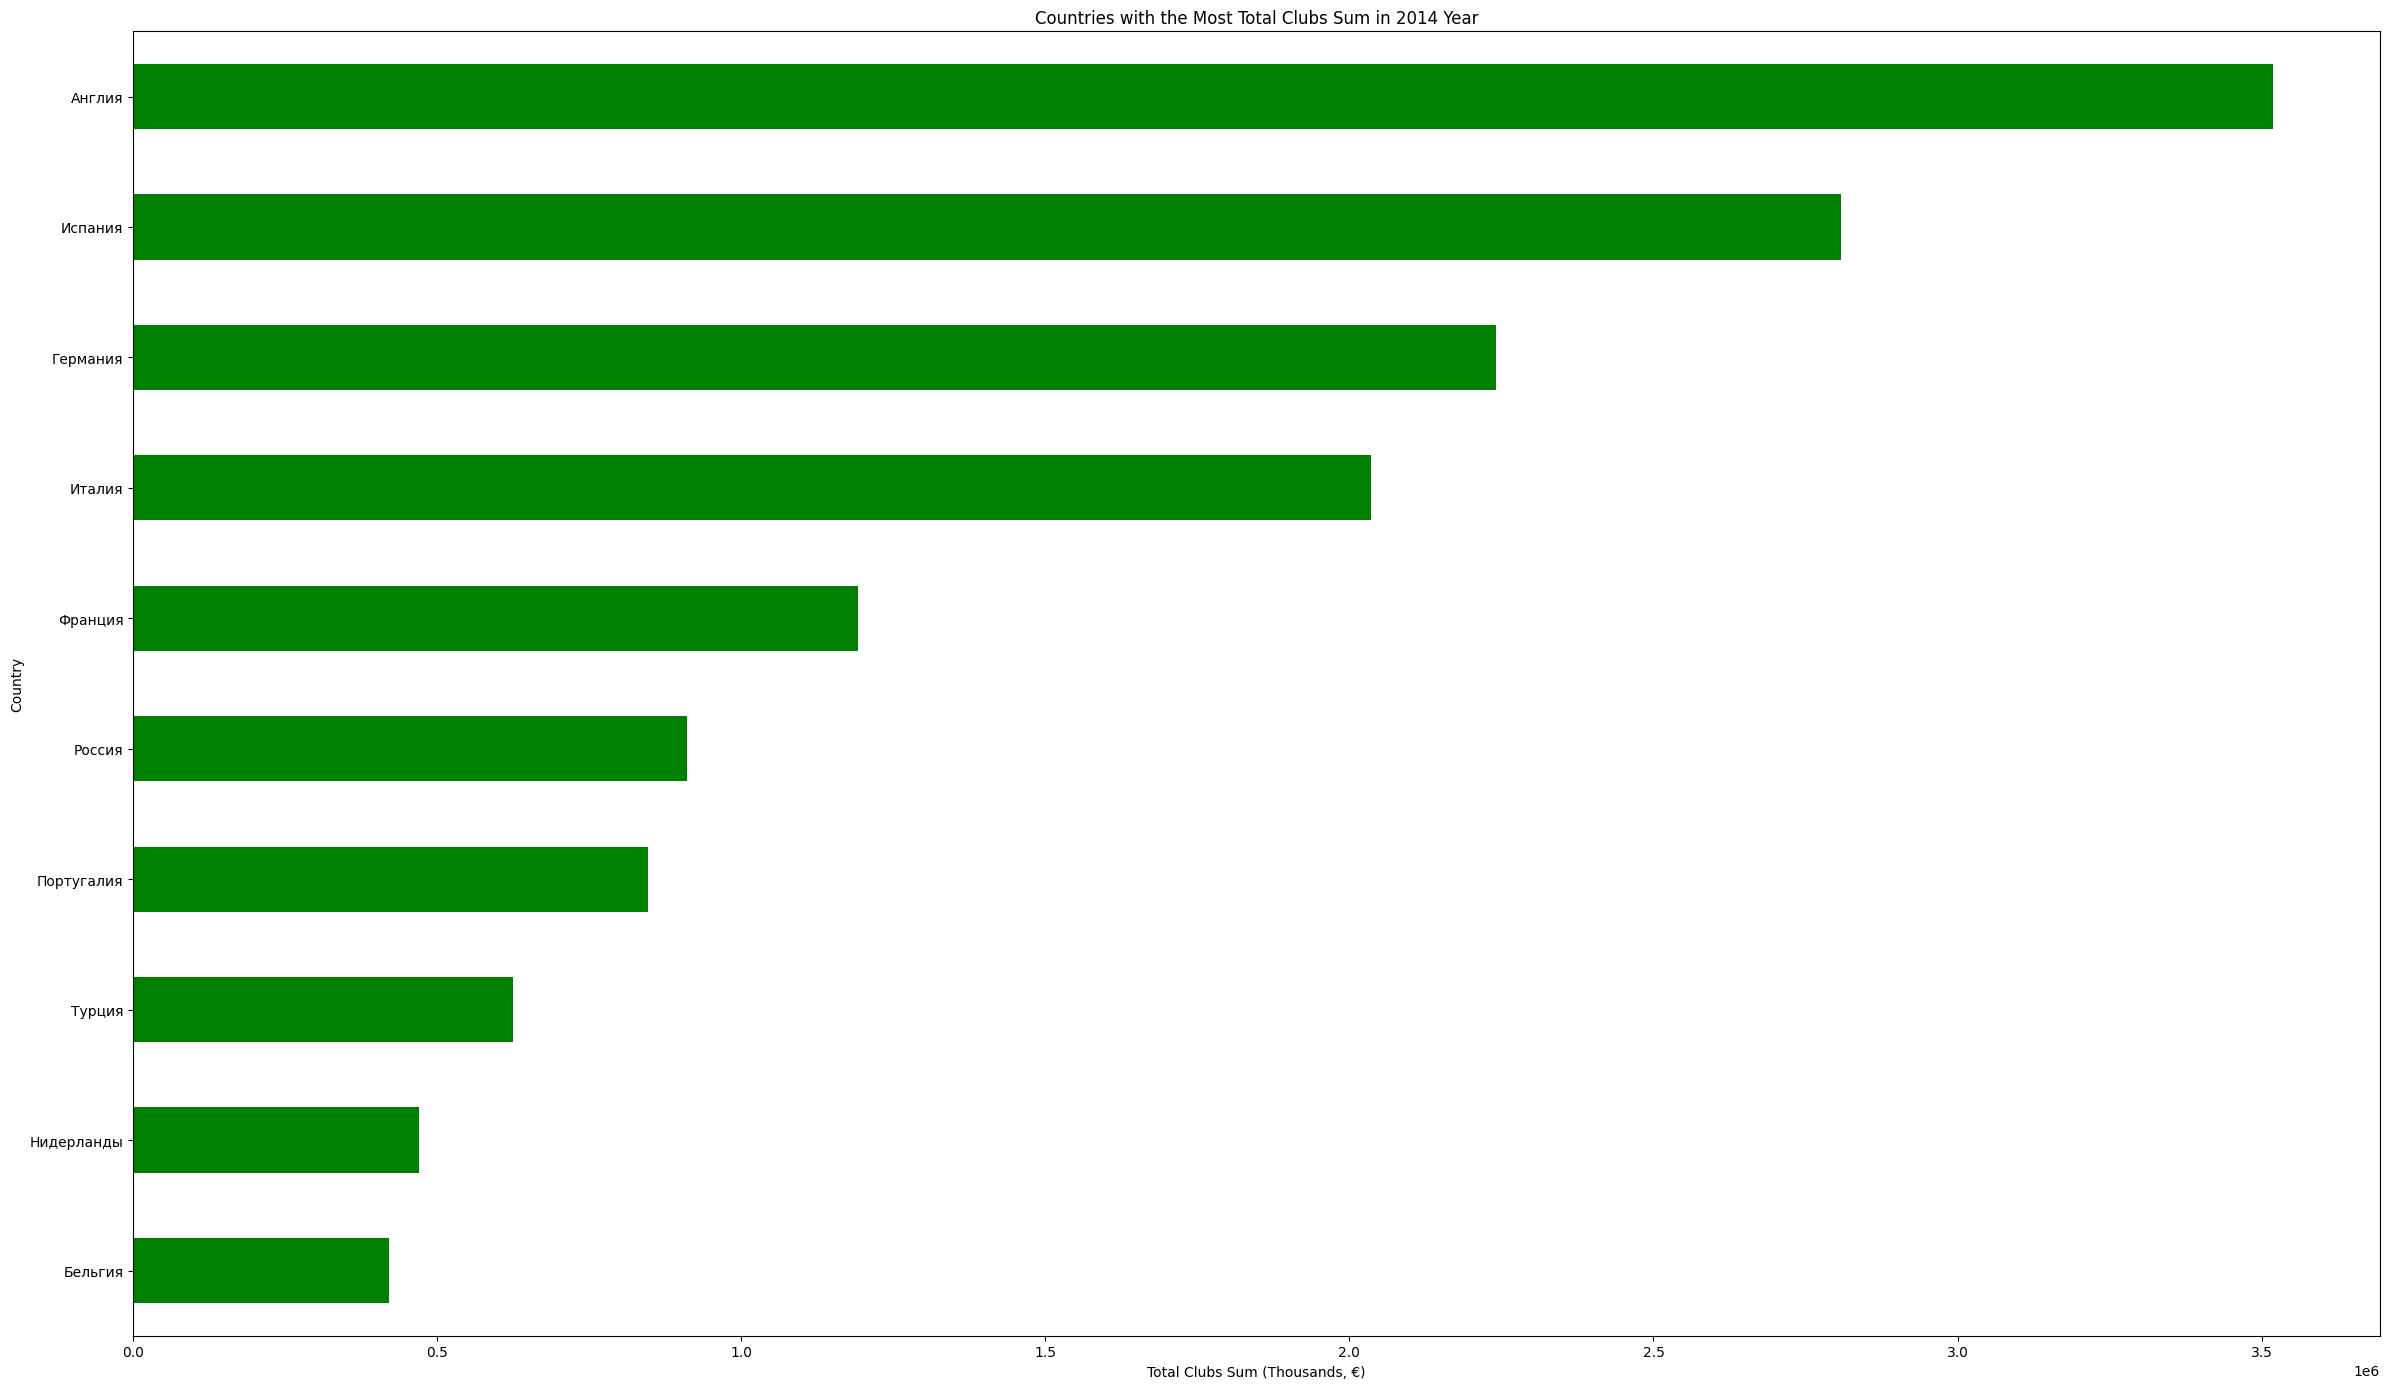

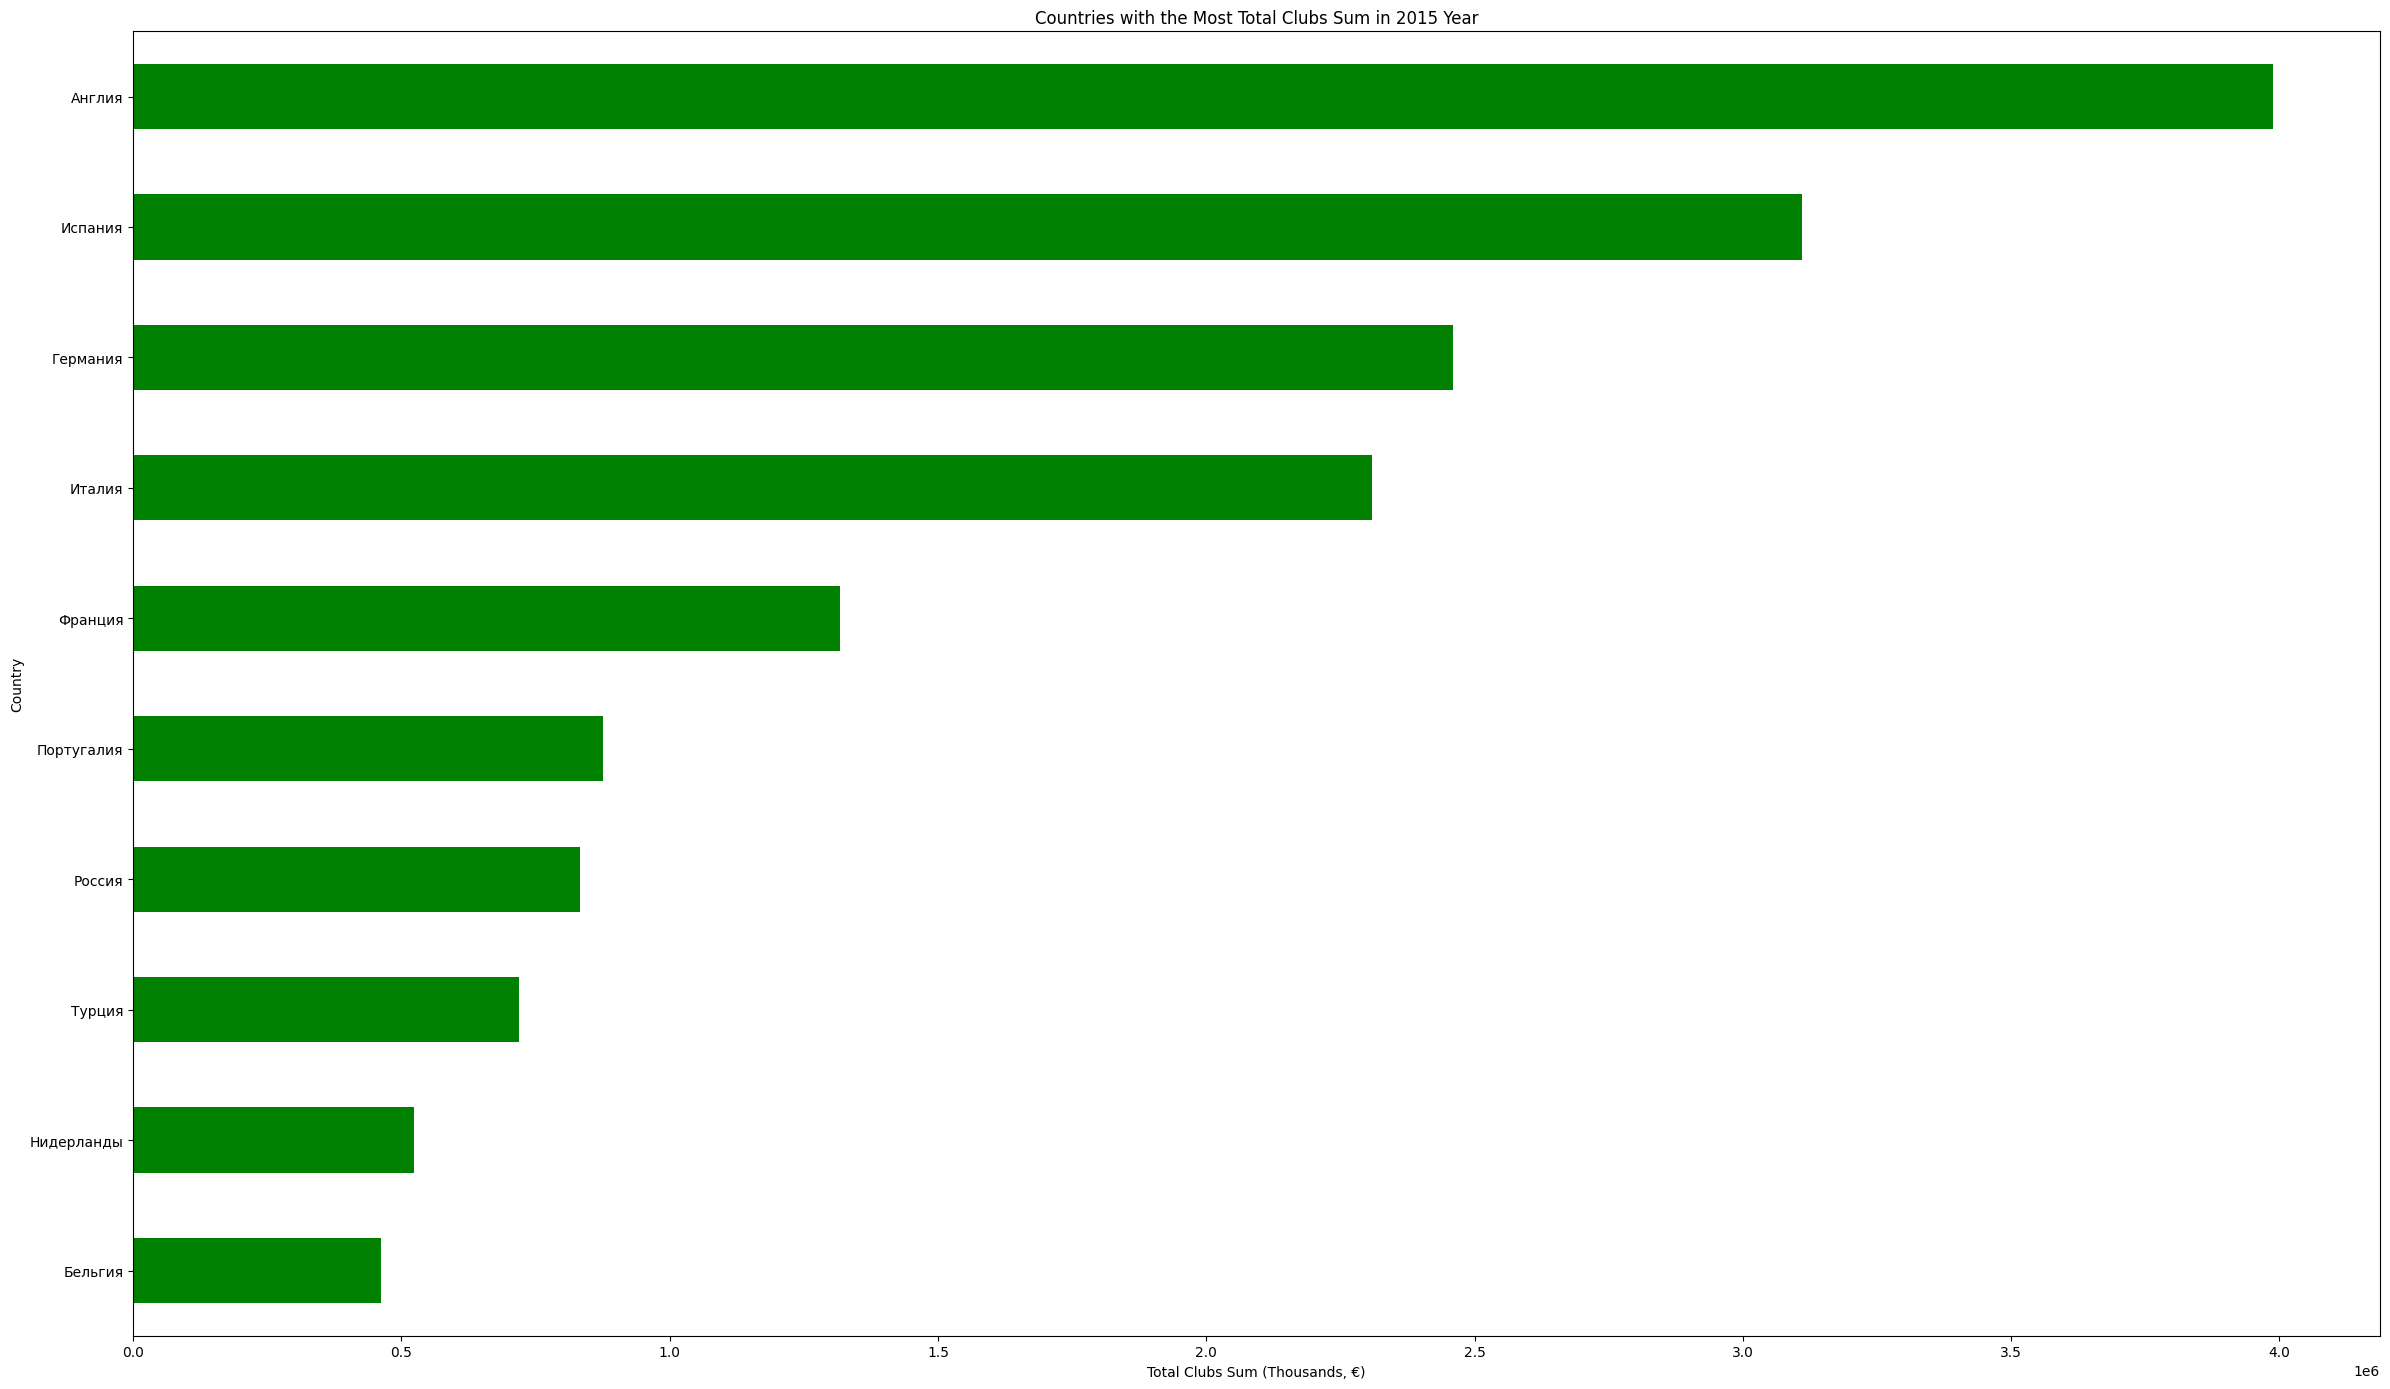

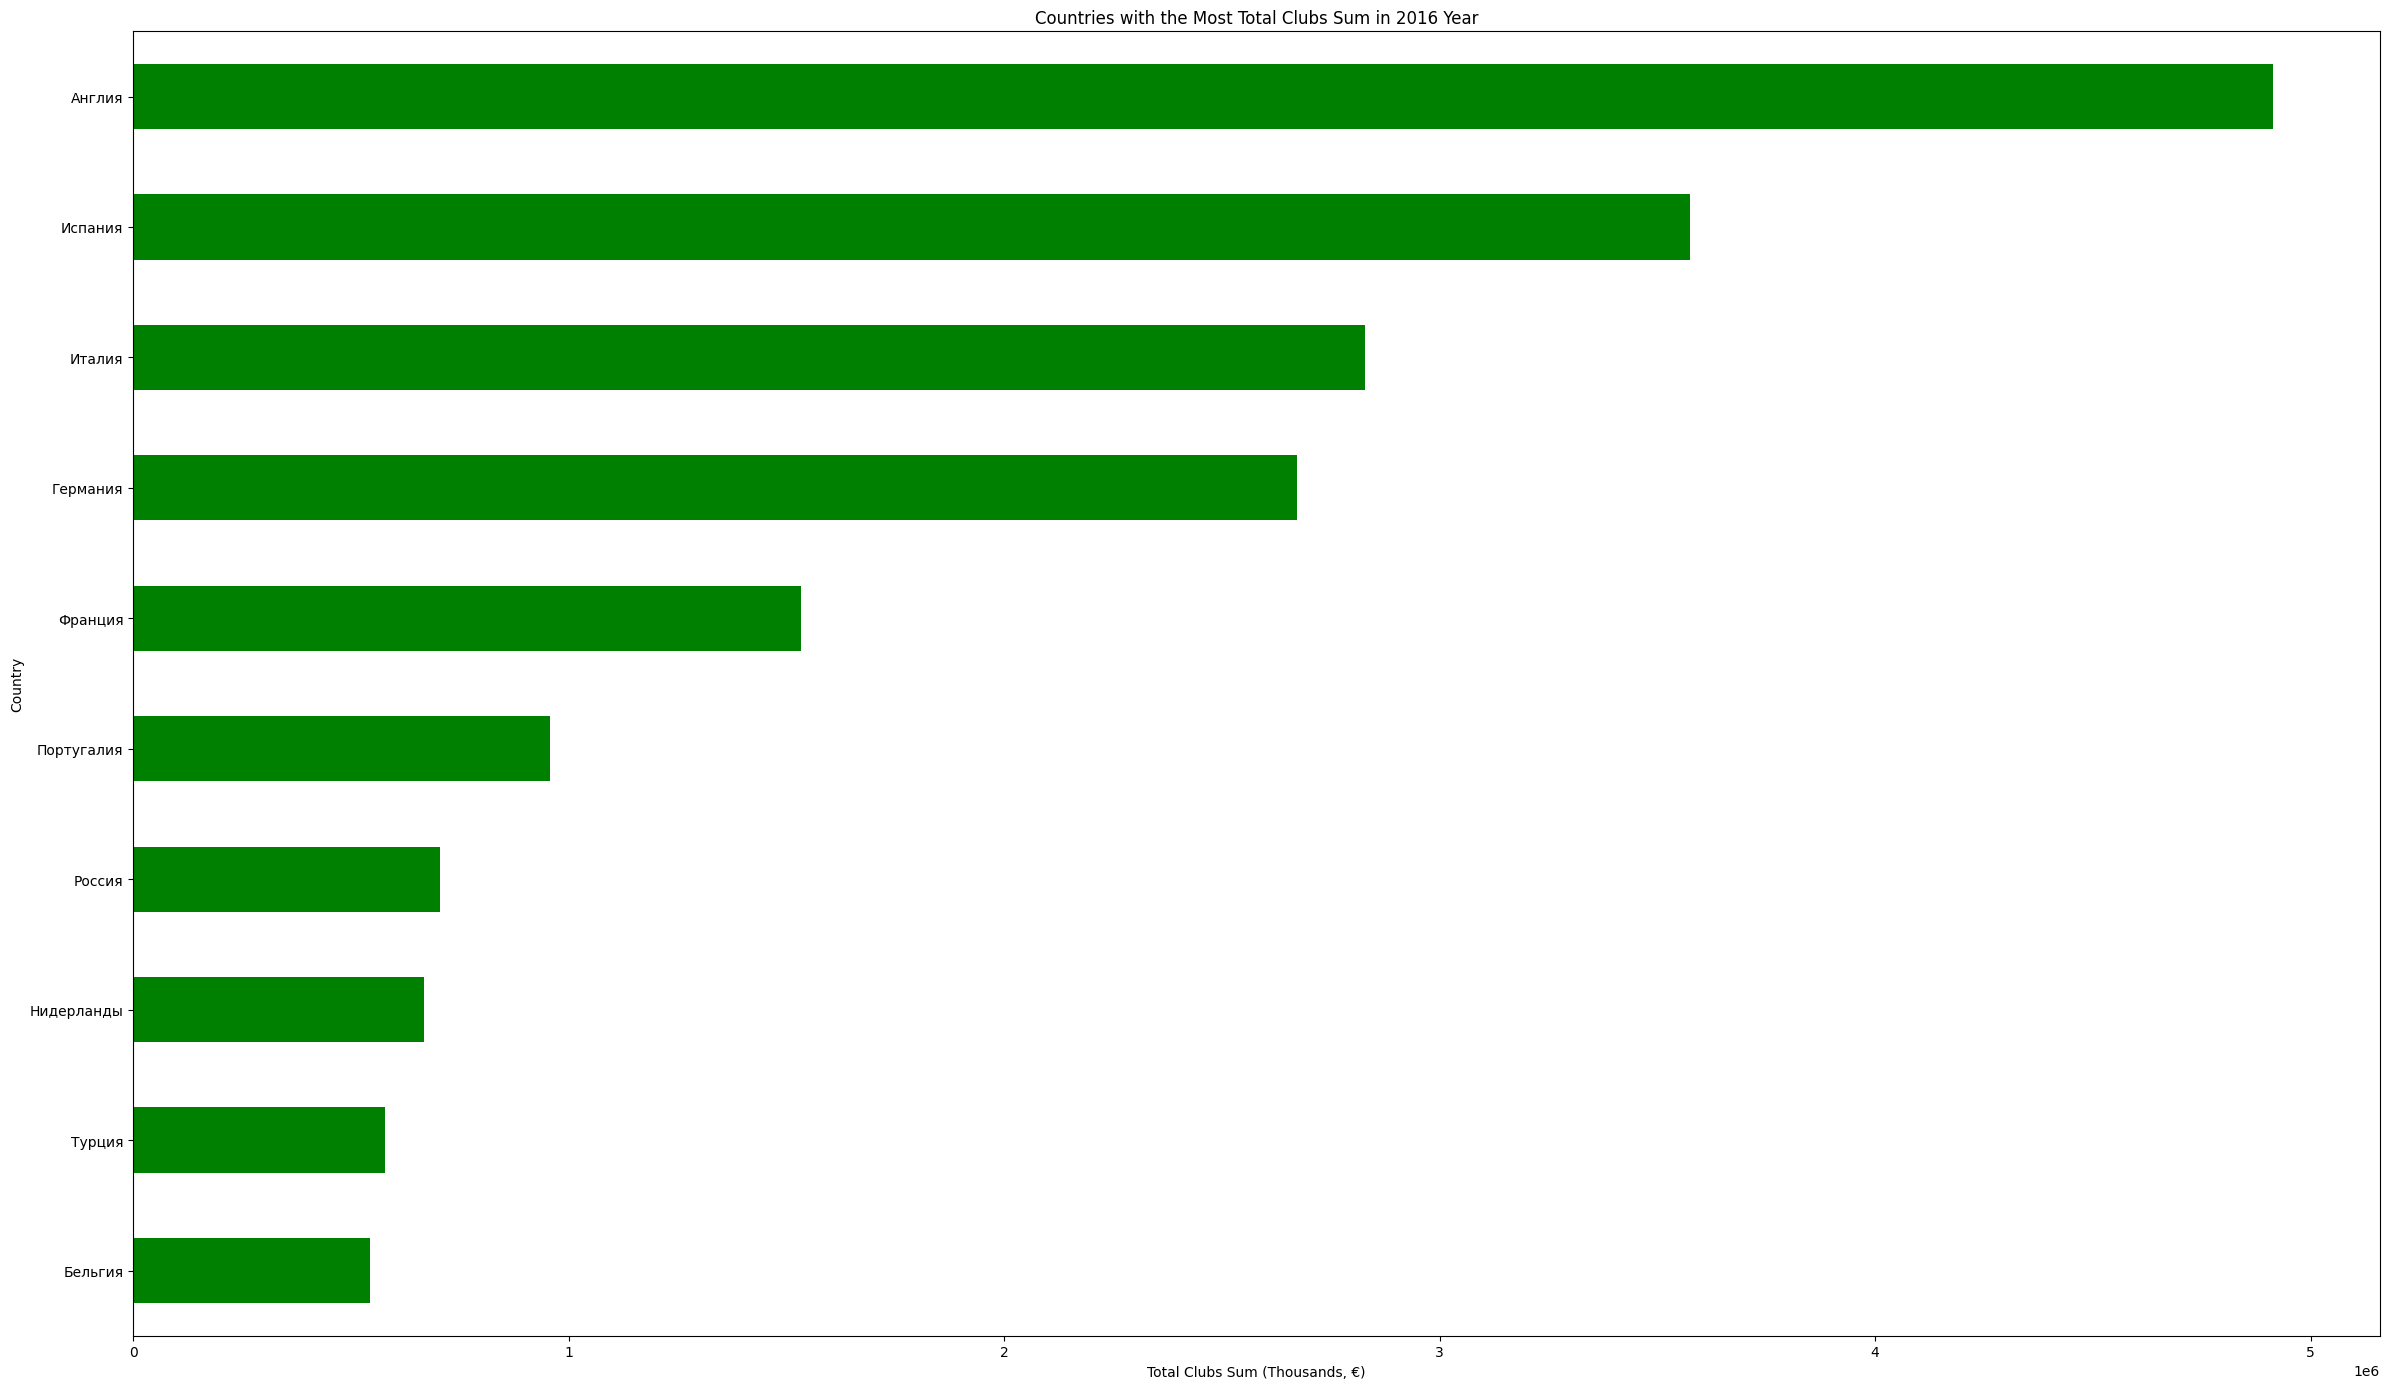

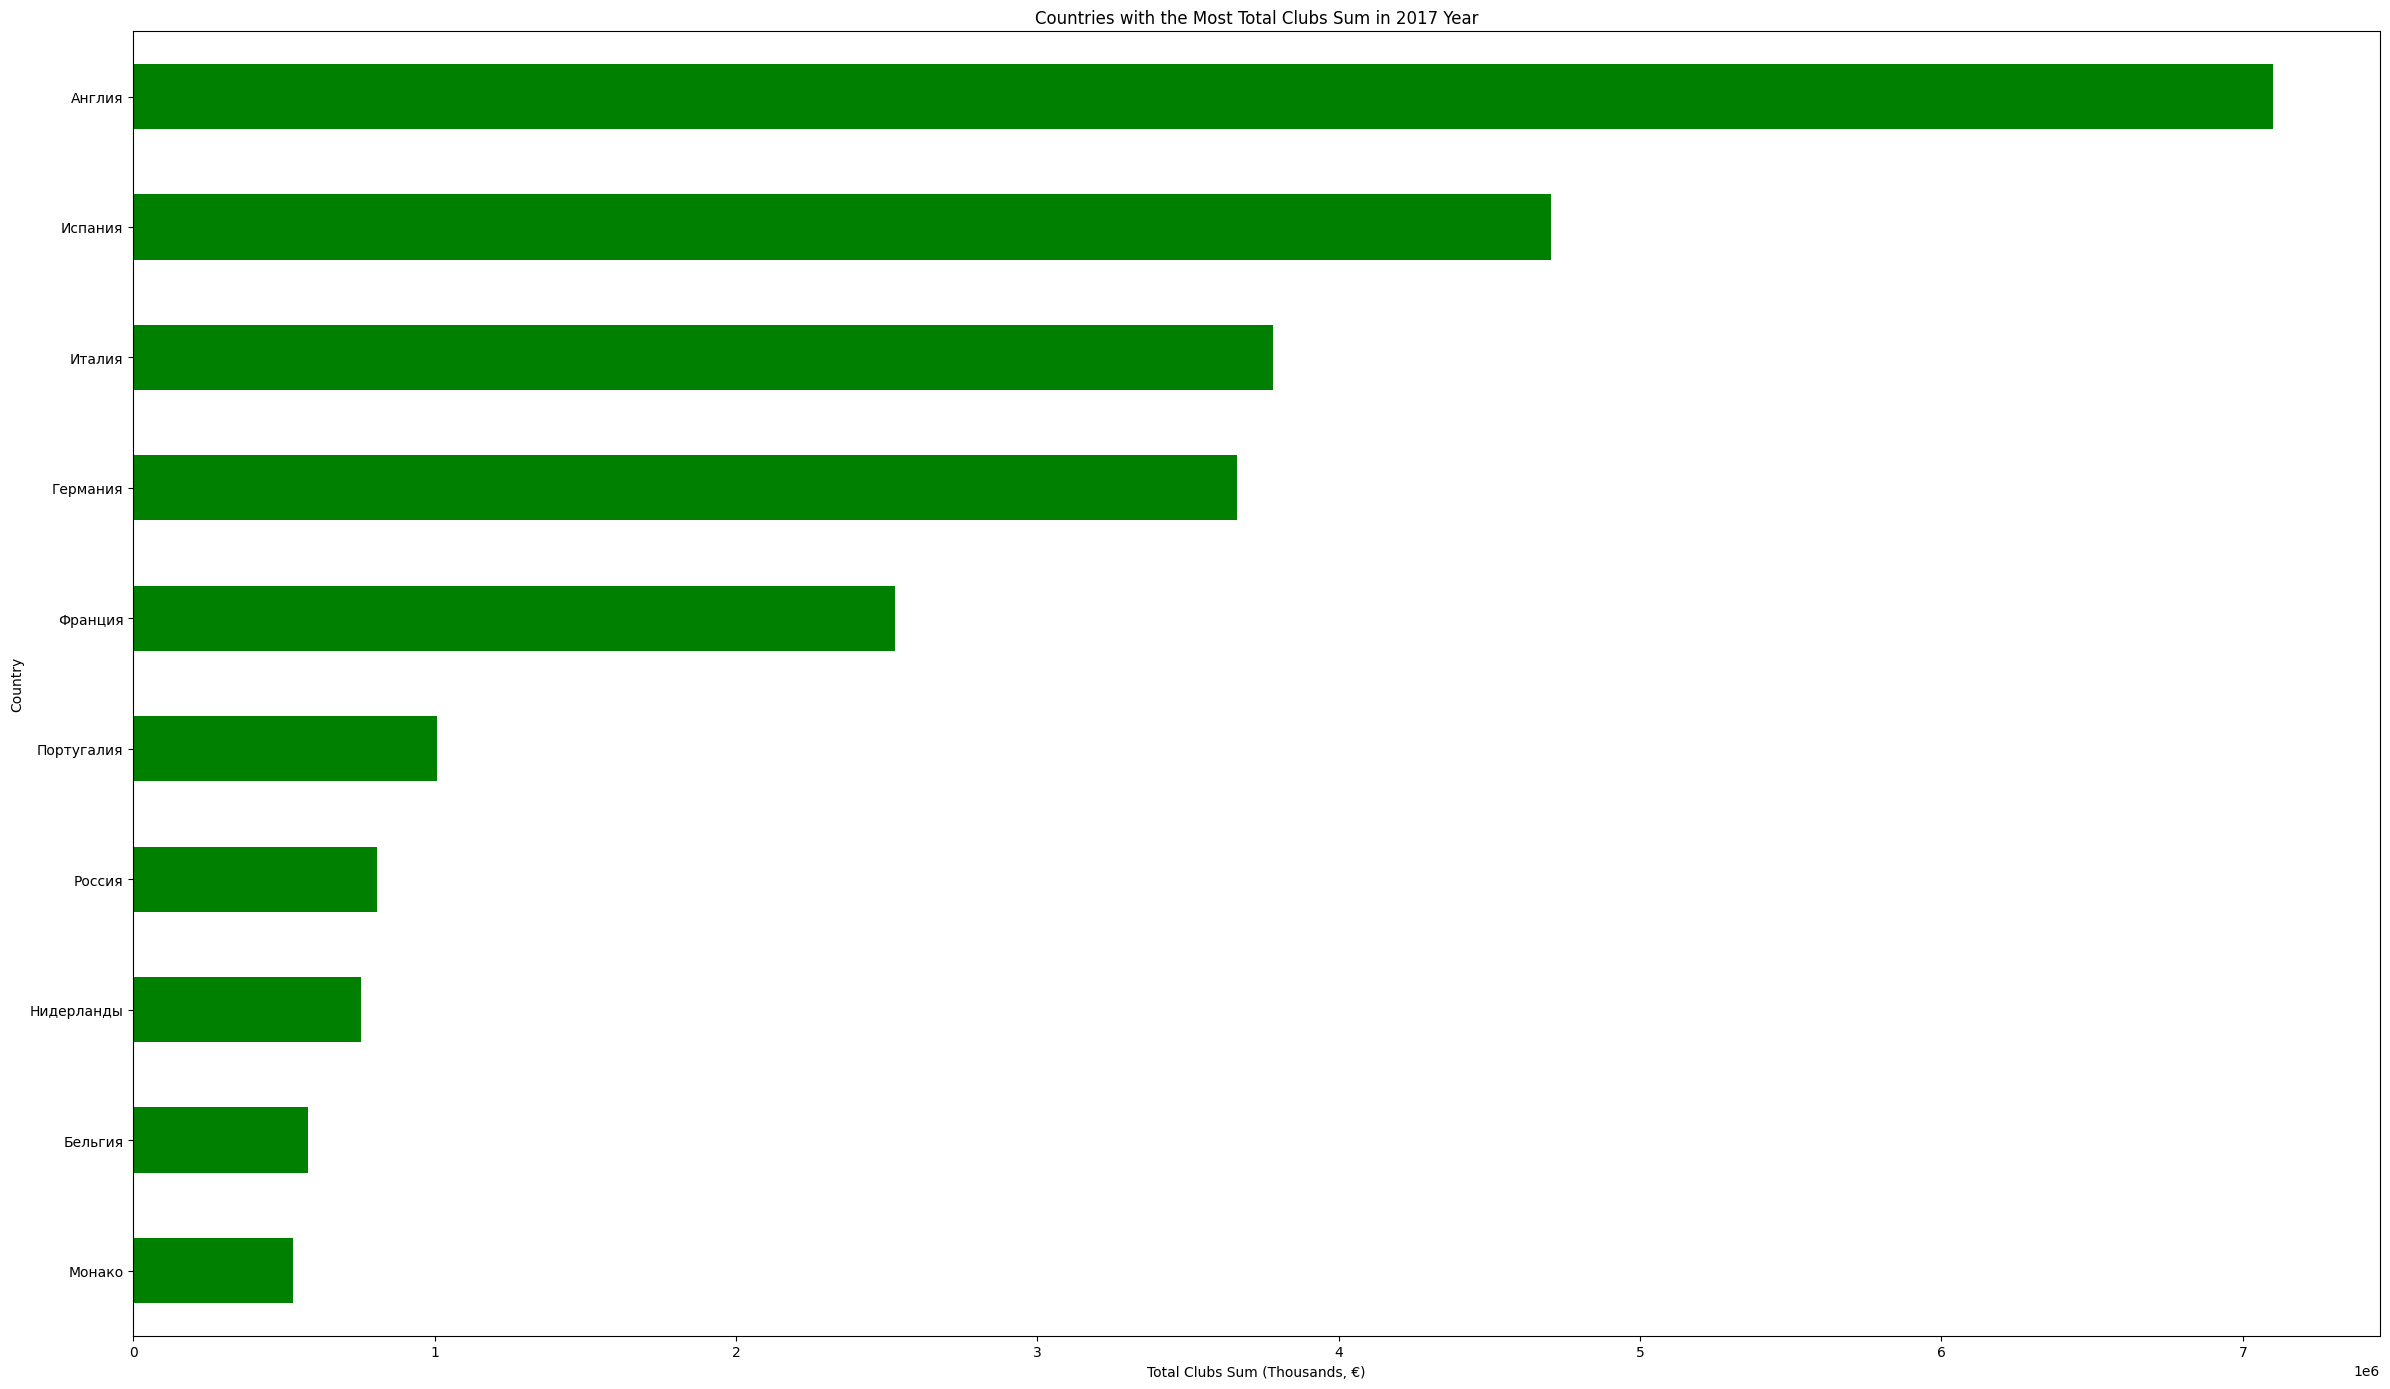

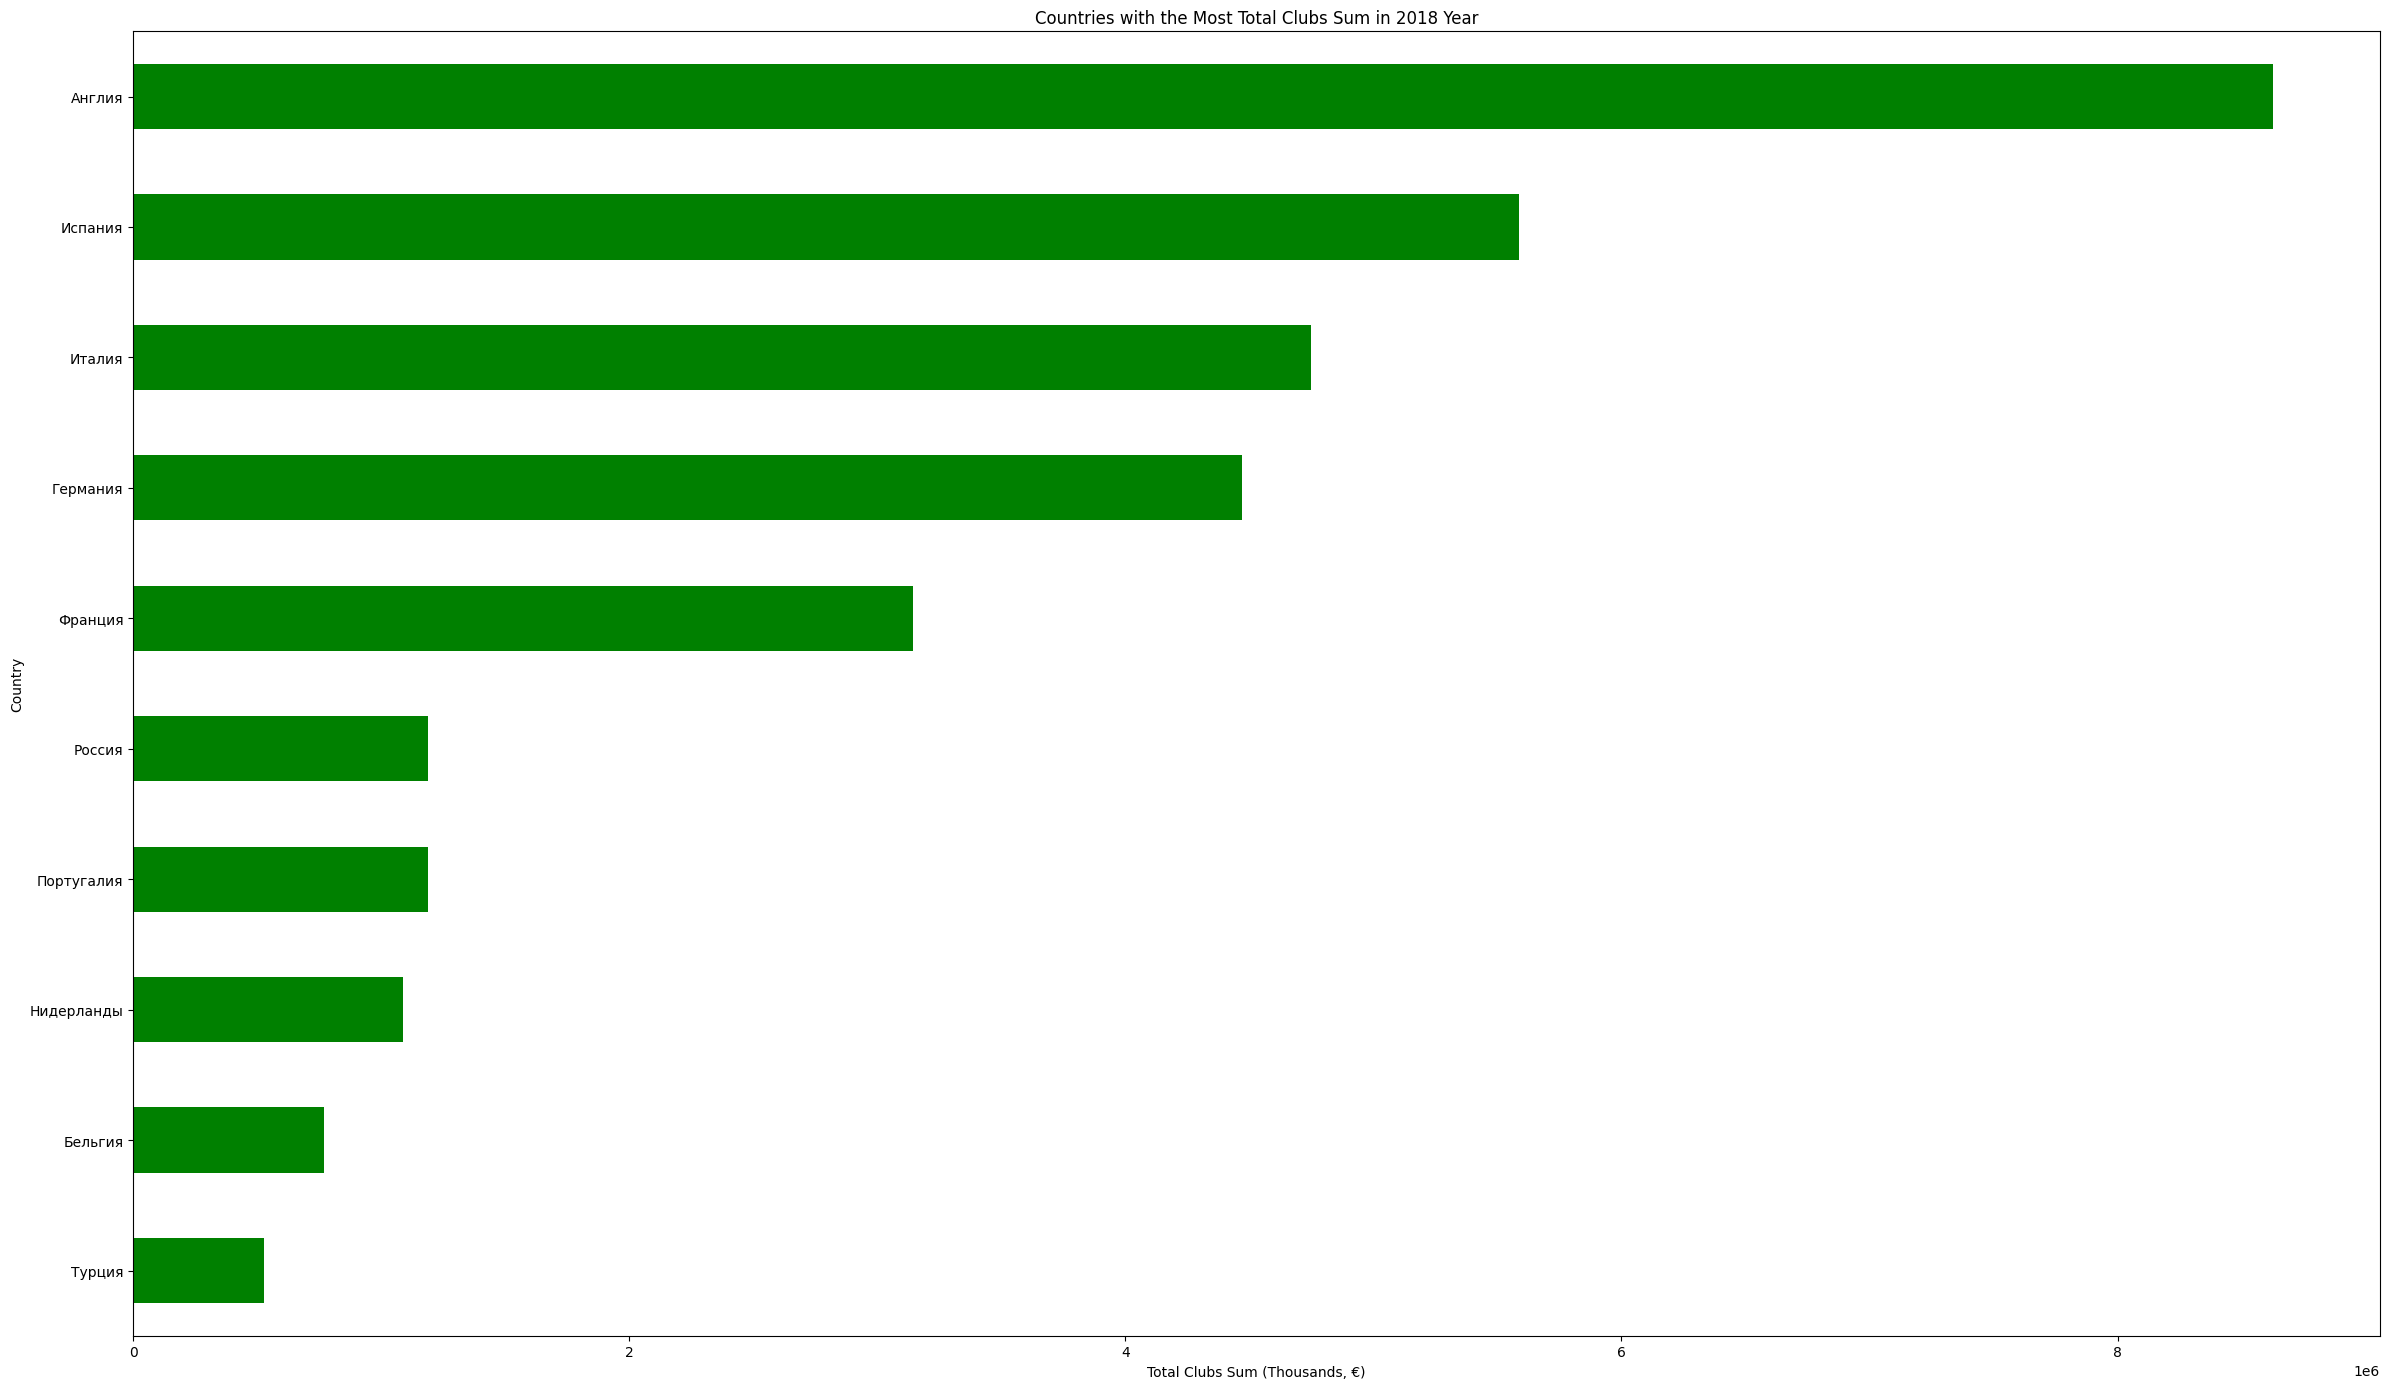

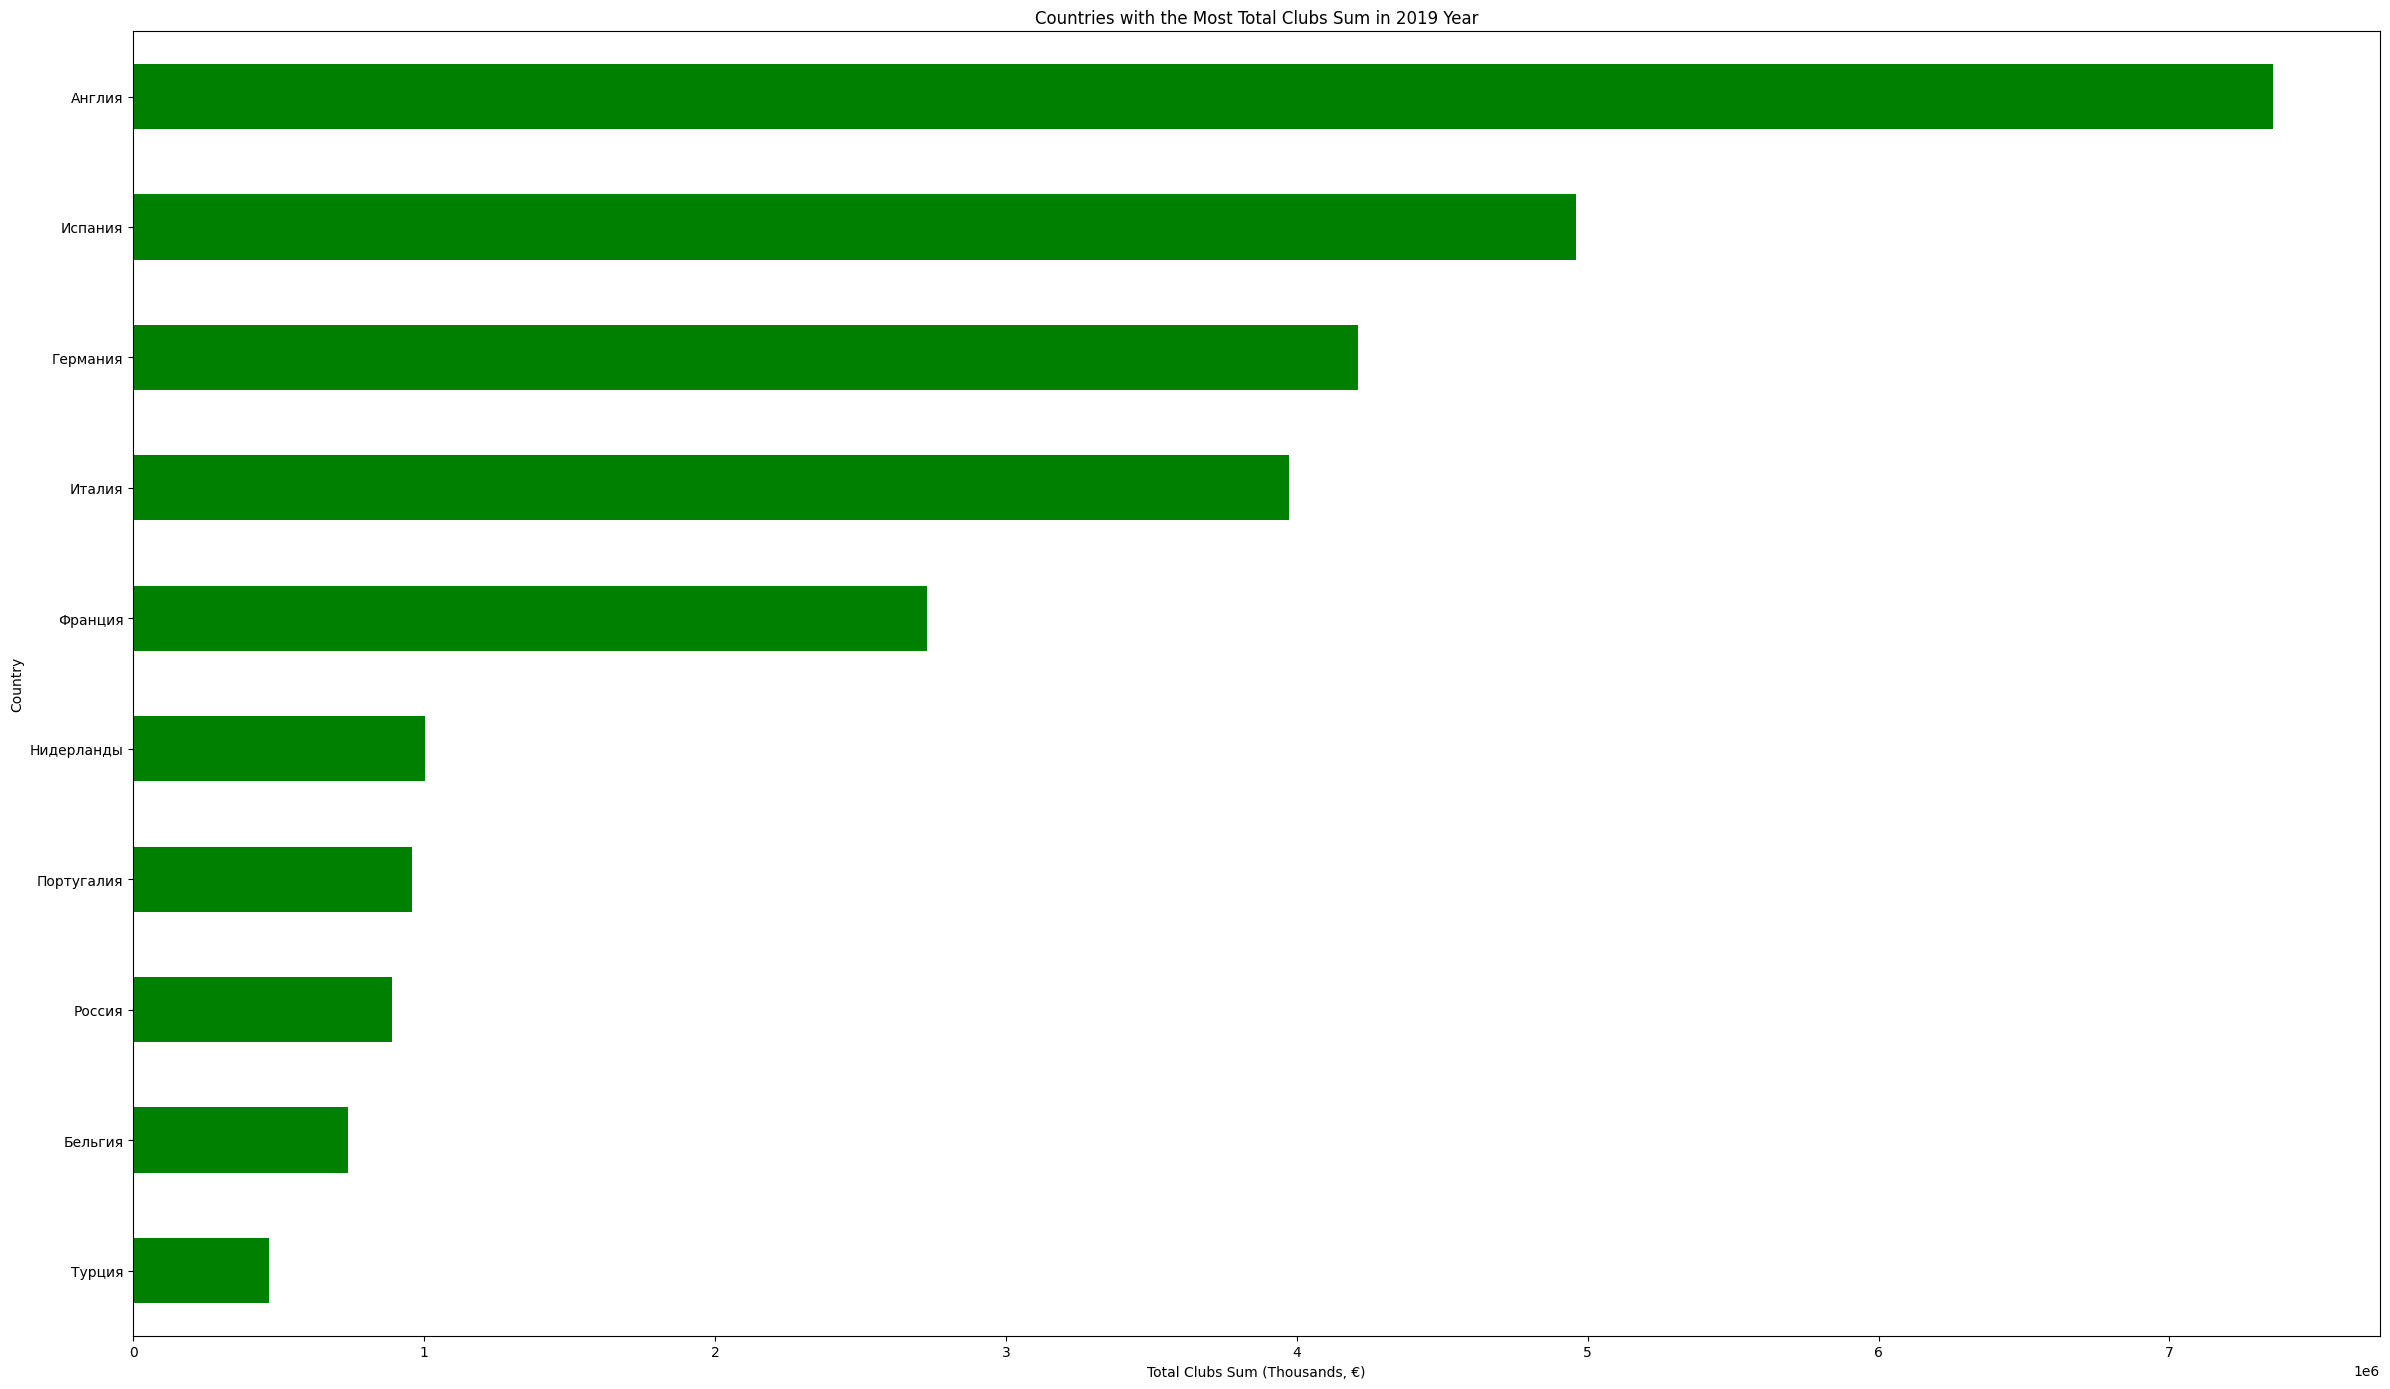

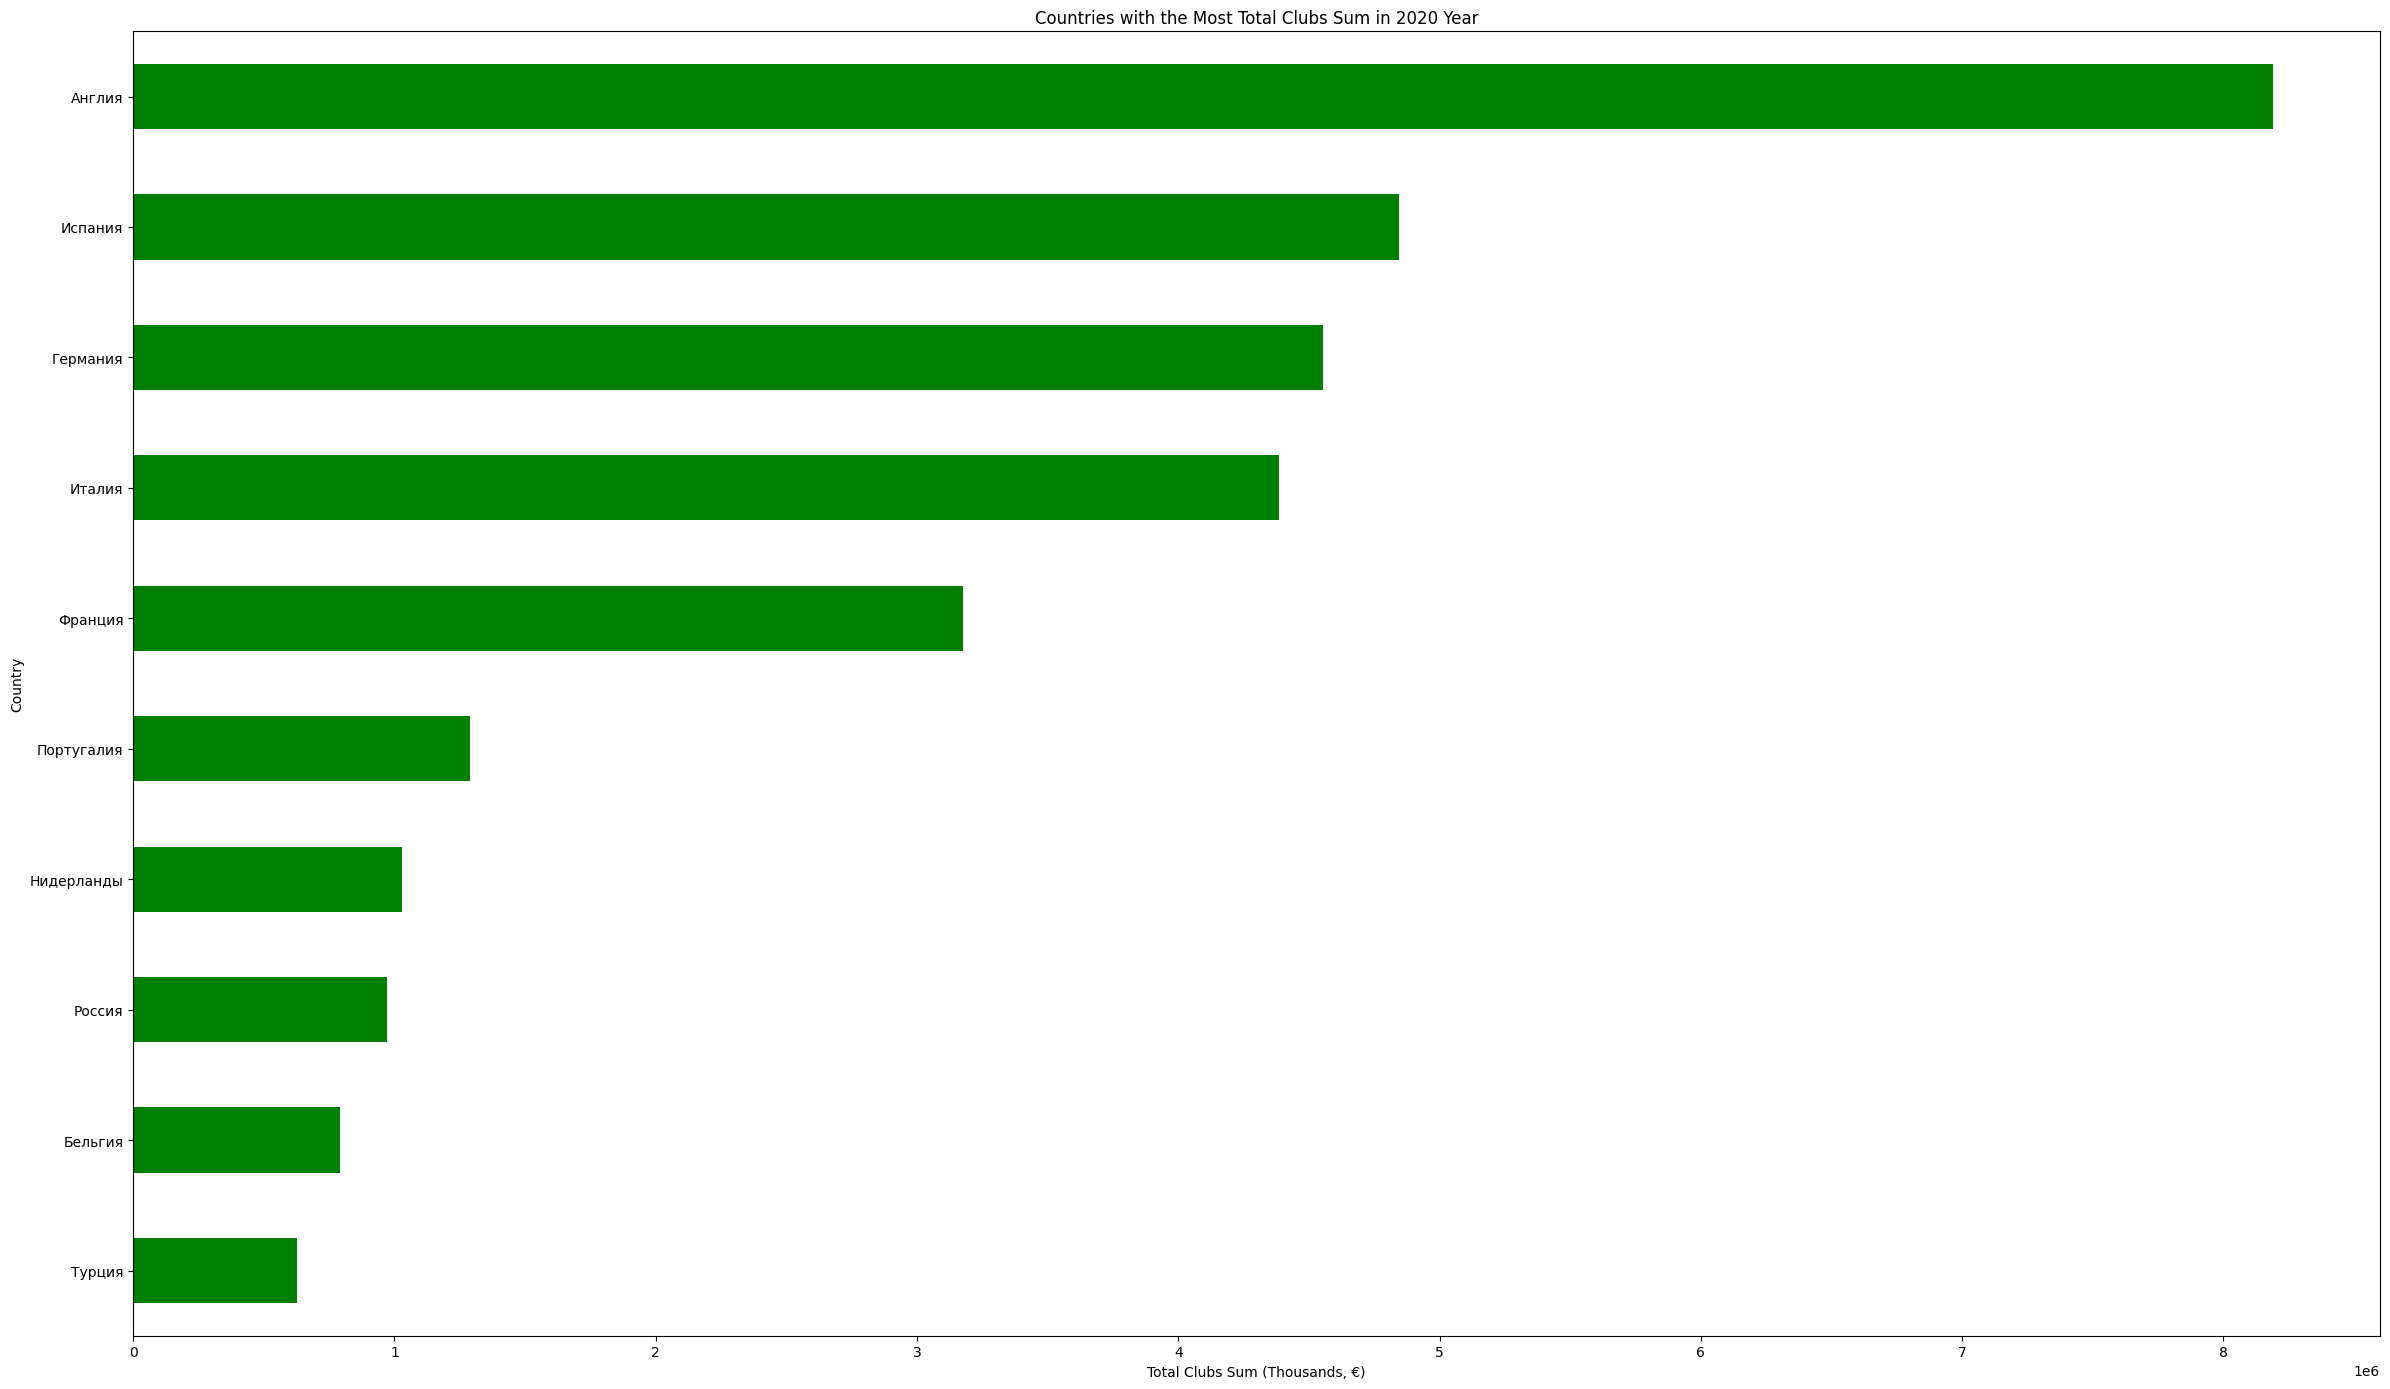

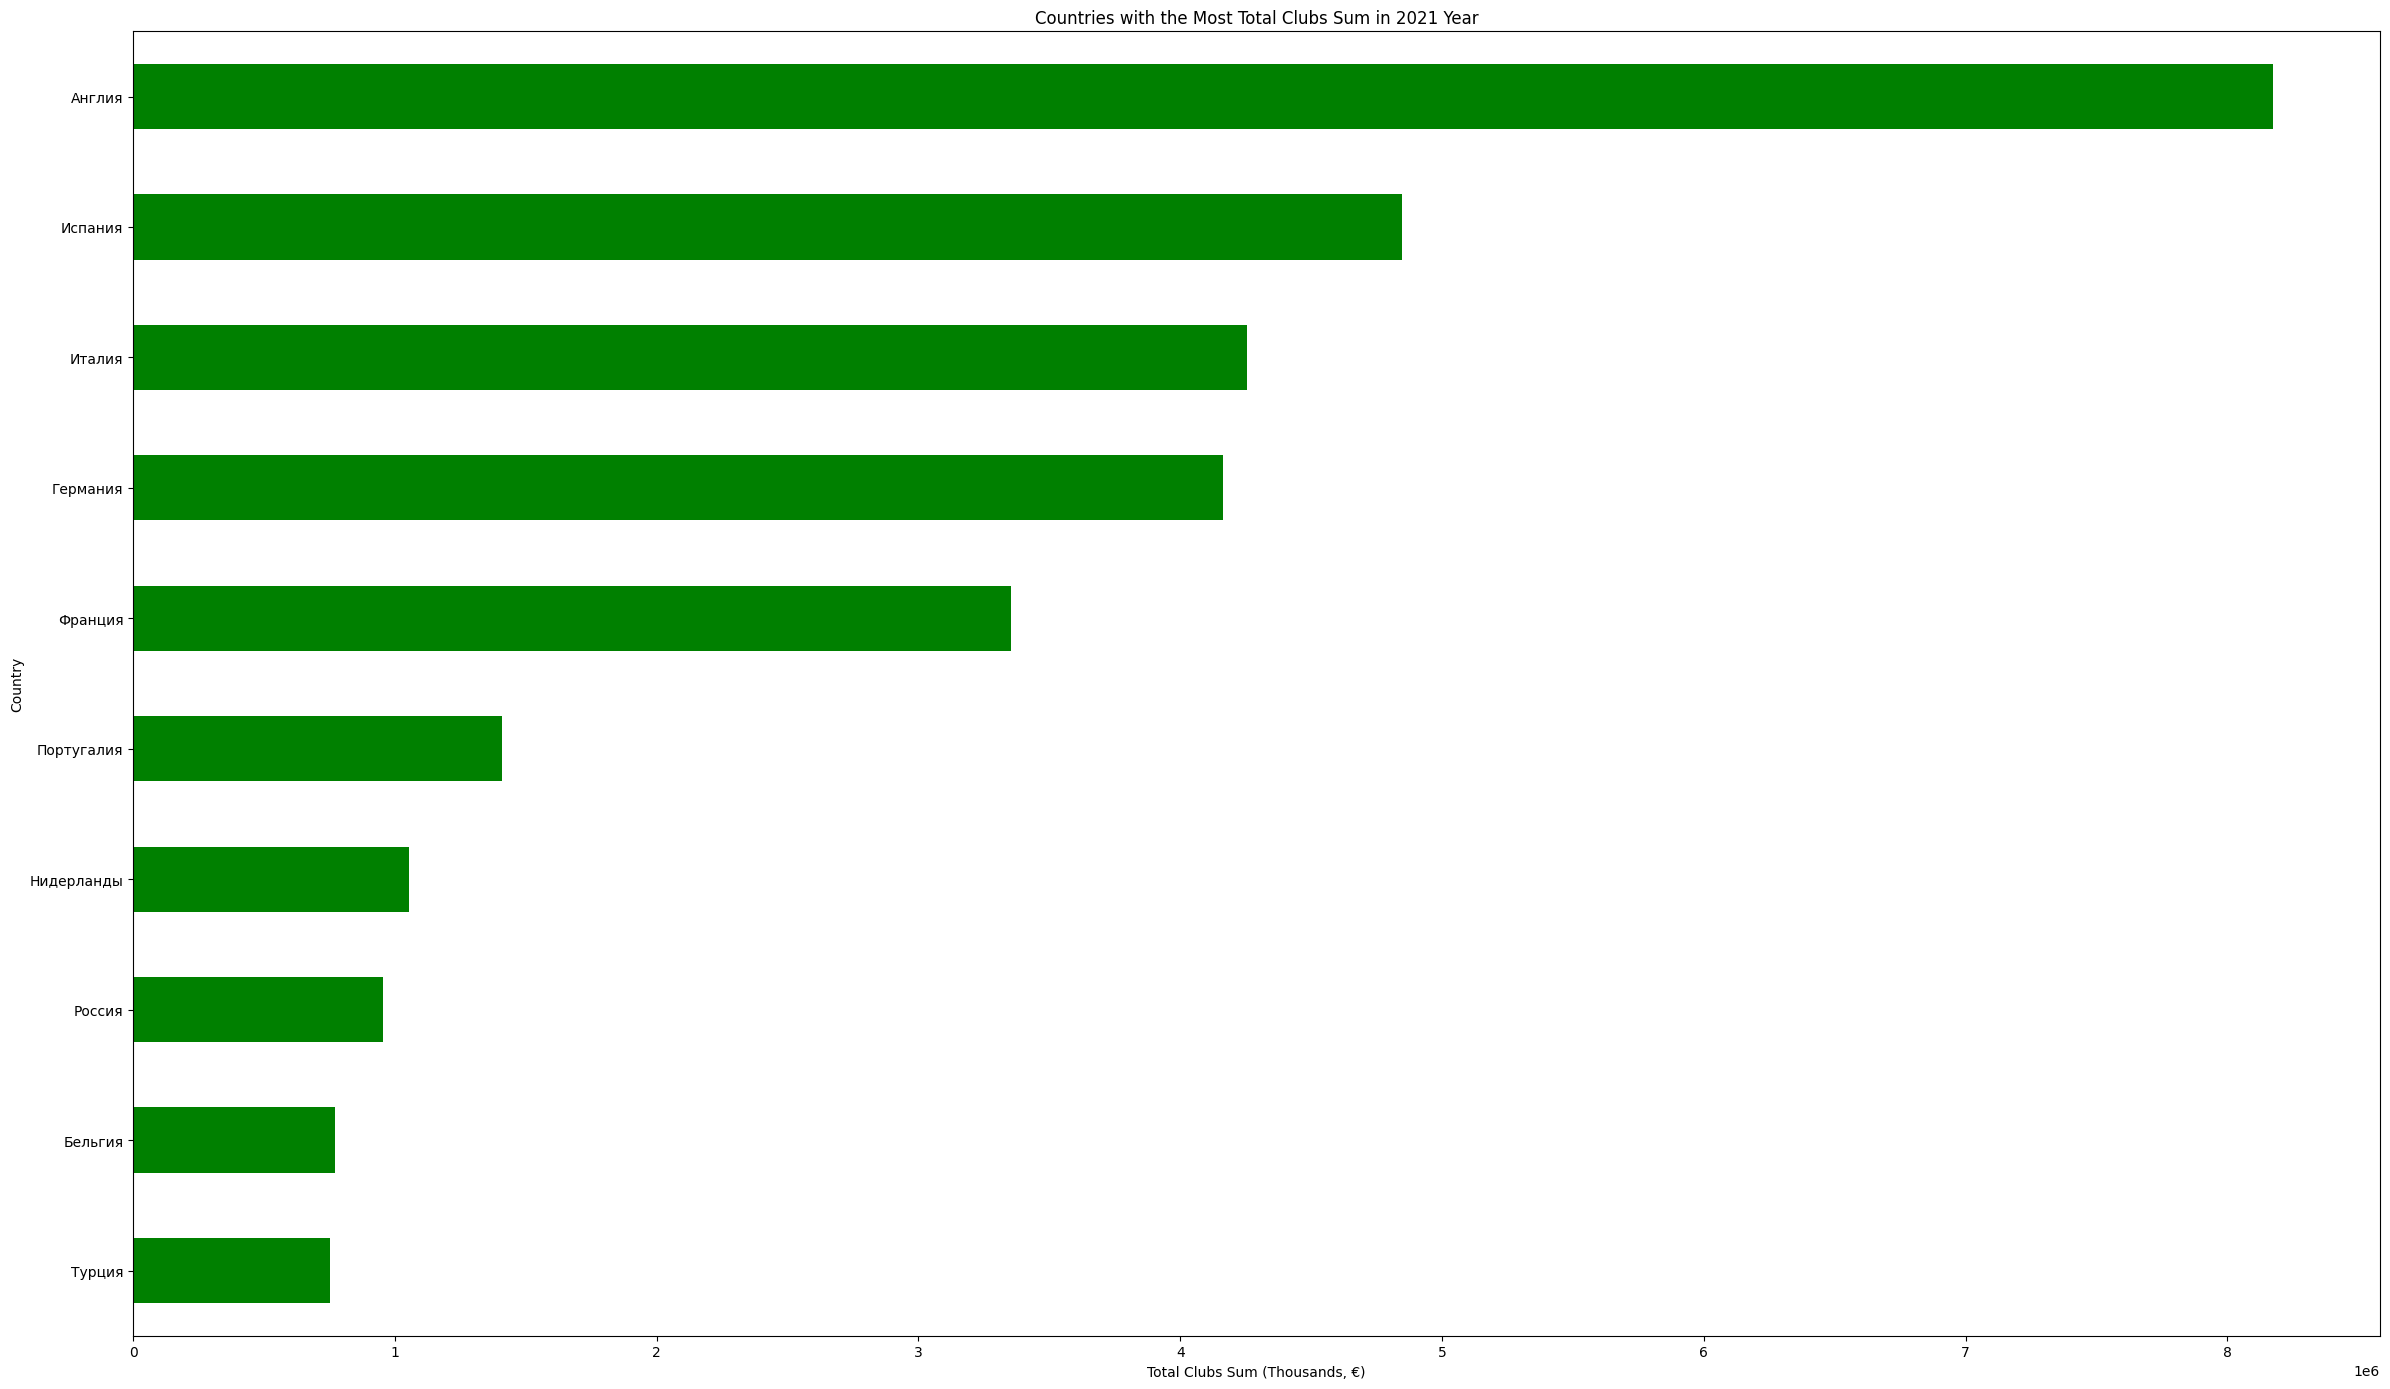

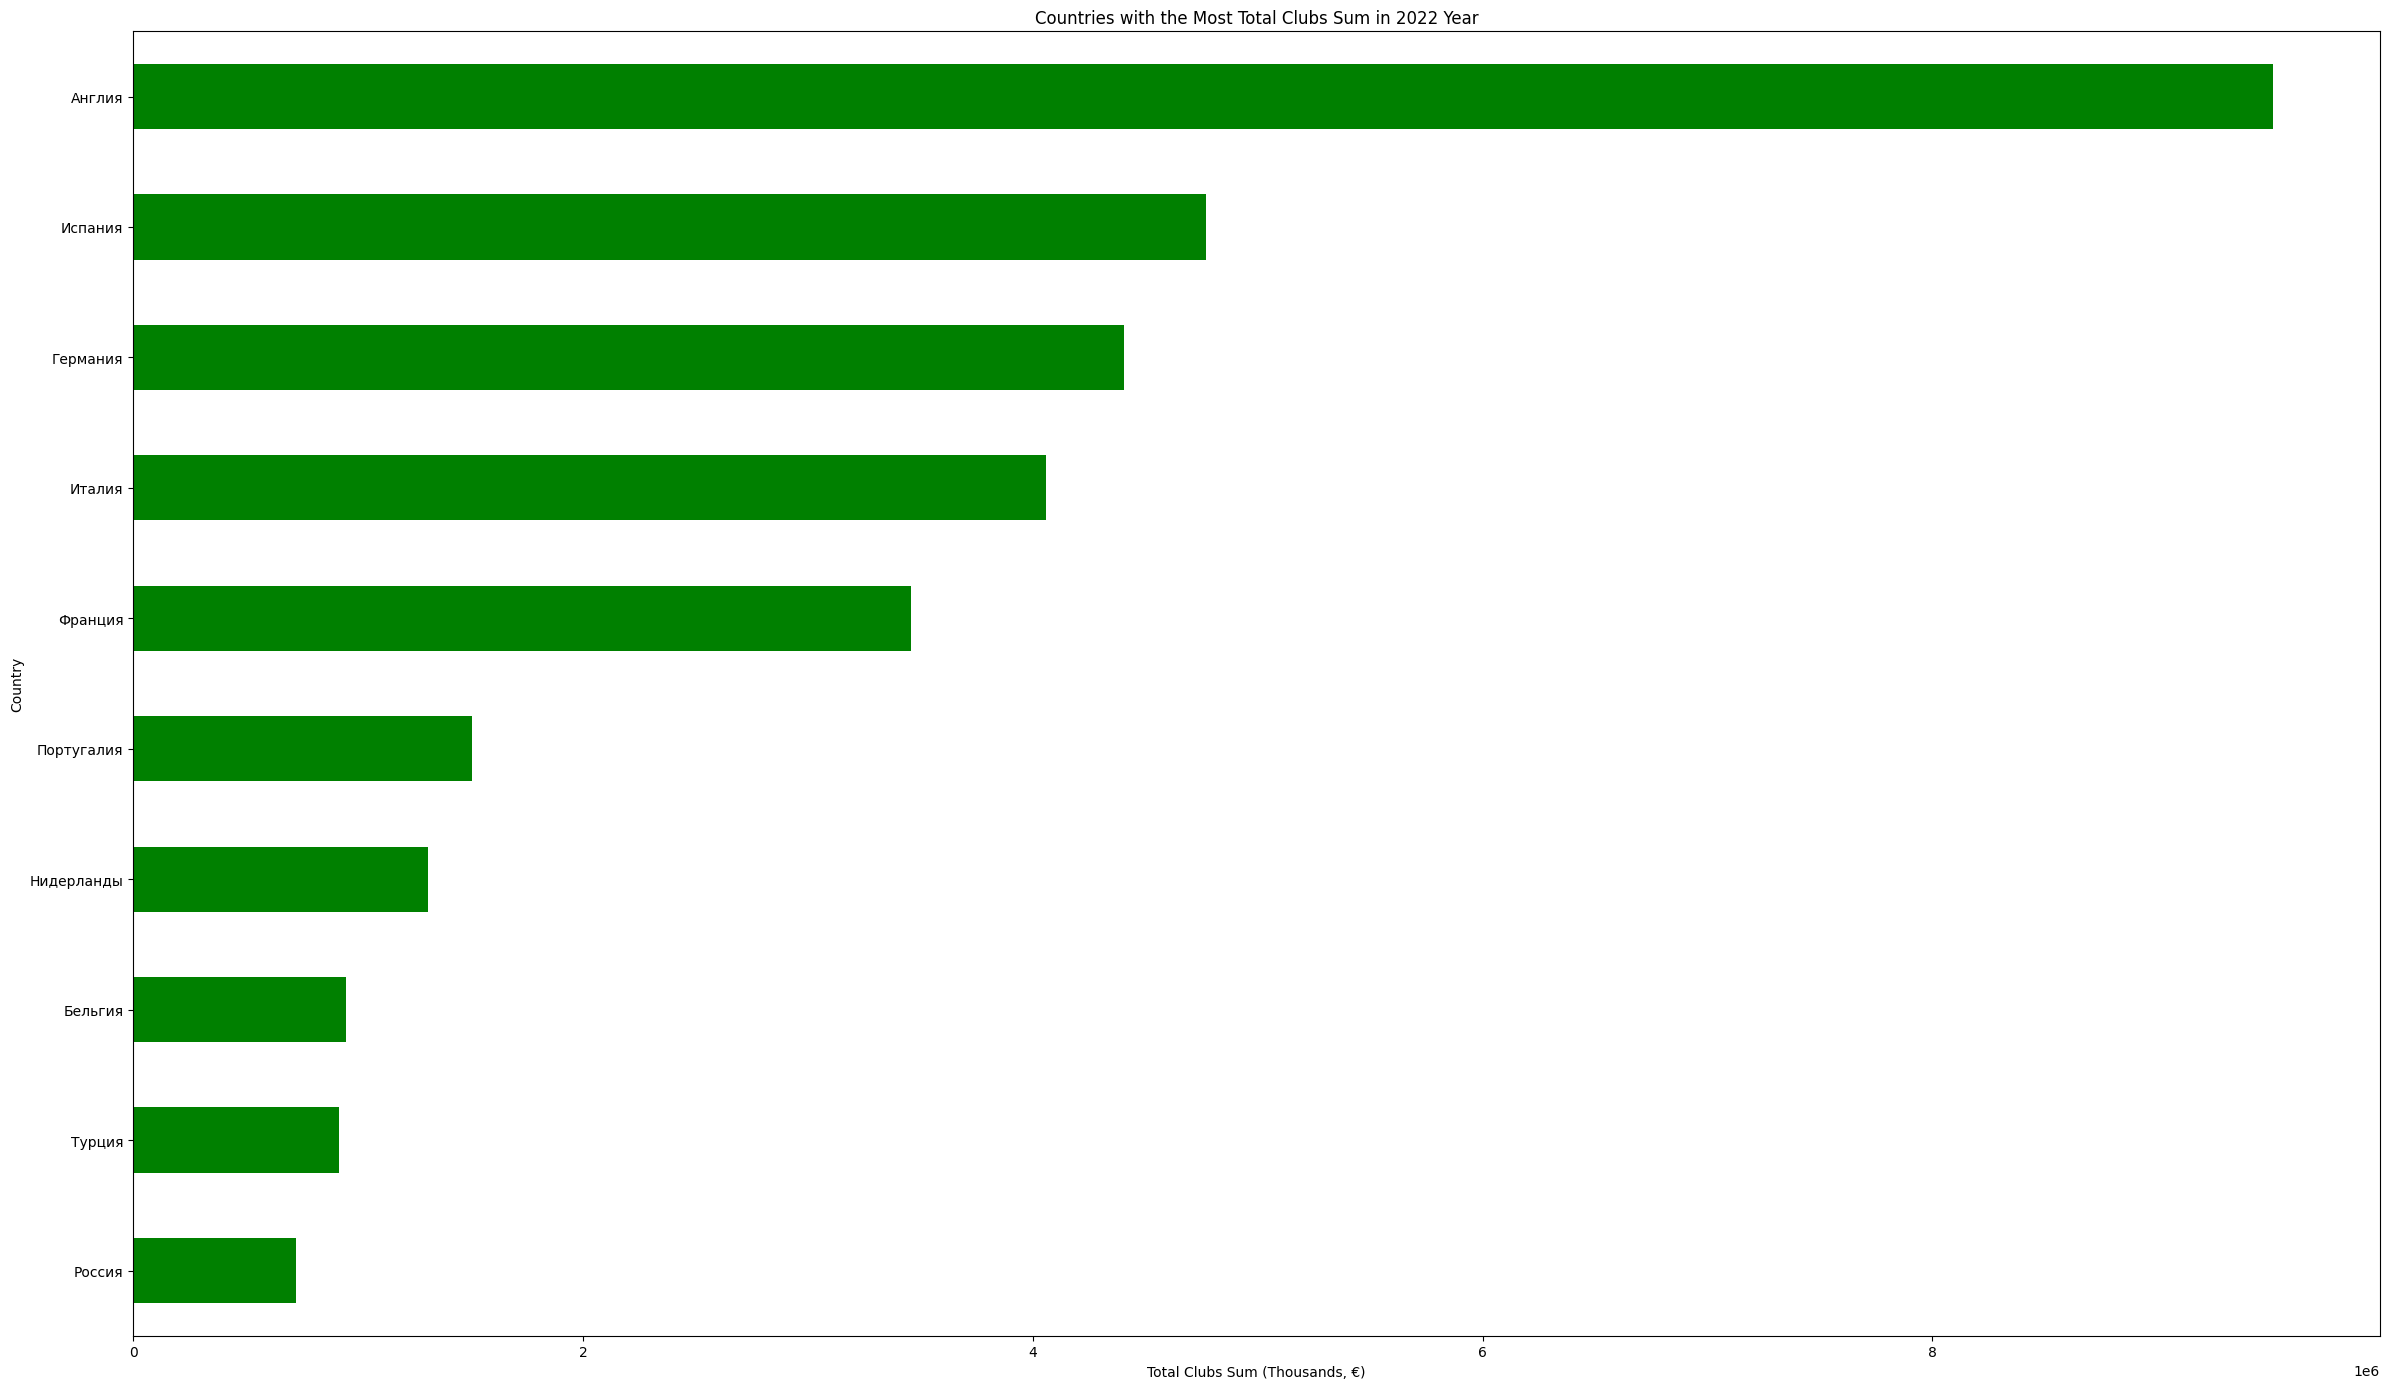

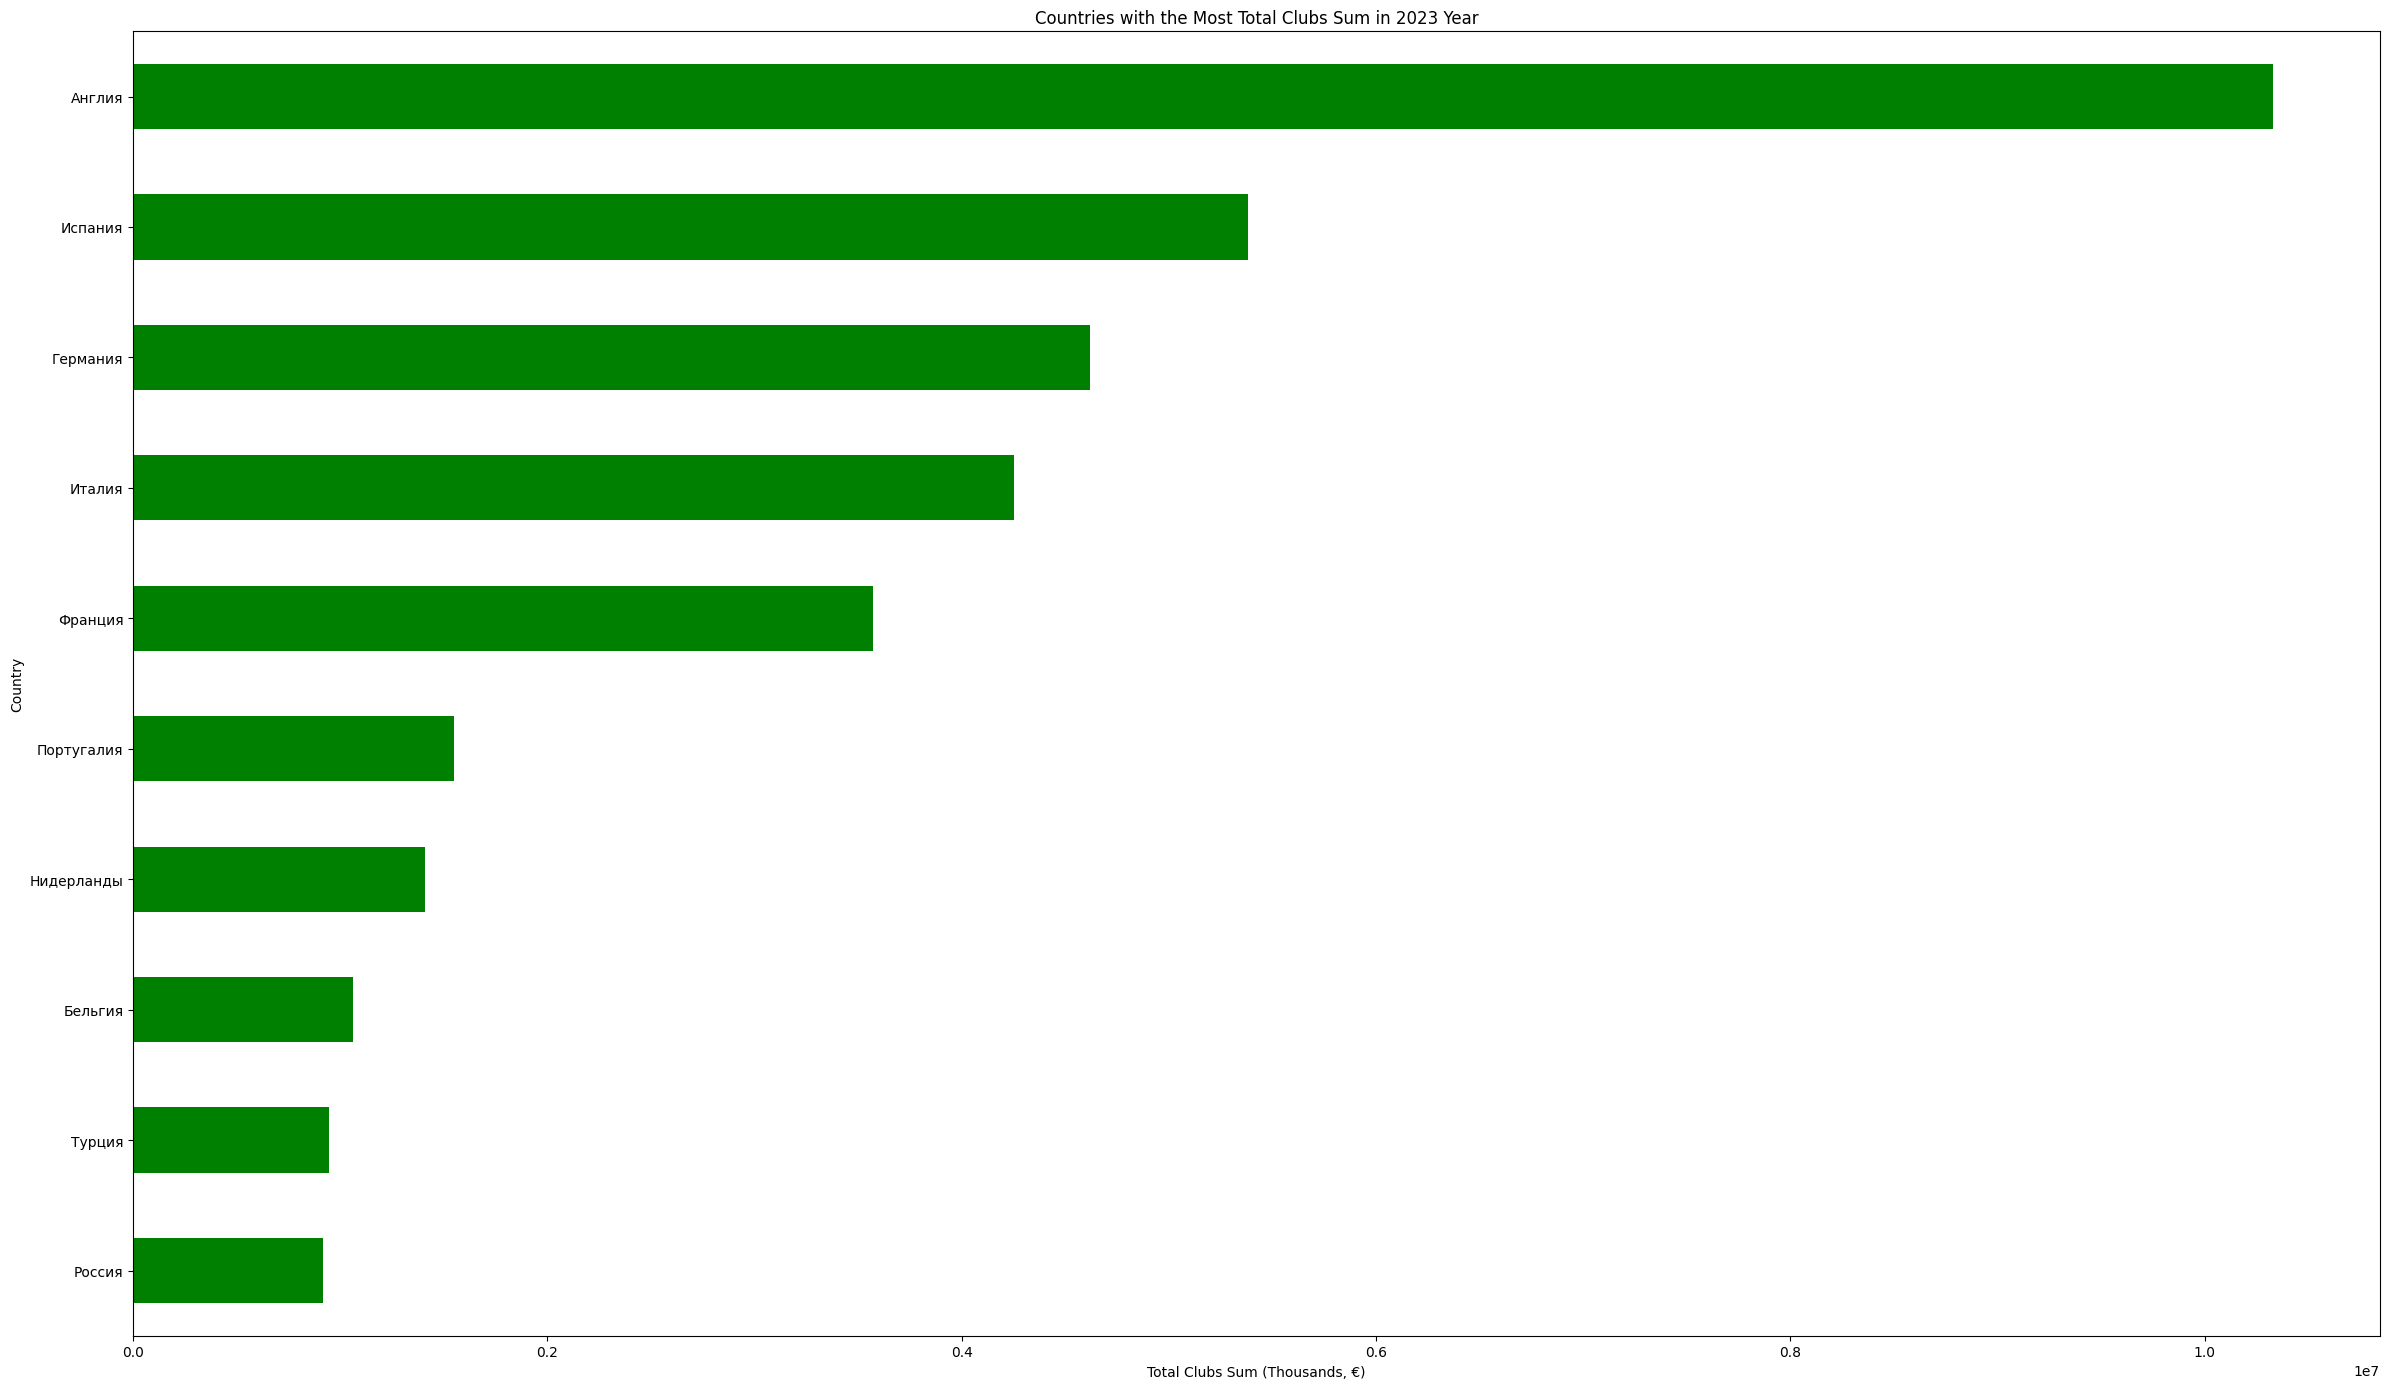

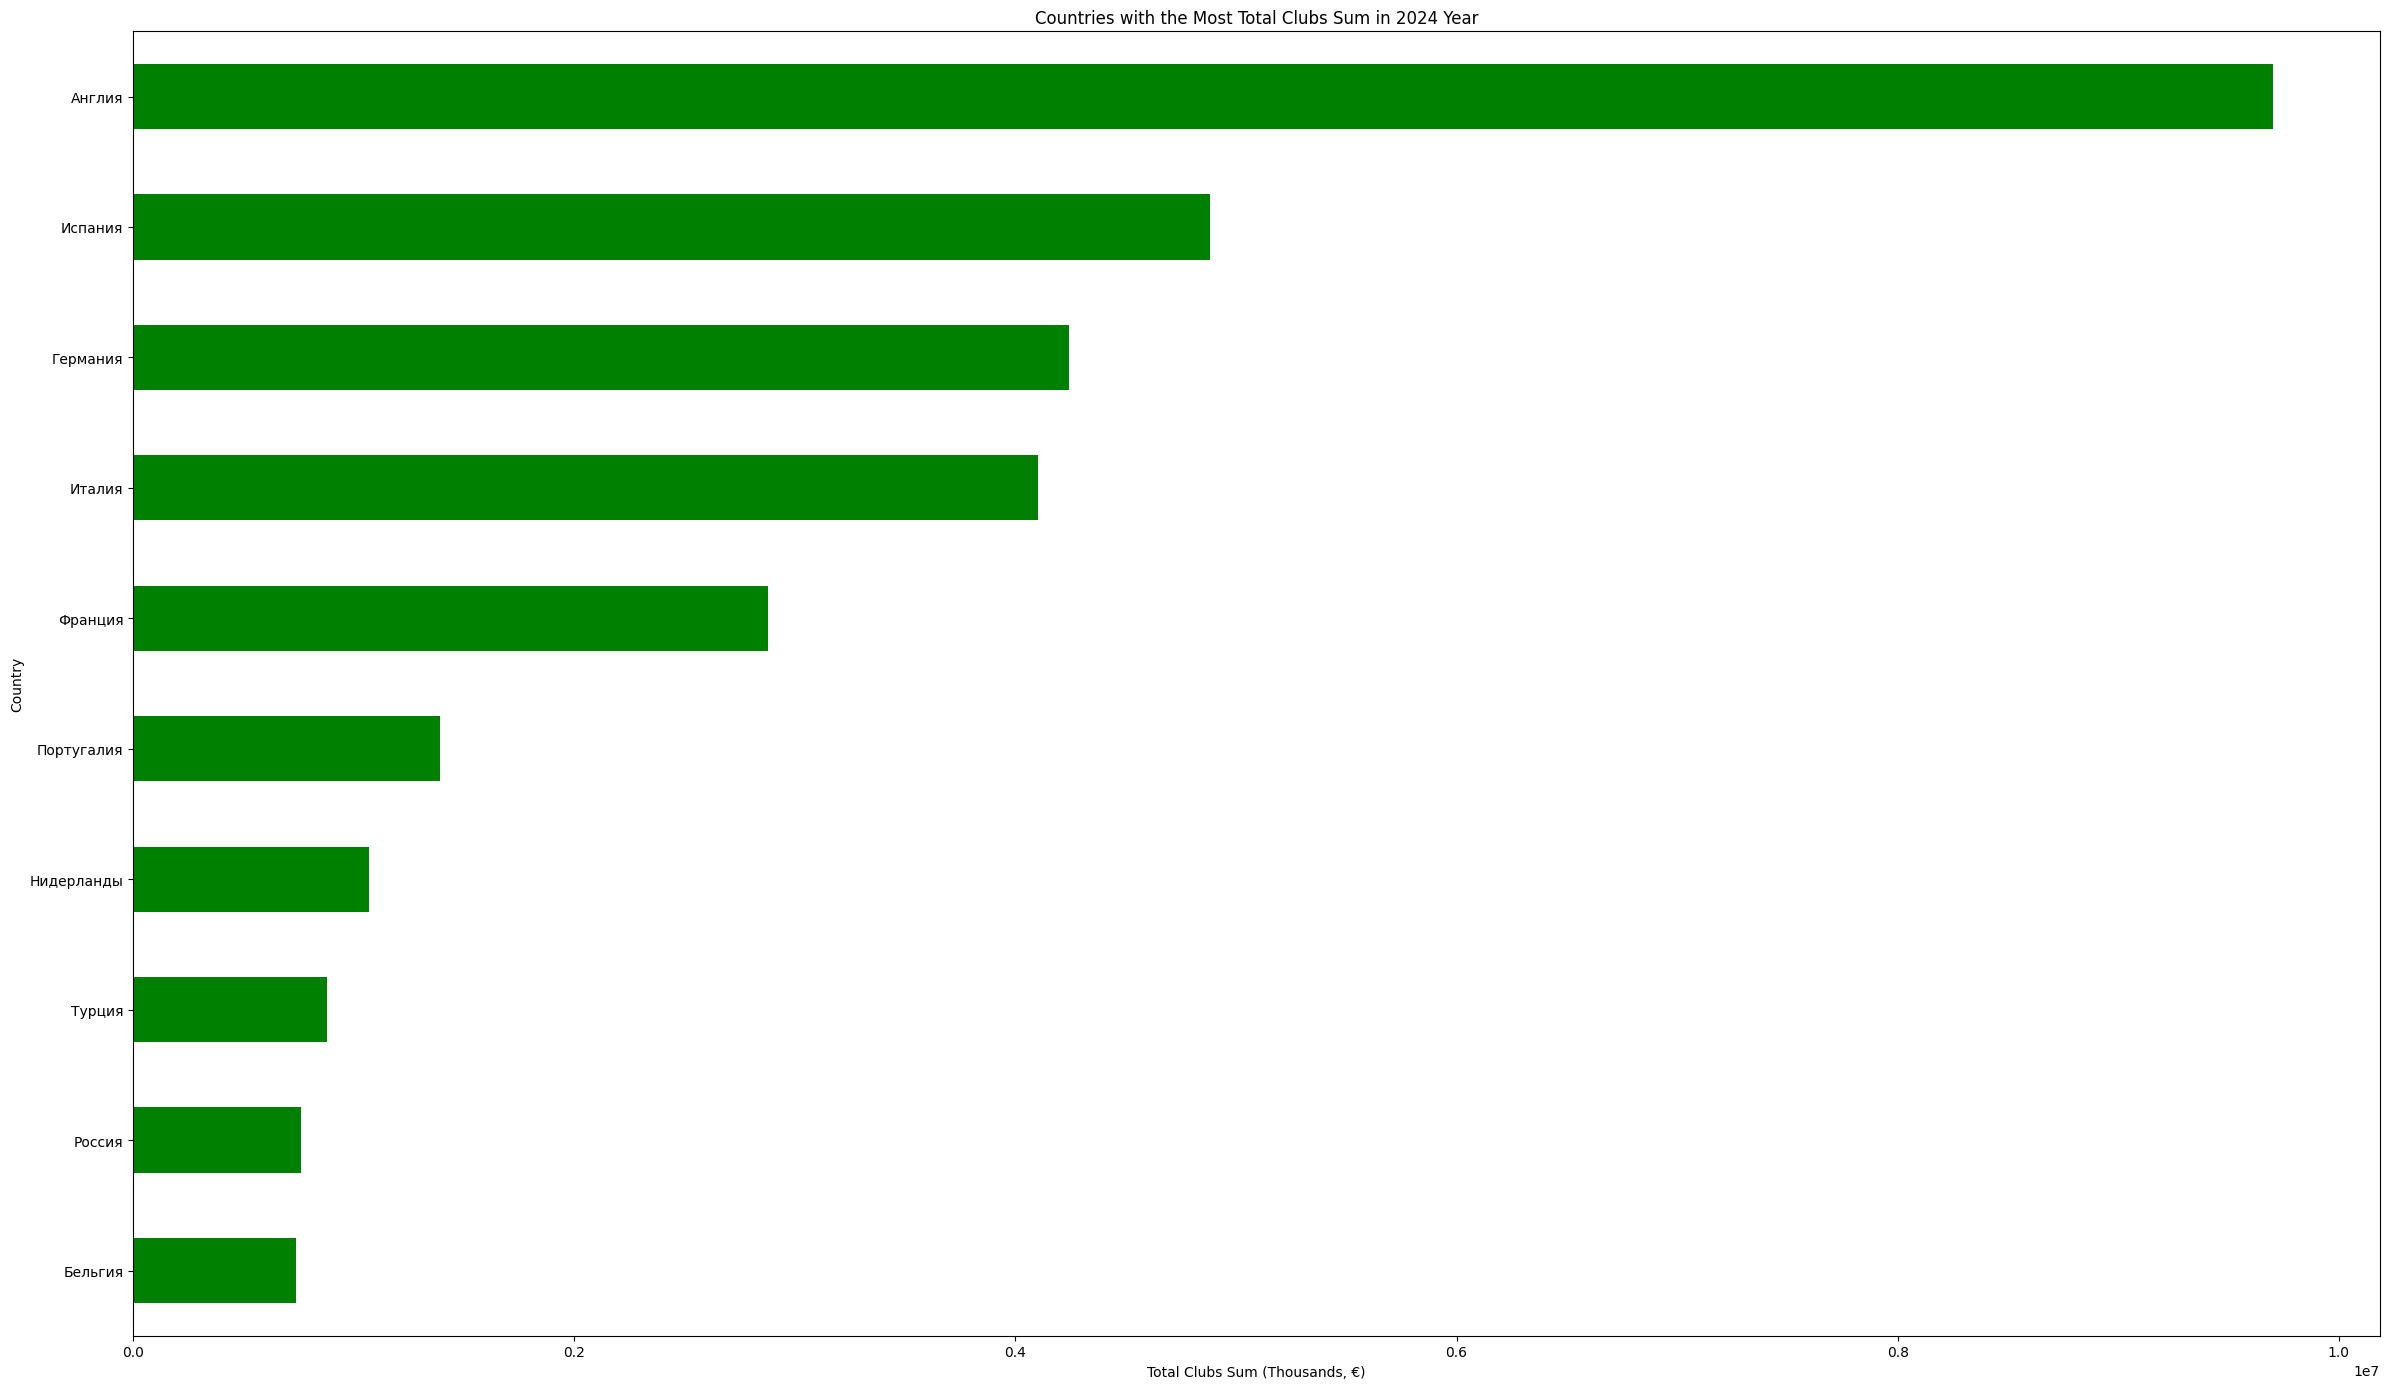

In [29]:
# Find countries with the most total clubs sum in every year
for year in complete_clubs_df["Year"].unique():
    plt.figure(figsize=(24, 14))
    complete_clubs_df.query(f"Year == {year}") \
                .groupby("Country_Name") \
                .agg({"TeamCost": "sum"}) \
                .sort_values("TeamCost", ascending=True) \
                .tail(10) \
                .plot(kind="barh", y="TeamCost", color="green", legend=False, ax=plt.gca())
    plt.title(f"Countries with the Most Total Clubs Sum in {year} Year")
    plt.xlabel("Total Clubs Sum (Thousands, €)")
    plt.ylabel("Country")
    plt.tight_layout()
    None

interactive(children=(Dropdown(description='year', options=(np.int64(2014), np.int64(2015), np.int64(2016), np…

<function __main__.plot(year)>

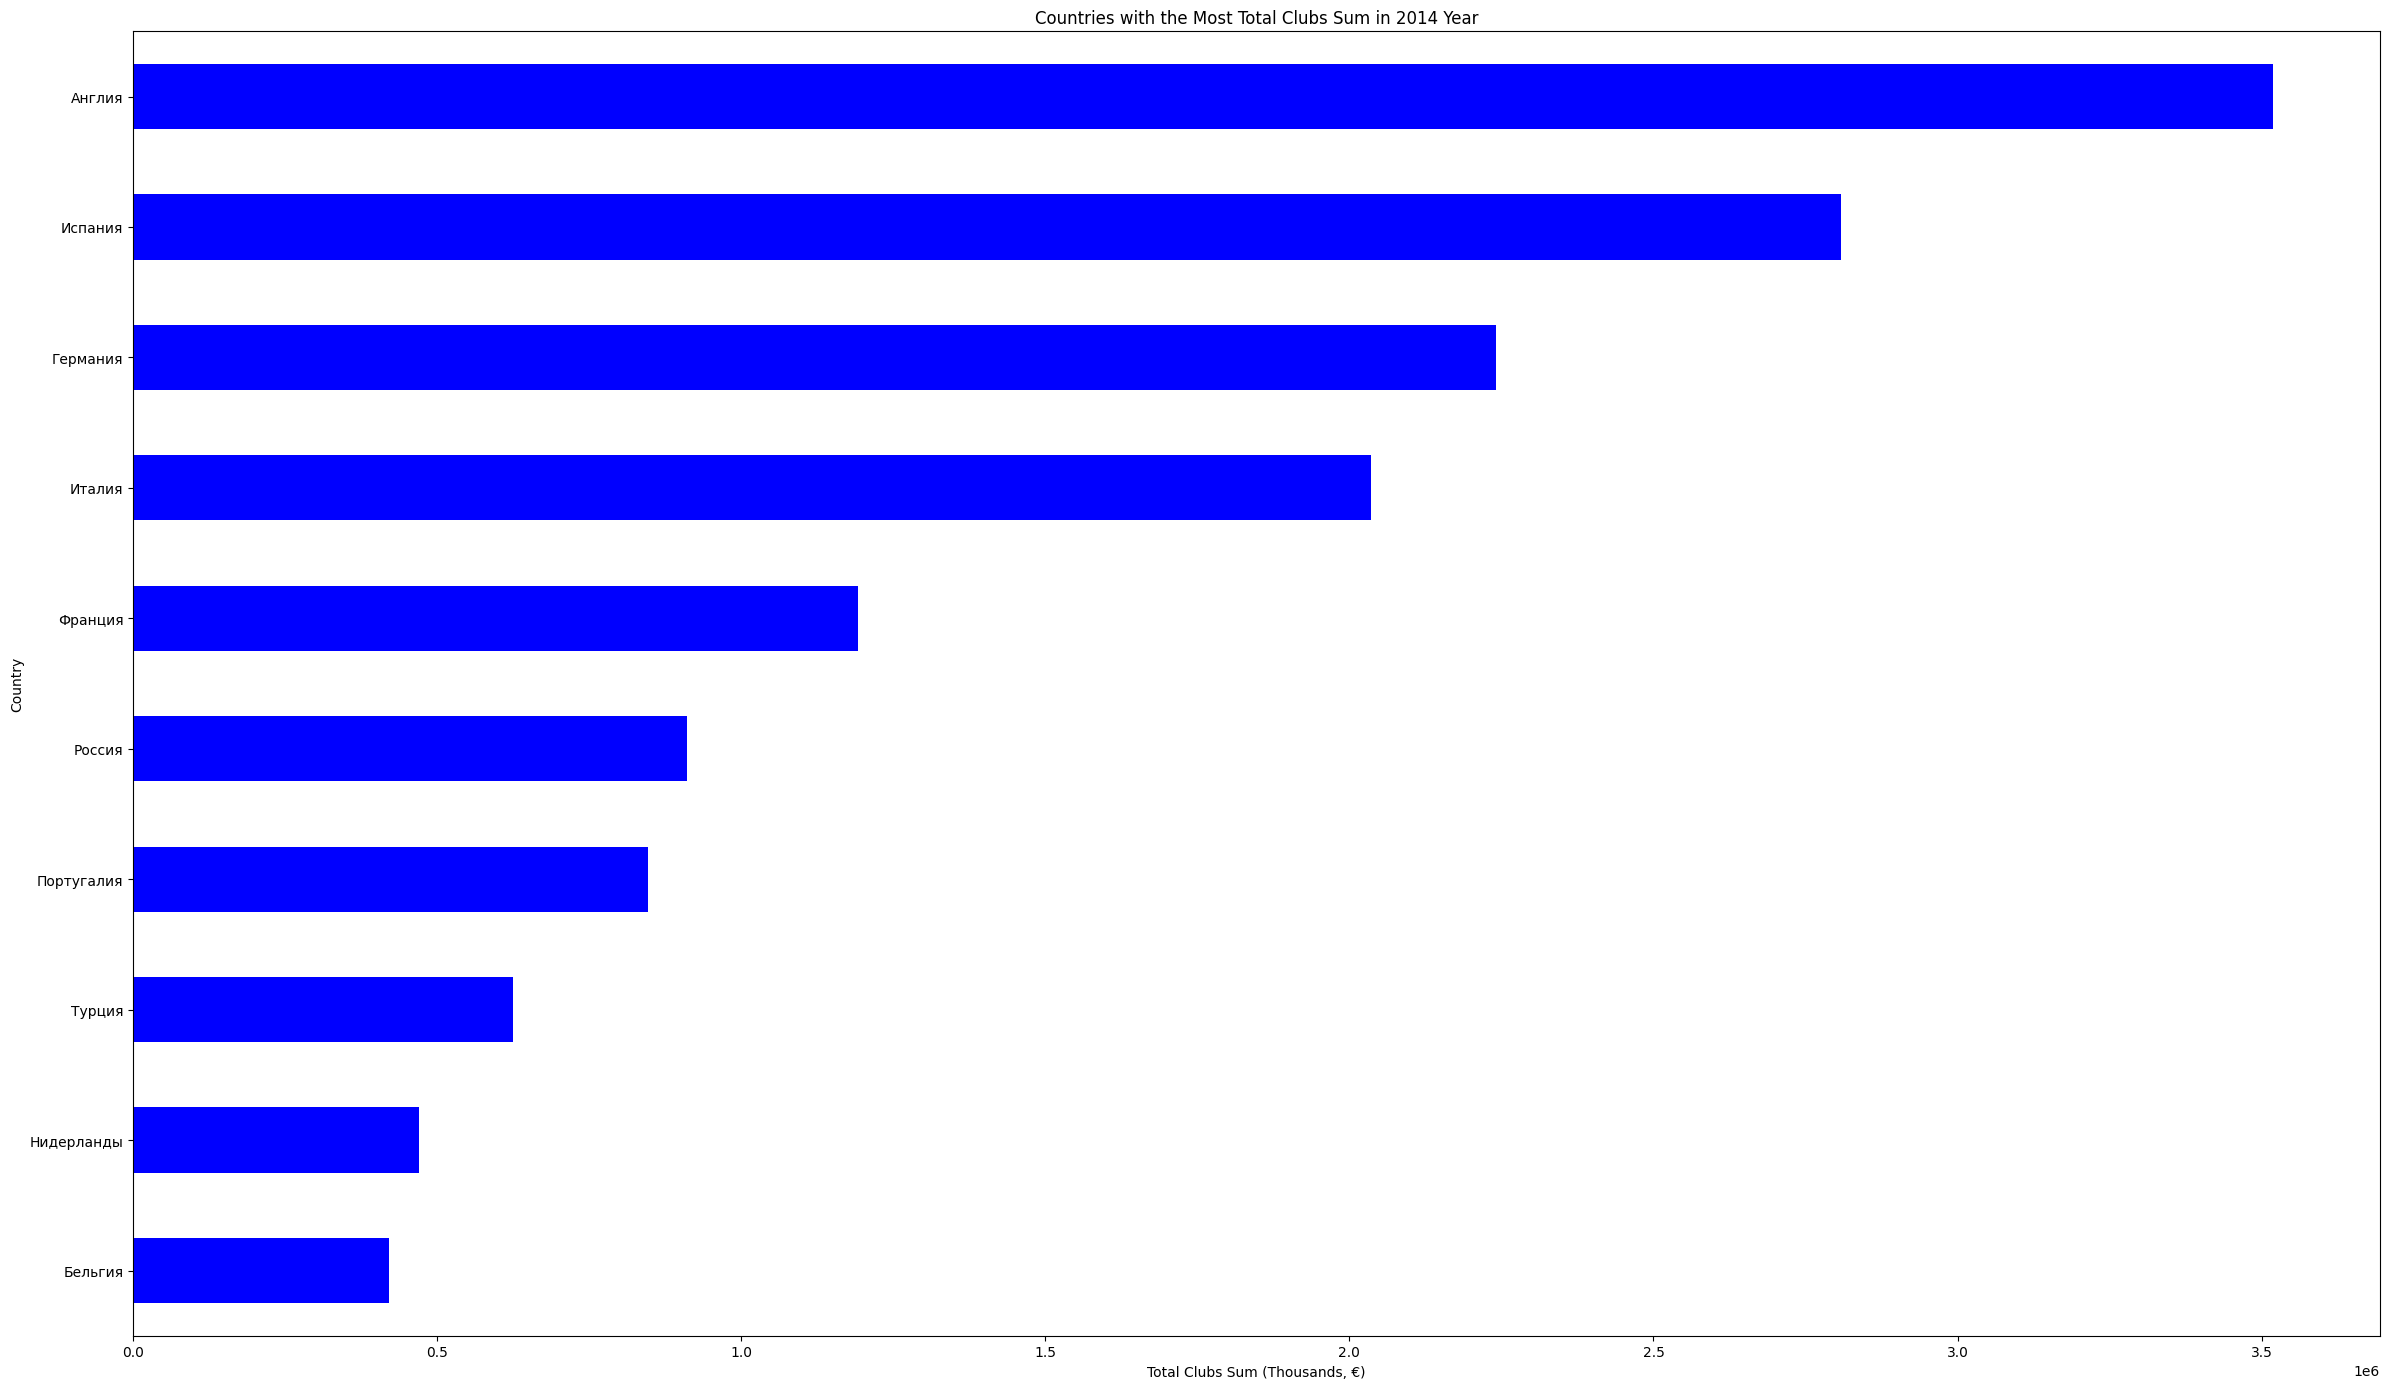

In [30]:
# Another way to separate data by years

from ipywidgets import interact, fixed

def plot(year):
    plt.figure(figsize=(24, 14))
    complete_clubs_df.query(f"Year == {year}") \
                .groupby("Country_Name") \
                .agg({"TeamCost": "sum"}) \
                .sort_values("TeamCost", ascending=True) \
                .tail(10) \
                .plot(kind="barh", y="TeamCost", color="blue", legend=False, ax=plt.gca())
    plt.title(f"Countries with the Most Total Clubs Sum in {year} Year")
    plt.xlabel("Total Clubs Sum (Thousands, €)")
    plt.ylabel("Country")
    plt.tight_layout()
    None

interact(plot, year=complete_clubs_df["Year"].unique(), ax=fixed(None))

Impressive results for England, is not it? From 2014 to 2023 total cost of its clubs has almost tripled, and only slight decrease happened in 2024 \
Other countries did not show significant changes compared to ones happened with England

In [31]:
# Load data about club titles (participating in finals, tournaments, etc.) and cups (regular trophies)
cups_clubs_df = pd.read_json("../parsing/parsedData/titles_cups.json")
cups_clubs_df.head()

,TeamID,NumberOfTitlesByYears,NumberOfCups
0,31,"{'2024': 1, '2023': 2, '2022': 2, '2021': 4, '...",71
1,12,"{'2024': 1, '2023': 1, '2022': 2, '2021': 2, '...",17
2,583,"{'2024': 3, '2023': 4, '2022': 3, '2021': 2, '...",51
3,418,"{'2024': 3, '2023': 4, '2022': 5, '2021': 4, '...",103
4,281,"{'2024': 3, '2023': 6, '2022': 4, '2021': 2, '...",43


In [32]:
# Check shape
cups_clubs_df.shape

(536, 3)

In [33]:
# Check data types
cups_clubs_df.dtypes

TeamID                    int64
NumberOfTitlesByYears    object
NumberOfCups              int64
dtype: object

In [34]:
# Check axes
cups_clubs_df.axes

[RangeIndex(start=0, stop=536, step=1),
 Index(['TeamID', 'NumberOfTitlesByYears', 'NumberOfCups'], dtype='object')]

In [35]:
# Check for missing values
cups_clubs_df.isna().sum()

TeamID                   0
NumberOfTitlesByYears    0
NumberOfCups             0
dtype: int64

In [36]:
# Okay, maybe we have 0s in "NumberOfCups" column, let us check it
cups_clubs_df.query("NumberOfCups == 0")

,TeamID,NumberOfTitlesByYears,NumberOfCups
89,3911,"{'2024': 1, '2018': 1}",0
155,12321,"{'2024': 1, '2021': 1, '2018': 1, '2016': 1}",0
160,16704,"{'2020': 2, '2019': 1, '2018': 1, '2016': 1, '...",0
214,324,{},0
220,40090,{},0
251,27843,{},0
257,63993,{'2017': 1},0
261,36999,{},0
268,61955,"{'2022': 1, '2019': 1, '2017': 1, '2016': 1}",0
287,46710,{'2015': 1},0


In [37]:
# Remove rows with 0s in "NumberOfCups" column
cups_clubs_df.drop(cups_clubs_df.query("NumberOfCups == 0").index, inplace=True)

# Verify the result
cups_clubs_df.query("NumberOfCups == 0")

,TeamID,NumberOfTitlesByYears,NumberOfCups


In [38]:
# Merge "cups_clubs_df" with "country_clubs_df" to add country information to the "cups_clubs_df" data frame
cups_clubs_df = cups_clubs_df.merge(country_clubs_df, left_on="TeamID", right_on="TeamID", how="inner")
cups_clubs_df.head()

,TeamID,NumberOfTitlesByYears,NumberOfCups,Team_name,Country_Name
0,31,"{'2024': 1, '2023': 2, '2022': 2, '2021': 4, '...",71,Ливерпуль,Англия
1,12,"{'2024': 1, '2023': 1, '2022': 2, '2021': 2, '...",17,Рома,Италия
2,583,"{'2024': 3, '2023': 4, '2022': 3, '2021': 2, '...",51,ПСЖ,Франция
3,418,"{'2024': 3, '2023': 4, '2022': 5, '2021': 4, '...",103,Реал Мадрид,Испания
4,281,"{'2024': 3, '2023': 6, '2022': 4, '2021': 2, '...",43,Манчестер Сити,Англия


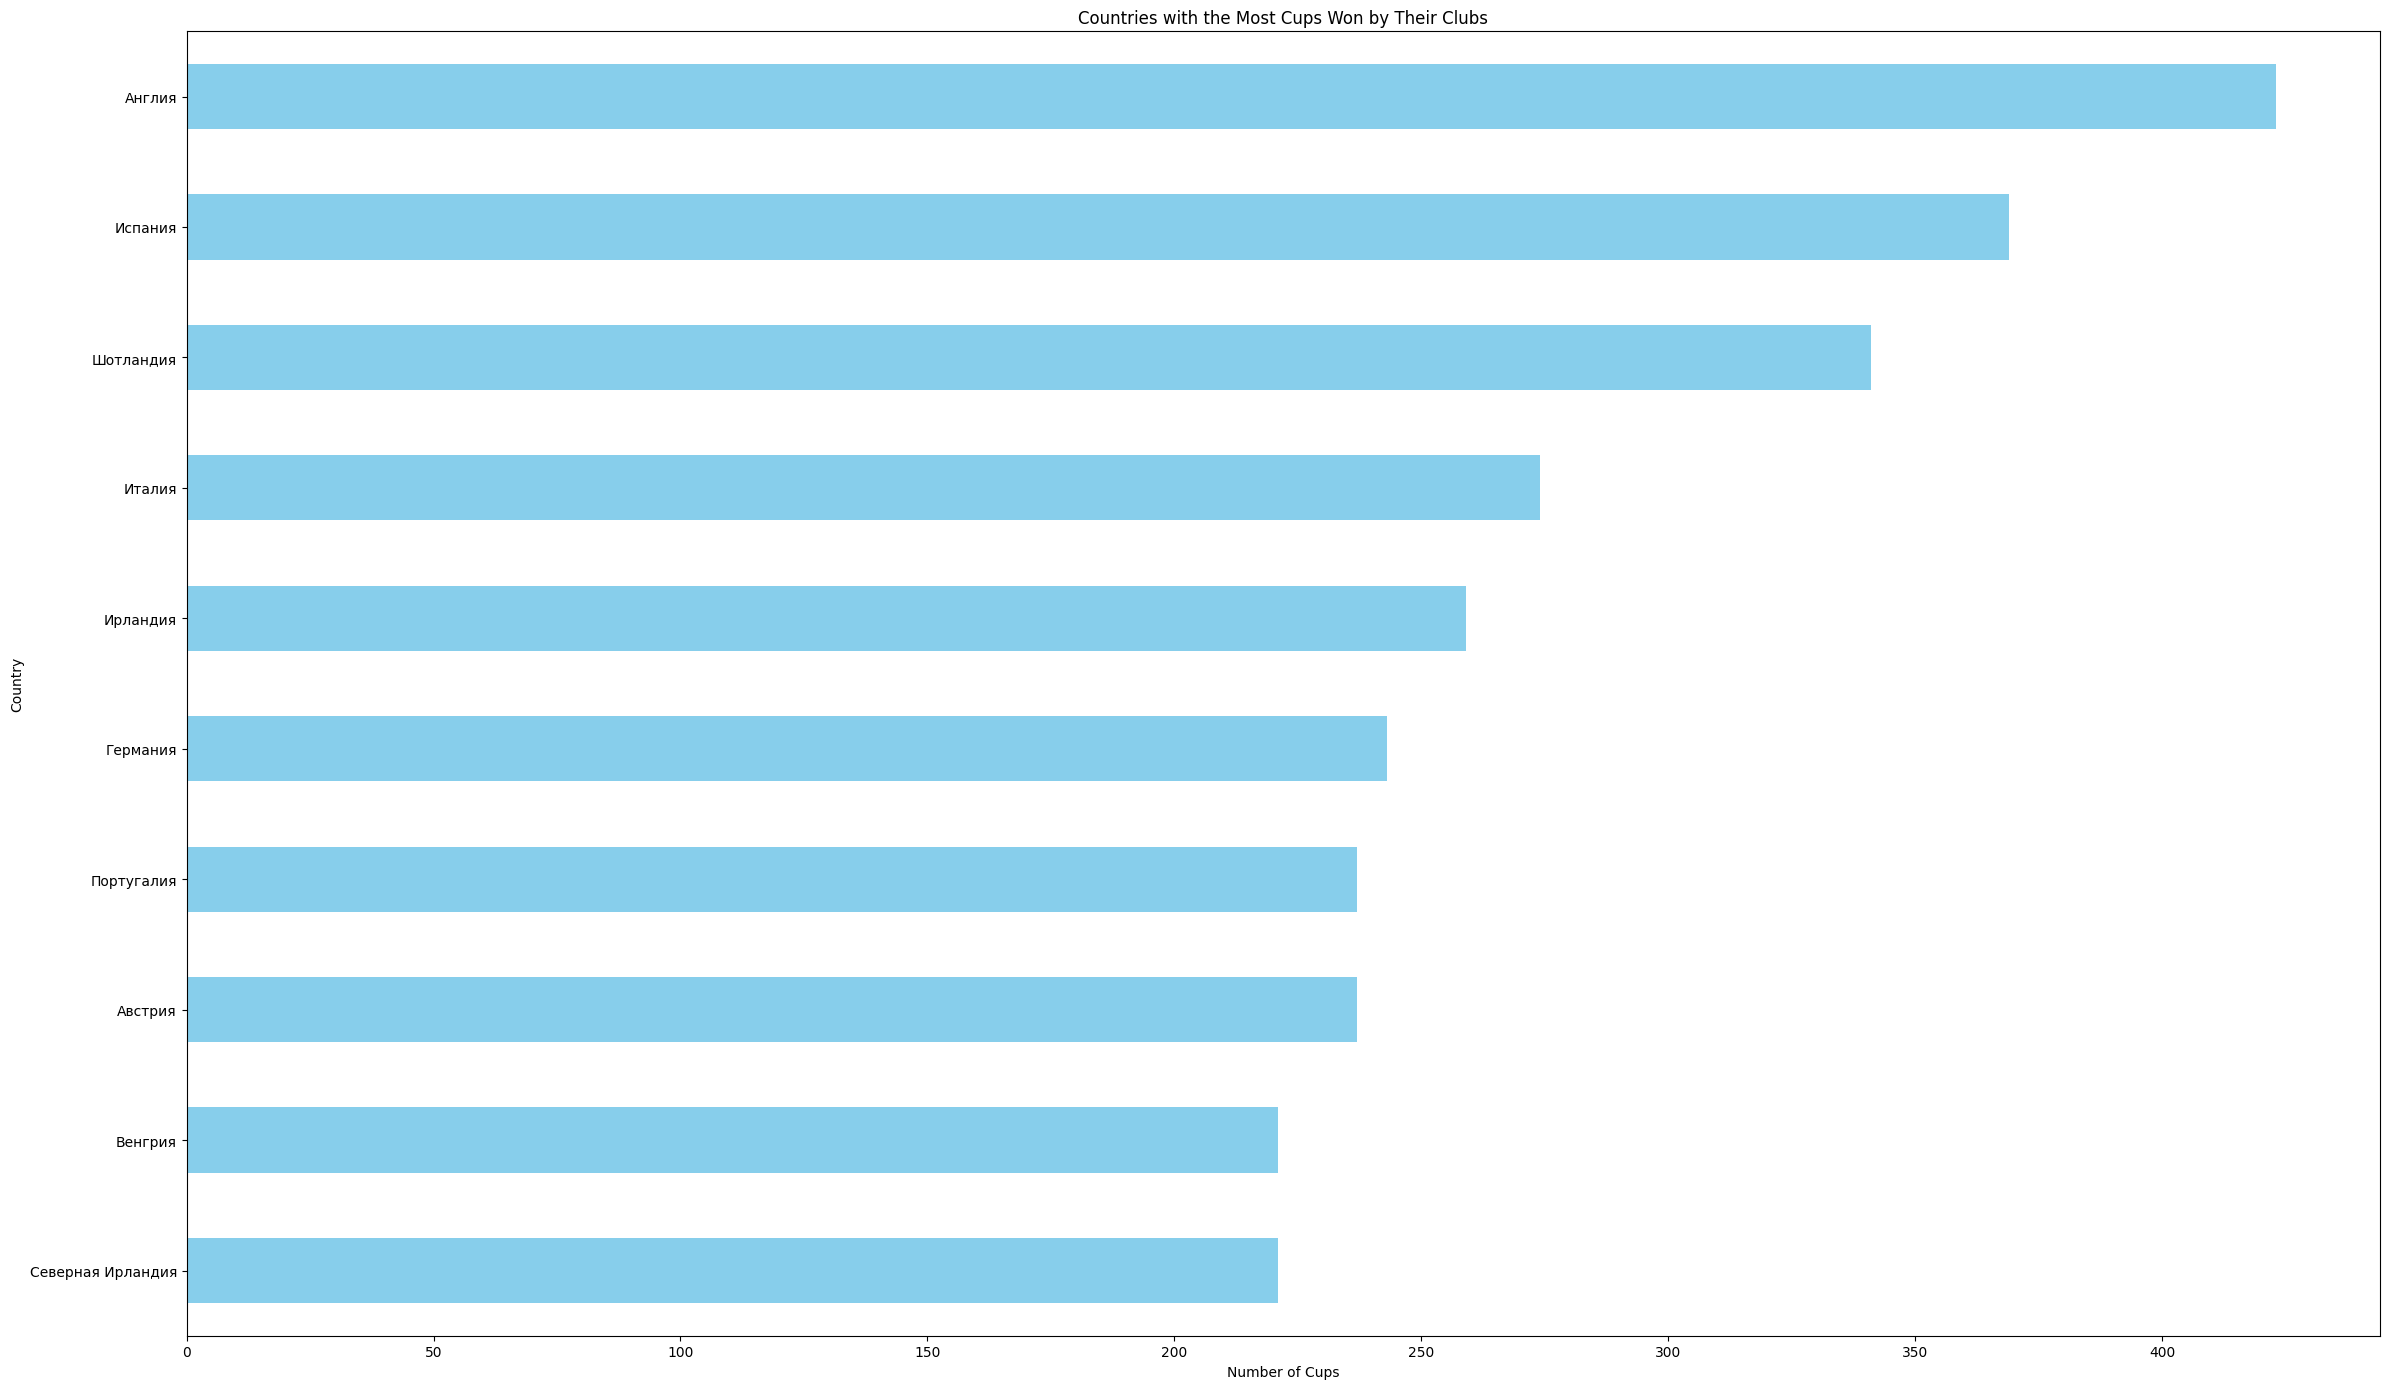

In [39]:
# Find countries with the most cups won by their clubs
plt.figure(figsize=(24, 14))
cups_clubs_df.groupby("Country_Name") \
                .agg({"NumberOfCups": "sum"}) \
                .sort_values("NumberOfCups", ascending=True) \
                .tail(10) \
                .plot(kind="barh", y="NumberOfCups", color="skyblue", legend=False, ax=plt.gca())
plt.title("Countries with the Most Cups Won by Their Clubs")
plt.xlabel("Number of Cups")
plt.ylabel("Country")
plt.tight_layout()
None

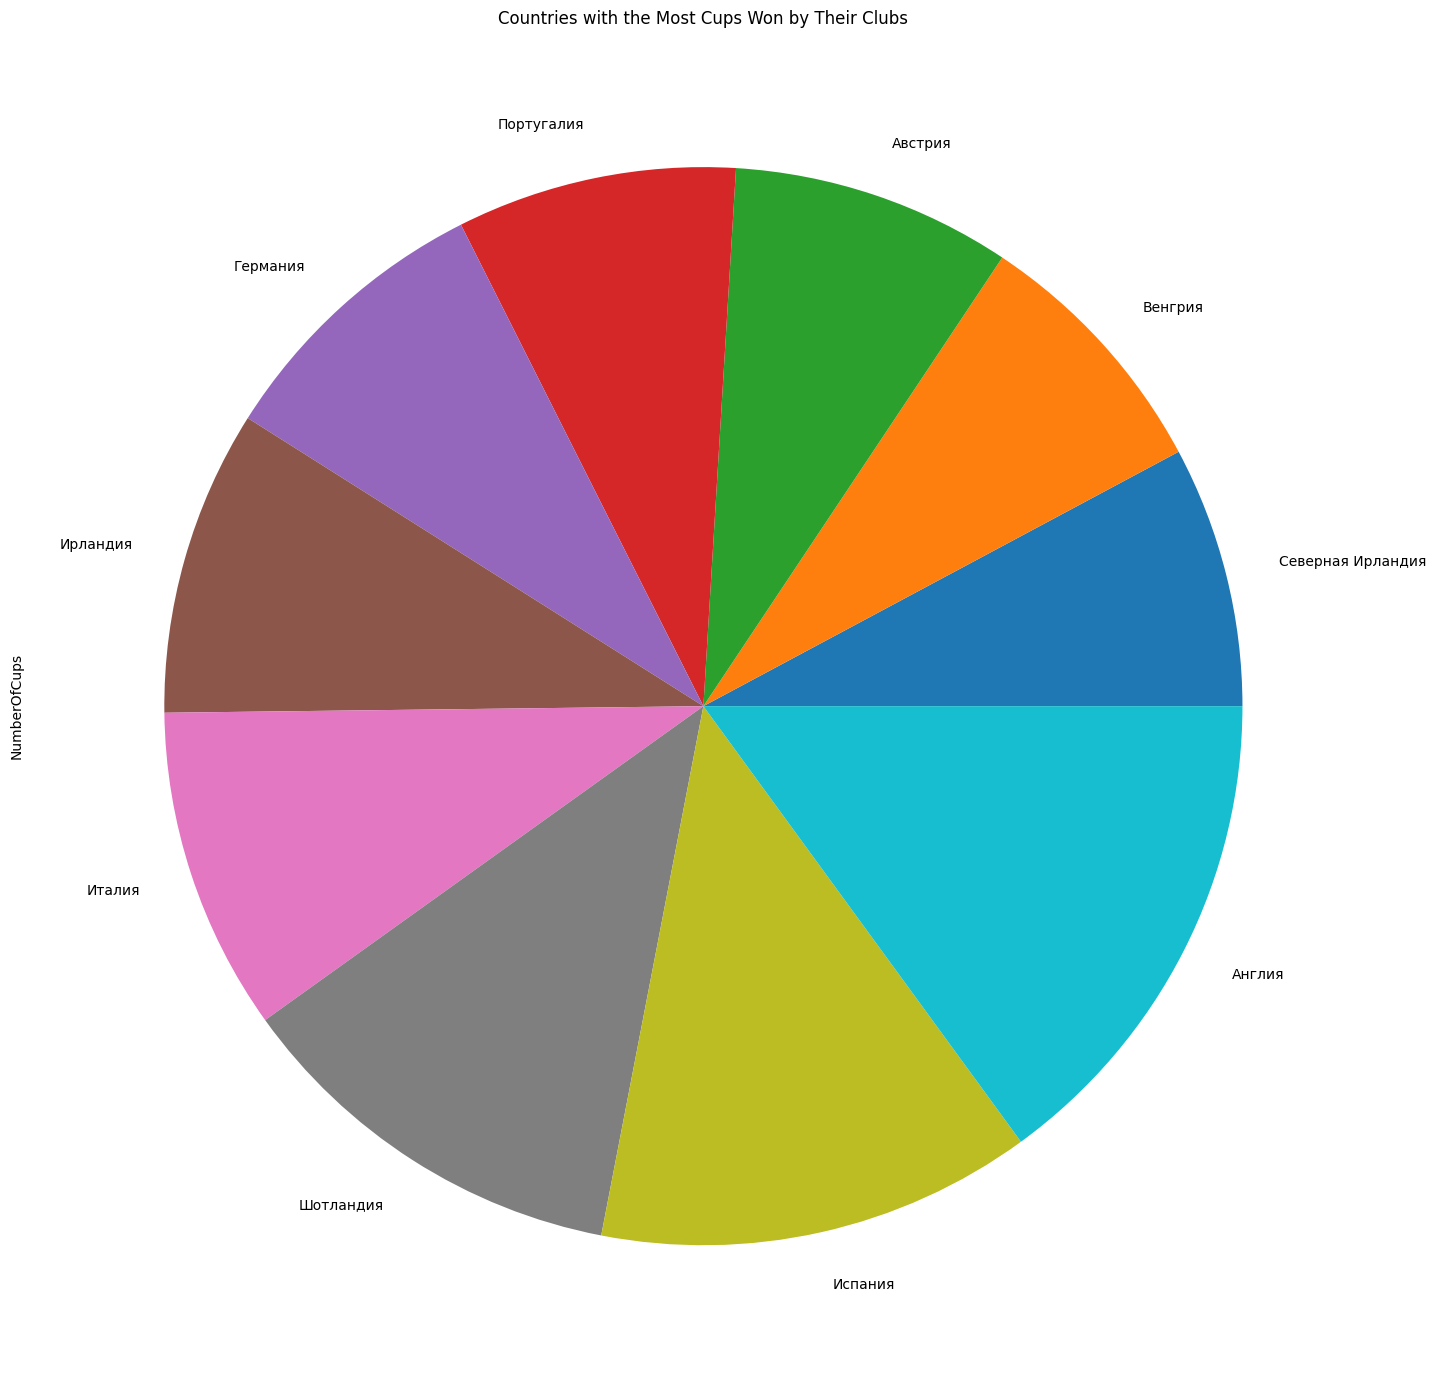

In [40]:
# Find countries with the most cups won by their clubs using pie chart to highlight the proportions
plt.figure(figsize=(24, 14))
cups_clubs_df.groupby("Country_Name") \
                .agg({"NumberOfCups": "sum"}) \
                .sort_values("NumberOfCups", ascending=True) \
                .tail(10) \
                .plot(kind="pie", y="NumberOfCups", color="skyblue", legend=False, ax=plt.gca())
plt.title("Countries with the Most Cups Won by Their Clubs")
plt.tight_layout()
None

In [41]:
# Load data about clubs transfer balances over years
transfer_balances_clubs_df = pd.read_json("../parsing/parsedData/transfer_balance.json")
transfer_balances_clubs_df.head()

,TeamID,Year,TransferBalanceValue,TransferBalanceMer
0,418,2019,"-224,50",млн €
1,418,2018,"-28,65",млн €
2,418,2017,"+92,00",млн €
3,418,2015,"-76,25",млн €
4,418,2020,"+108,20",млн €


In [42]:
# Check shape
transfer_balances_clubs_df.shape

(5896, 4)

In [43]:
# Check data types
transfer_balances_clubs_df.dtypes

TeamID                   int64
Year                     int64
TransferBalanceValue    object
TransferBalanceMer      object
dtype: object

In [44]:
# Check axes
transfer_balances_clubs_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'TransferBalanceValue', 'TransferBalanceMer'], dtype='object')]

In [45]:
# Remove redundant symbols from column names
transfer_balances_clubs_df.columns = transfer_balances_clubs_df.columns.str.strip()
transfer_balances_clubs_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID', 'Year', 'TransferBalanceValue', 'TransferBalanceMer'], dtype='object')]

In [46]:
# Merge "TransferBalanceValue" and "TransferBalanceMer" columns into one
transfer_balances_clubs_df["TransferBalance"] = transfer_balances_clubs_df["TransferBalanceValue"] + transfer_balances_clubs_df["TransferBalanceMer"]
transfer_balances_clubs_df.drop(["TransferBalanceValue", "TransferBalanceMer"], axis=1, inplace=True)
transfer_balances_clubs_df.head()

,TeamID,Year,TransferBalance
0,418,2019,"-224,50млн €"
1,418,2018,"-28,65млн €"
2,418,2017,"+92,00млн €"
3,418,2015,"-76,25млн €"
4,418,2020,"+108,20млн €"


In [47]:
# Check for missing values
transfer_balances_clubs_df.isna().sum()

TeamID                0
Year                  0
TransferBalance    2180
dtype: int64

In [48]:
# Find teams with missing values and drop them
teams_with_missing_values = transfer_balances_clubs_df[transfer_balances_clubs_df["TransferBalance"].isna()]["TeamID"] \
    .unique()
    
transfer_balances_clubs_df.drop(transfer_balances_clubs_df[transfer_balances_clubs_df["TeamID"].isin(teams_with_missing_values)].index, inplace=True)
transfer_balances_clubs_df.isna().sum()

TeamID             0
Year               0
TransferBalance    0
dtype: int64

In [49]:
# Obtain unique values without digits for "TransferBalance" column
transfer_balances_clubs_df["TransferBalance"].str.replace(r"[\d]", "", regex=True).unique()

array(['-,млн €', '+,млн €', '-тыс €', '+тыс €'], dtype=object)

In [50]:
# Replace "млн" (million) and "тыс" (thousand) with one 0 (because numbers in millions already have 2 digits after comma) and emptiness respectively, so that every number will represent amount of thousands in transfer balance
transfer_balances_clubs_df["TransferBalance"] = transfer_balances_clubs_df["TransferBalance"] \
                                    .str.replace("млн", "0") \
                                    .str.replace("тыс", "") \
                                    .str.replace(",", "") \
                                    .str.replace("€", "") \
                                    .str.strip()
transfer_balances_clubs_df.head(15)

,TeamID,Year,TransferBalance
0,418,2019,-224500
1,418,2018,-28650
2,418,2017,+92000
3,418,2015,-76250
4,418,2020,+108200
5,418,2022,+12150
6,281,2014,-72500
7,418,2024,-33000
8,418,2016,+7500
9,281,2018,-20990


In [51]:
# Let us check resulting data types
transfer_balances_clubs_df.dtypes

TeamID              int64
Year                int64
TransferBalance    object
dtype: object

In [52]:
# Convert "TransferBalance" to integer
transfer_balances_clubs_df["TransferBalance"] = transfer_balances_clubs_df["TransferBalance"].astype(int)
transfer_balances_clubs_df.dtypes

TeamID             int64
Year               int64
TransferBalance    int64
dtype: object

In [53]:
# How Data Frame looks like now
transfer_balances_clubs_df.head()

,TeamID,Year,TransferBalance
0,418,2019,-224500
1,418,2018,-28650
2,418,2017,92000
3,418,2015,-76250
4,418,2020,108200


In [54]:
# Merge "transfer_balances_clubs_df" with "country_clubs_df" to add club name and country to the "transfer_balances_clubs_df" Data Frame
transfer_balances_clubs_df = transfer_balances_clubs_df.merge(country_clubs_df, on="TeamID")
transfer_balances_clubs_df.head()

,TeamID,Year,TransferBalance,Team_name,Country_Name
0,418,2019,-224500,Реал Мадрид,Испания
1,418,2018,-28650,Реал Мадрид,Испания
2,418,2017,92000,Реал Мадрид,Испания
3,418,2015,-76250,Реал Мадрид,Испания
4,418,2020,108200,Реал Мадрид,Испания


Let us find best sellers and prodigals

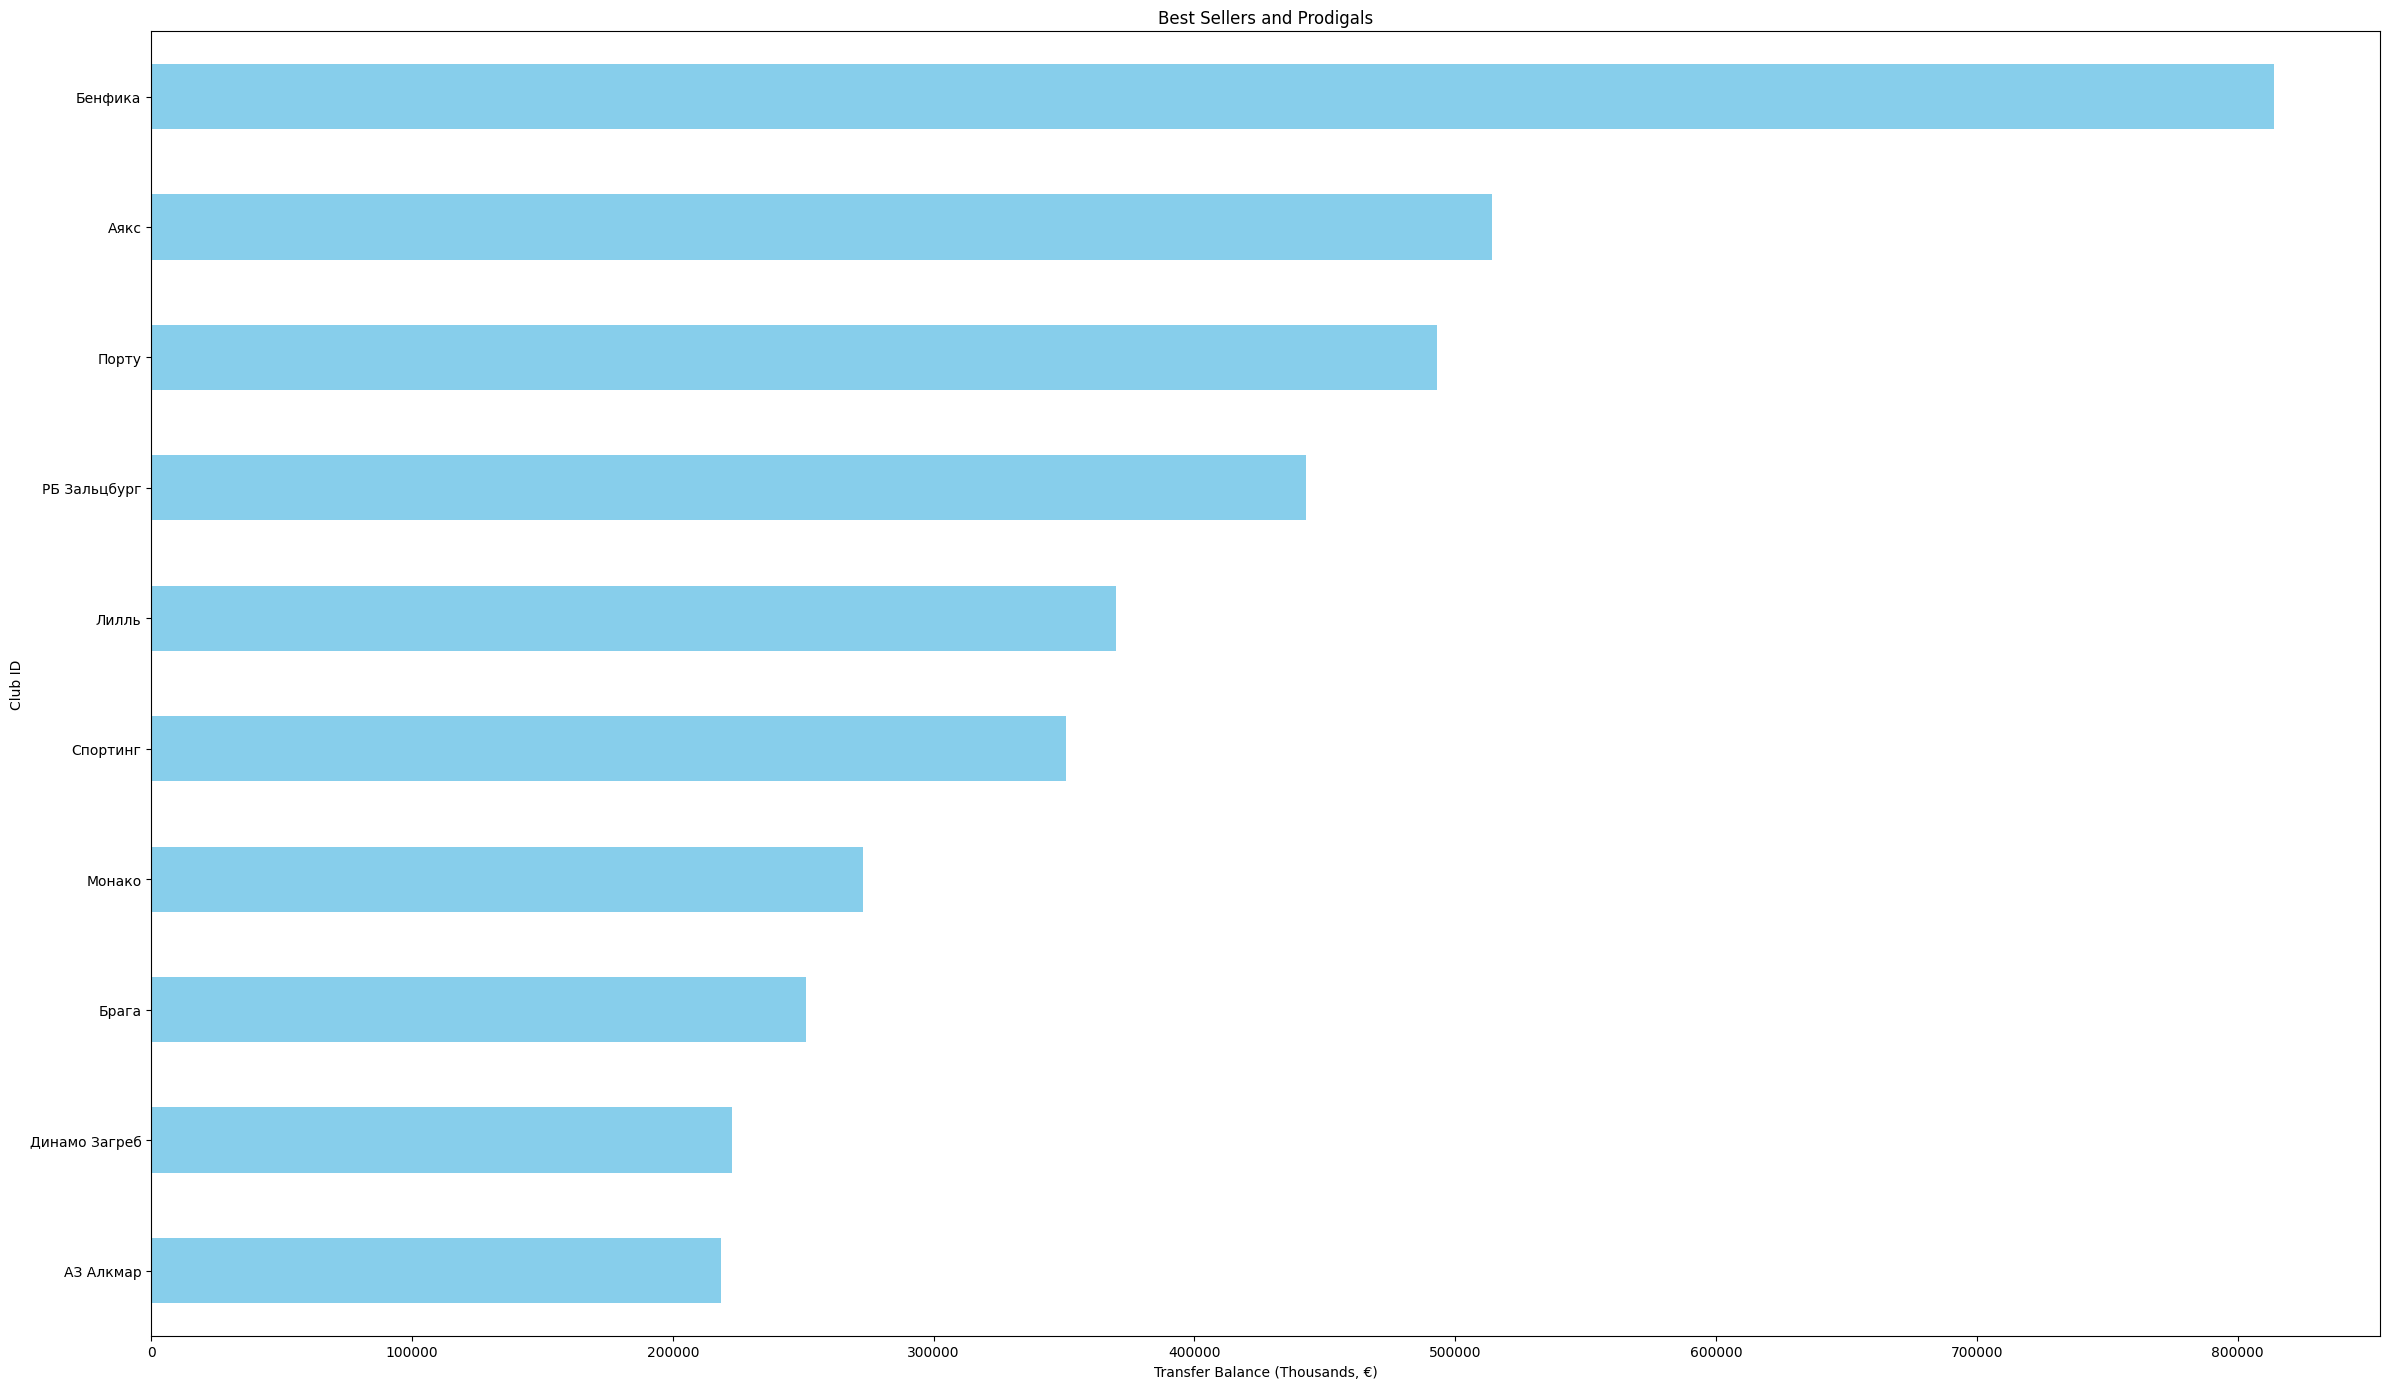

In [55]:
# Find sellers
plt.figure(figsize=(24, 14))
transfer_balances_clubs_df.groupby("Team_name") \
                .agg({"TransferBalance": "sum"}) \
                .sort_values("TransferBalance", ascending=True) \
                .tail(10) \
                .plot(kind="barh", color="skyblue", legend=False, ax=plt.gca())
plt.title("Best Sellers and Prodigals")
plt.xlabel("Transfer Balance (Thousands, €)")
plt.ylabel("Club ID")
plt.tight_layout()
None

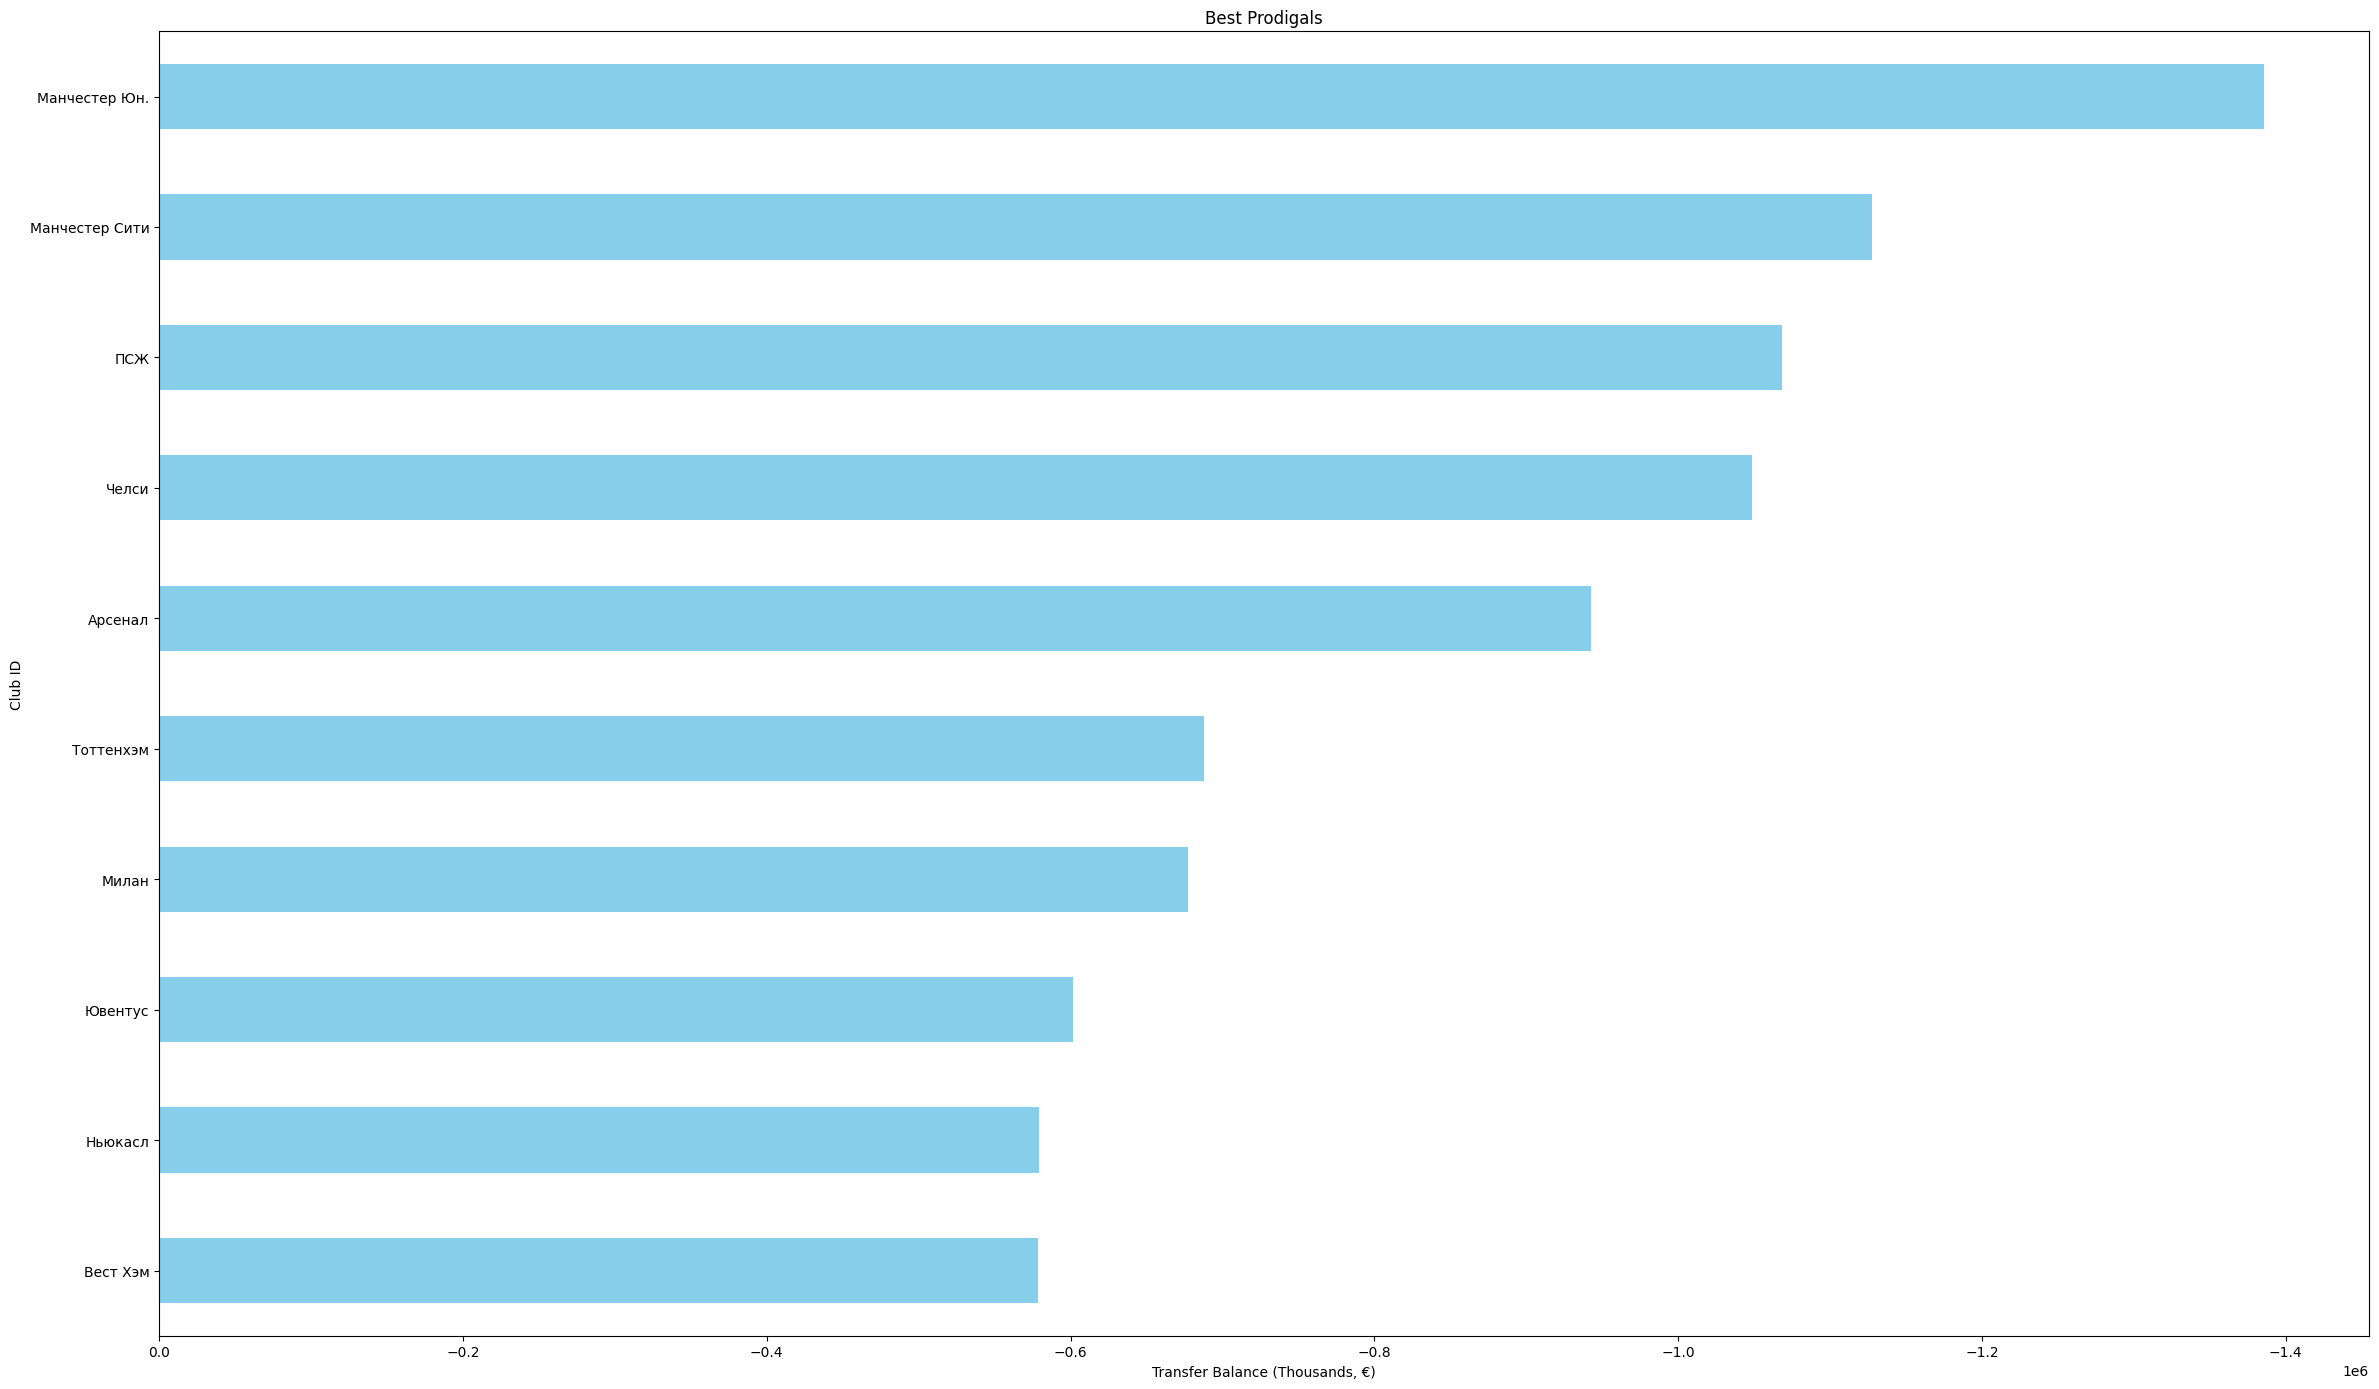

In [57]:
# Find prodigals
plt.figure(figsize=(24, 14))
ax = transfer_balances_clubs_df.groupby("Team_name") \
                .agg({"TransferBalance": "sum"}) \
                .sort_values("TransferBalance", ascending=True) \
                .head(10) \
                .plot(kind="barh", color="skyblue", legend=False, ax=plt.gca())
plt.title("Best Prodigals")
plt.xlabel("Transfer Balance (Thousands, €)")
plt.ylabel("Club ID")
plt.tight_layout()
ax.invert_xaxis()
ax.invert_yaxis()
None